<img src = "https://freepngimg.com/download/python_logo/7-2-python-logo-free-download-png-thumb.png" width="50"> </p>
*Python 3.10.2*
***
# <font size="5">*Alexander A. Nazarov, 2022*
### <center> <font size="6"> ***Регрессионный анализ в DataScience. Часть 3. <br>Аппроксимация</p>***

### <center> <font size="6"> ***Regression analysis in DataScience. Part 3. <br>Approximation</p>***
***

In [107]:
import time
start_time_0 = time.time()

Подключение модулей и библиотек:

In [108]:
# Стандартные модули и библиотеки

import os    # загрузка модуля для работы с операционной системой
import sys
import platform
print('{:<35}{:^0}'.format("Текущая версия Python: ", platform.python_version()), '\n')

import math
from math import *    # подключаем все содержимое модуля math, используем без псевдонимов

import numpy as np
#print ("Текущая версия модуля numpy: ", np.__version__)
print('{:<35}{:^0}'.format("Текущая версия модуля numpy: ", np.__version__))
from numpy import nan

import scipy as sci
print('{:<35}{:^0}'.format("Текущая версия модуля scipy: ", sci.__version__))
import scipy.stats as sps

import pandas as pd
print('{:<35}{:^0}'.format("Текущая версия модуля pandas: ", pd.__version__))

import matplotlib as mpl
print('{:<35}{:^0}'.format("Текущая версия модуля matplotlib: ", mpl.__version__))
import matplotlib.pyplot as plt

import seaborn as sns
print('{:<35}{:^0}'.format("Текущая версия модуля seaborn: ", sns.__version__))

import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.descriptivestats import Description
print('{:<35}{:^0}'.format("Текущая версия модуля statsmodels: ", sm.__version__))

import statistics as stat    # module 'statistics' has no attribute '__version__'

import sympy as sym
print('{:<35}{:^0}'.format("Текущая версия модуля sympy: ", sym.__version__))

# Setting the accuracy
DecPlace = 4    # number of decimal places - число знаков после запятой

# Numpy settings
np.set_printoptions(precision = DecPlace, 
                    floatmode='fixed'
                    )

# Pandas settings
pd.set_option('display.max_colwidth', None)    # текст в ячейке отражался полностью вне зависимости от длины
#pd.set_option('display.float_format', lambda x: '%.4f' % x)
pd.set_option('display.float_format', lambda x: ('%.'+str(DecPlace)+'f') % x)

# Настройки seaborn
sns.set_style("darkgrid")
sns.set_context(context='paper', font_scale=1, rc=None)    # 'paper', 'notebook', 'talk', 'poster', None

# Настройки Mathplotlib
f_size = 8    # пользовательская переменная для задания базового размера шрифта
plt.rcParams['figure.titlesize'] = f_size + 12    # шрифт заголовка
plt.rcParams['axes.titlesize'] = f_size + 10      # шрифт заголовка
plt.rcParams['axes.labelsize'] = f_size + 6       # шрифт подписей осей
plt.rcParams['xtick.labelsize'] = f_size + 4      # шрифт подписей меток
plt.rcParams['ytick.labelsize'] = f_size + 4
plt.rcParams['legend.fontsize'] = f_size + 6      # шрифт легенды
plt.rcParams['text.usetex'] = False    # поддержка TeX

Текущая версия Python:             3.10.2 

Текущая версия модуля numpy:       1.22.2
Текущая версия модуля scipy:       1.8.0
Текущая версия модуля pandas:      1.4.1
Текущая версия модуля matplotlib:  3.5.1
Текущая версия модуля seaborn:     0.11.2
Текущая версия модуля statsmodels: 0.13.2
Текущая версия модуля sympy:       1.9


In [109]:
# Пользовательские модули и библиотеки

Text1 = os.getcwd()    # вывод пути к текущему каталогу
#print(f"Текущий каталог: {Text1}")

sys.path.insert(1, "D:\SKILL FACTORY\REPOSITORY\MyModulePython")

from my_module__stat import *

Прочие настройки:

In [110]:
# Константы
INCH = 25.4    # мм/дюйм
MY_PATH = "D:\\SKILL FACTORY\\REPOSITORY\\DataScience-Different projects\\MY WORK\\ЭПБ\\"
#print(chr(92))   #ASCII-код символа

Доверительная вероятность и уровень значимости:

In [111]:
p_level = 0.95
a_level = 1 - p_level   

### <center> <font size="6"> <u>***АКТУАЛЬНОСТЬ ТЕМЫ***</u>

В предыдущих обзорах (https://habr.com/ru/articles/690414/, https://habr.com/ru/articles/695556/) мы рассматривали линейную регрессию. Пришло время переходить к нелинейным моделями. Однако, прежде чем рассматривать полноценный нелинейный регрессионный анализ, остановимся на аппроксимации зависимостей.

Про аппроксимацию написано так много, что, кажется, и добавить уже нечего. Однако, кое-что добавить попытаемся.

При выполнении анализа данных может возникнуть потребность оперативно построить аналитическую зависимость. Подчеркиваю - речь не идет о полноценном регрессионном анализе со всеми его этапами, проверкой гипотез и т.д., а только лишь о подборе уравнения и оценке ошибки аппроксимации. Например, мы хотим оценить характер зависимости между какими-либо показателями в датасете и принять решение о целесообразности более глубокого исследования. Подобный инструмент предоставляет нам тот же Excel - все мы помним, как добавить линию тренда на точечном графике:

![Getting Started](Image/Image_01.png)

Такой же инструмент необходим и при работе в Python, причем желательно, сохранив главное достоинство - оперативность и удобство использования, избавиться от недостатков, присущих Excel:
* ограниченный набор аналитических зависимостей и метрик качества аппроксимации;
* невозможность построения нескольких зависимостей для одного набора данных;
* невозможность установления ограничений на значения параметров зависимостей;
* невозможность устранить влияние выбросов.
  
Использованием подобных инструментов мы и рассмотрим в данном обзоре. 

#### <u>***Применение пользовательских функций***</u>

Как и в предыдущих обзорах, здесь будут использованы несколько пользовательских функций для решения разнообразных задач. Все эти функции созданы для облегчения работы и уменьшения размера программного кода. Данные функции загружается из пользовательского модуля **my_module__stat.py**, который доступен в моем репозитории на GitHub (https://github.com/AANazarov/MyModulePython).

Вот перечень данных функций:
* **graph_lineplot_sns** - функция позволяет построить линейный график средствами seaborn и сохранить график в виде png-файла;
* **graph_scatterplot_sns** - функция позволяет построить точечную диаграмму средствами seaborn и сохранить график в виде png-файла;
* **regression_error_metrics**  - функция возвращает ошибки аппроксимации регрессионной модели;

Пользовательскую функцию **simple_approximation** мы создаем в процессе данного обзора (она тоже включена в пользовательский модуль **my_module__stat.py**).

### <center> <font size="6"> <u>***ИСХОДНЫЕ ДАННЫЕ***</u>

В качестве примера в данном обзоре продолжим рассматривать задачу нахождения зависимости **среднемесячного расхода топлива автомобиля (л/100 км) (FuelFlow)** от **среднемесячного пробега (км) (Mileage)** и **среднемесячной температуры (Temperature)** (этот же датасет я использовал в своих статьях: https://habr.com/ru/post/683442/, https://habr.com/ru/post/695556/).

In [112]:
# Общий заголовок проекта
Task_Project = "Analysis of fuel consumption of a car"

# Заголовок, фиксирующий момент времени
AsOfTheDate = ""

# Заголовок раздела проекта
Task_Theme = ""

# Общий заголовок проекта для графиков
Title_String = f"{Task_Project}\n{AsOfTheDate}"

# Наименования переменных
Variable_Name_T_month = "Monthly data"
Variable_Name_Y = "FuelFlow (liters per 100 km)"
Variable_Name_X1 = "Mileage (km)"
Variable_Name_X2 = "Temperature (°С)"

Загрузим исходные данные из csv-файла. Это уже обработанный датасет, готовый для анализа (первичная обработка данных выполненная в отдельном файле **Preparation of input data.py**, который также доступен в моем репозитории на GitHub).

**Столбцы таблицы**:

* **Month** — месяц (в формате Excel)
* **Mileage** - месячный пробег (км)
* **Temperature** - среднемесячная температура (°C) 
* **FuelFlow** - среднемесячный расход топлива (л/100 км)

In [113]:
dataset_df = pd.read_csv(filepath_or_buffer='data/dataset_df.csv', sep=';')
#display(dataset_df)
display(dataset_df.head(), dataset_df.tail())
dataset_df.info()

,Number,X1,X2,Y
0,0,696.8000,15.2000,10.0800
1,1,2751.5000,19.4000,8.9100
2,2,1308.7000,17.9000,7.4500
3,3,837.4000,12.7000,9.1700
4,4,2130.8000,5.6000,8.2000


,Number,X1,X2,Y
50,50,929.0000,9.5000,8.8800
51,51,852.0000,6.3000,9.2400
52,52,694.0000,-2.5000,9.5500
53,53,786.0000,-6.7000,10.6600
54,54,795.0000,-7.5000,10.5300


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Number  55 non-null     int64  
 1   X1      55 non-null     float64
 2   X2      55 non-null     float64
 3   Y       55 non-null     float64
dtypes: float64(3), int64(1)
memory usage: 1.8 KB


#### <u>***Сохранение данных***</u>

Сохраняем данные в виде отдельных переменных (для дальнейшего анализа).

Среднемесячный расход топлива (л/100 км) / Fuel Flow (liters per 100 km):

In [114]:
Y = np.array(dataset_df['Y'])
print(Y, type(Y), len(Y))

[10.0800  8.9100  7.4500  9.1700  8.2000 10.3000 12.0100 10.1700 11.4900
  9.7200  9.7400  8.8500  8.4500  9.1500  8.6700  7.7200  7.7300 11.6000
 10.9500 11.0400  9.9600 10.8500  8.9600  6.0800 10.2600  9.5700  9.1800
 16.8900 12.7700 10.4300 11.3000 12.9900  9.9400  7.9600  8.9700  9.7200
  8.9700  8.5600 10.0000  8.1900 11.0000  7.8700 10.0300 11.1700  9.0900
  9.6900  8.6500  9.9100  9.6500  8.8200  8.8800  9.2400  9.5500 10.6600
 10.5300] <class 'numpy.ndarray'> 55


Пробег автомобиля за месяц (км) / Mileage (km):

In [115]:
X1 = np.array(dataset_df['X1'])
print(X1, type(X1), len(X1))

[ 696.8000 2751.5000 1308.7000  837.4000 2130.8000  704.0000  666.3000
  840.5000  642.0000  900.0000  642.0000 1130.0000  740.0000 1025.0000
 1009.0000 2187.0000 2069.0000  377.0000  393.0000  600.0000  791.0000
  475.0000  265.0000 1334.0000 1079.0000 1229.0000 1335.0000   37.0000
  235.0000  803.0000  575.0000  558.0000  792.0000 1515.0000  878.0000
  733.0000 1379.0000 1534.0000 1025.0000 1236.0000  602.0000 1032.0000
  960.0000  593.0000  976.0000  800.0000  838.0000  971.0000 1114.0000
 1020.0000  929.0000  852.0000  694.0000  786.0000  795.0000] <class 'numpy.ndarray'> 55


Среднемесячная температура (°С) / Temperature (degrees celsius):

In [116]:
X2 = np.array(dataset_df['X2'])
print(X2, type(X2), len(X2))

[ 15.2000  19.4000  17.9000  12.7000   5.6000  -1.6000  -7.6000  -8.5000
  -3.6000  -1.3000   6.0000  14.1000  17.0000  15.1000  14.1000  10.5000
   5.8000  -0.9000  -1.1000  -1.9000  -2.1000   1.9000   3.1000  10.5000
  16.4000  18.3000  15.4000  12.5000   0.4000  -7.1000  -8.6000 -15.3000
  -3.5000   6.4000  13.6000  19.9000  20.5000  17.9000   8.8000   5.8000
   1.0000 -10.6000  -8.5000  -2.3000  -2.8000   4.6000   8.8000  16.8000
  20.2000  20.6000   9.5000   6.3000  -2.5000  -6.7000  -7.5000] <class 'numpy.ndarray'> 55


#### <u>***Визуализация***</u>

Границы значений переменных (при построении графиков):

In [117]:
(X1_min_graph, X1_max_graph) = (0, 3000)
(X2_min_graph, X2_max_graph) = (-20, 25)
(Y_min_graph, Y_max_graph) = (0, 30)

Построение графика:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


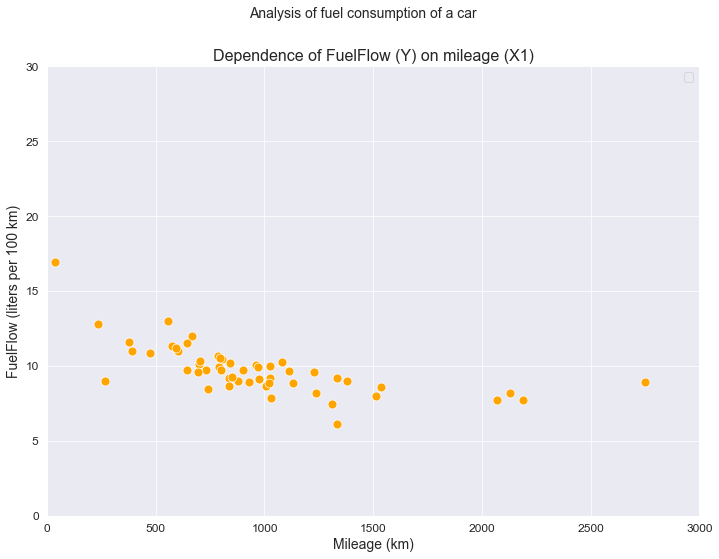

In [118]:
graph_scatterplot_sns(
    X1, Y,
    Xmin=X1_min_graph, Xmax=X1_max_graph,
    Ymin=Y_min_graph, Ymax=Y_max_graph,
    color='orange',
    title_figure=Title_String, title_figure_fontsize=14,
    title_axes='Dependence of FuelFlow (Y) on mileage (X1)', title_axes_fontsize=16,
    x_label=Variable_Name_X1,
    y_label=Variable_Name_Y,
    label_fontsize=14, tick_fontsize=12,
    label_legend='', label_legend_fontsize=12,
    s=80,
    #graph_size=(297/INCH, 210/INCH)
    )

### <center> <font size="6"> <u>***ОСНОВЫ ТЕОРИИ***</u>

Кратко остановимся на некоторых теоретических вопросах.

### <center> <u>***Инструменты **Python** для аппроксимации***</u>

**Python** предоставляет нам большой набор инструментов для аппроксимации (подробнее см. https://docs.scipy.org/doc/scipy/reference/optimize.html). Мы остановимся на некоторых из них:
* функция **scipy.optimize.leastsq** (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html#scipy.optimize.leastsq)
* функция **scipy.optimize.least_squares** (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares)
* функция **scipy.optimize.curve_fit** (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)
* функция **scipy.optimize.minimize** (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize)
* библиотека **lmfit** (https://lmfit.github.io/lmfit-py/)

### <center> <u>***Основные виды моделей для аппроксимации***</u>

Не будем углубляться в классификацию моделей, об этом написаны сотни учебников, монографий, справочников и статей. Однако, в целях унификации в таблице ниже все-таки приведем основные виды моделей для аппроксимации - разумеется, это список не является исчерпывающим, но охватывает более или менее достаточный набор моделей для практического использования:

|Наименование                                  |Уравнение                                      |
|:--------------------------------------------:|:---------------------------------------------:|
|линейная                                      |$Y=b_0+b_1\cdot X$'                            |
|квадратическая                                |$Y=b_0+b_1\cdot X+b_2\cdot X^2$                |
|кубическая                                    |$Y=b_0+b_1\cdot X+b_2\cdot X^2+b_3\cdot X^3$   |
|полиномиальная                                |$Y=\displaystyle\sum_{k=0}^{n} b_k\cdot X^k$   |
|степенная                                     |$Y=b_0\cdot X^{b_1}$                           |
|экспоненциальная I типа                       |$Y=b_0\cdot e^{b_1\cdot X}$                    |
|экспоненциальная II типа                      |$Y=b_0\cdot b_1^X$                             |
|логарифмическая                               |$Y=b_0+b_1\cdot ln X$                          |
|обратная логарифмическая                      |$Y=\frac{1}{b_0+b_1\cdot ln X}$                |
|гиперболическая I типа                        |$Y=b_0+\frac{b_1}{X}$                          |
|гиперболическая II типа                       |$Y=\frac{1}{b_0+b_1\cdot X}$                   |
|гиперболическая III типа                      |$Y=\frac{X}{b_0+b_1\cdot X}$                   |
|логистическая кривая I типа                   |$Y=\frac{b_0}{1+b_1\cdot e^{-b_2\cdot X}}$     |
|логистическая кривая II типа (Перла-Рида)     |$Y=\frac{b_0}{1+b_1\cdot b_2^{-X}}$            |
|кривая Гомперца                               |$Y=b_0\cdot {b_1}^{b_2^{X}}$                   |
|модифицированная экспонента I типа            |$Y=b_0+b_1\cdot e^{b_2\cdot X}$                |
|модифицированная экспонента II типа           |$Y=b_0+b_1\cdot b_2^ X$                        |
|обобщенная логистическая кривая I типа        |$Y=b_0+\frac{b_1}{1+b_2\cdot e^{-b_3\cdot X}}$ |
|обобщенная логистическая кривая II типа       |$Y=b_0+\frac{b_1}{1+b_2\cdot b_3^{-X}}$        |

**<u>Примечания:</u>**
1. Нелинейные модели в ряде источников принято делить на 2 группы:
    * **модели, нелинейные по факторам** - путем замены переменных могут быть линеаризованы, т.е. приведены к линейному виду, и для оценки их параметров может применяться классический метод наименьших квадратов;
    * **модели, нелинейные по параметрам** - не могут быть линеаризованы, и для оценки их параметров необходимо применять итерационные методы.
  
К моделям, нелинейным по параметрам, относятся, например, модифицированные кривые (модифицированная экспонента, обобщенная логистическая кривая), кривая Гомперца и пр. Оценка их параметров средствами Python требует особых приемов (предварительная оценка начальных значений). В данном разборе мы не будем особо останавливаться на этих моделях.

2. Экспоненциальные модели могут быть выражены в 2-х формах:
   * с помощью собственно **экспоненциальной функции** $Y=b_0\cdot e^{b_1\cdot X}$;
   * в **показательной форме** $Y=b_0\cdot b_1^X$

3. Не будем особо распространяться на опасности увлечения полиномиальными моделями для аппроксимации дынных, отметим только, что использовать такие модели нужно очень осторожно, с особым обоснованием и содержательным анализом задачи, а полиномы выше 3-й степени вообще использовать не рекомендуется.

### <center> <u>***Метрики качества аппроксимации***</u>

Рассмотрим основные метрики качества:

1. **Mean squared error (MSE)**  - среднеквадратическая ошибка (https://en.wikipedia.org/wiki/Mean_squared_error) и **Root mean square error (RMSE)** - квадратный корень из среднеквадратической ошибки **MSE** (https://en.wikipedia.org/wiki/Root-mean-square_deviation):

$\begin{aligned}
\qquad MSE = \frac{1}{n} \cdot {\displaystyle\sum_{i=1}^{n} (Y_{i} - \widehat{Y}_{i})^2} = \frac{1}{n} \cdot {\displaystyle\sum_{i=1}^{n} e_{i}^2} = \frac{1}{n} \cdot \boldsymbol{e}^T\boldsymbol{e}
\end{aligned}$

$\begin{aligned}
\qquad RMSE = \sqrt{MSE}
\end{aligned}$

Особенности: тенденция к занижение качества модели, чувствительность к выбросам.

2. **Mean absolute error (MAE)** - средняя абсолютная ошибка (https://en.wikipedia.org/wiki/Mean_absolute_error):

$\begin{aligned}
\qquad MAE = \frac{1}{n} \cdot {\displaystyle\sum_{i=1}^{n} |Y_{i} - \widehat{Y}_{i}|}
\end{aligned}$

Особенность: гораздо менее чувствительна к выбросам, чем **RMSE**.

3. **Mean squared prediction error (MSPE)** - среднеквадратическая ошибка прогноза (среднеквадратическая ошибка в процентах) (https://en.wikipedia.org/wiki/Mean_squared_prediction_error):

$\begin{aligned}
\qquad MSPE = \frac{1}{n} \cdot {\displaystyle\sum_{i=1}^{n} \bigg(\frac{Y_{i} - \widehat{Y}_{i}}{Y_{i}}\bigg)^2}
\end{aligned}$

Особенности: нечувствительность к выбросам; нельзя использовать для наблюдений, в которых значения выходной переменной равны нулю.

4. **Mean absolute percentage error (MAPE)** - средняя абсолютная ошибка в процентах (https://en.wikipedia.org/wiki/Mean_absolute_percentage_error):

$\begin{aligned}
\qquad MAPE = 1 - \frac{1}{n} \cdot {\displaystyle\sum_{i=1}^{n} \bigg|\frac{Y_{i} - \widehat{Y}_{i}}{Y_{i}}\bigg|}
\end{aligned}$

Особенности: нельзя использовать для наблюдений, в которых значения выходной переменной равны нулю.

5. **Root Mean Square Logarithmic Error (RMSLE)** - cреднеквадратичная логарифмическая ошибка, применяется, если разность между фактическим и предсказанным значениями различается на порядок и выше:

$\begin{aligned}
\qquad RMSLE = \sqrt{\frac{1}{n} \cdot {\displaystyle\sum_{i=1}^{n} (ln(Y_i+1) - ln(\widehat{Y_{i}}+1))^2}} = RMSE\bigg(ln(Y), ln(\widehat{Y})\bigg) = \sqrt{MSE\bigg(ln(Y), ln(\widehat{Y})\bigg)}
\end{aligned}$

Особенности: нечувствительность к выбросам; смещена в сторону меньших ошибок (наказывает больше на недооценку, чем за переоценку); к значениям добавляется константа 1, так как логарифм 0 не определен.

6. $\boldsymbol{R^2}$ - коэффициент детерминации:

$\begin{aligned}
\qquad R^2 = 1 - \frac{SSE}{SST} = 1 - \frac{\displaystyle\sum_{i=1}^{n} (Y_{i} - \widehat{Y}_{i})^2}{\displaystyle\sum_{i=1}^{n} (Y_{i} - \overline{Y}_{i})^2}
\end{aligned}$

Особенность: значение $\boldsymbol{R^2}$ находится в пределах [0; 1], но иногда может принимать отрицательные значения (если ошибка модели больше ошибки среднего значения).

Разумеется, приведенный перечень метрик качества аппроксимации не является исчерпывающим.

Сравнительный анализ метрик качества приведен в https://machinelearningmastery.ru/how-to-select-the-right-evaluation-metric-for-machine-learning-models-part-1-regrression-metrics-3606e25beae0/, https://machinelearningmastery.ru/how-to-select-the-right-evaluation-metric-for-machine-learning-models-part-2-regression-metrics-d4a1a9ba3d74/, https://loginom.ru/blog/quality-metrics.

### <center> <u>***Оценка ошибок и доверительных интервалов для параметров моделей аппроксимации***</u>

Инструменты аппроксимации **Python** позволяют получить довольно обширный набор различных данных, в том числе тех, которые нам дают возможность оценить ошибки параметров аппроксимации и построить для них доверительные интервалы. Не вдаваясь глубоко в математическую теорию вопроса, кратко разберем, как это реализовать на практике.

В общем виде доверительный интервал для параметров аппроксимации можно представить в виде $p_j \pm \sigma_j$, где $p_j$ - значение j-го параметра модели, а $\sigma_j$ - стандартная ошибка этого параметра.

Для определения $\sigma_j$ нам необходима матрица ковариации оценок параметров $\Sigma$, диагональные элементы которой представляют собой дисперсию оценок параметров, то есть:

$\begin{aligned}
\qquad \sigma_j = \sqrt{\Sigma_{jj}}, \text{ } j=\overline{1,m}
\end{aligned}$

$\Sigma$ имеет размерность $[m \times m]$, где $m$ - число оцениваемых параметров модели аппроксимации.

Теперь разберем, как получить $\Sigma$, используя различные инструменты аппроксимации **Python**:

1. Функция **scipy.optimize.curve_fit** в стандартном наборе возвращаемых данных непосредственно содержит расчетную ковариационную матрицу $\Sigma$ (The estimated covariance of popt), которая обозначается в программном коде как **pcov** (см. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). Расчетная стандартная ошибка параметров может быть определена очень просто: **perr = np.sqrt(np.diag(pcov))**.

2. Функция **scipy.optimize.leastsq** в стандартном наборе возвращаемых данных содержит матрицу, обратную матрице Гессе (The inverse of the Hessian) $H^{-1}$, которая обозначается в программном коде как **cov_x**. Чтобы получить $\Sigma$, необходимо умножить $H^{-1}$ на величину остаточной дисперсии $MSE = \frac{SSE}{df_E} = \frac{1}{n-m-1} \cdot \displaystyle\sum_{i=1}^{n} (y_i - \widehat{y}_i)^2$:

    $\begin{aligned}
    \Sigma = H^{-1} \cdot MSE
    \end{aligned}$

    или в программном коде: **pcov = cov_x*MSE**.
    
    Величина **SSE**, необходимая для расчета **MSE**, может быть определена в программном коде как $\mathsf{SSE = (infodict['fvec']**2).sum()}$.

3. Функция **scipy.optimize.least_squares** вместо $H^{-1}$ возвращает модифицированную матрицу Якоби (Modified Jacobian matrix) $J$, которая обозначается в программном коде как **result.jac** (см. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares, https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult). Получить $H^{-1}$ можно следующим образом:

    $\begin{aligned}
    H^{-1} = (J^T J)^{-1}
    \end{aligned}$

    или в программном коде: **cov_x = np.linalg.inv(np.dot(result.jac.T, result.jac))**.

4. Функция **scipy.optimize.minimize** имеет свои специфические особенности: возвращает обратгную матрицу Гессе (Inverse of the objective function’s Hessian), которая обозначается в программном коде как **res.hess_inv** (см. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize, https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html#scipy.optimize.OptimizeResult), но для определения **cov_x** необходимо воспользоваться приближенным выражением **cov_x = 2*res.hess_inv** (подробнее об этом см. https://stackoverflow.com/questions/40187517/getting-covariance-matrix-of-fitted-parameters-from-scipy-optimize-least-squares).

5. Библиотека **lmfit** позволяет непосредственно в стандартном наборе возвращаемых данных получить ошибки и доверительные интервалы параметров аппроксимации.  

Более подробно с вопросом можно ознакомиться здесь:
* https://question-it.com/questions/9466217/poluchenie-kovariatsionnoj-matritsy-podobrannyh-parametrov-iz-metoda-scipy-optimizeleast_squares
* https://stackoverflow.com/questions/40187517/getting-covariance-matrix-of-fitted-parameters-from-scipy-optimize-least-squares 
* https://stackoverflow.com/questions/14854339/in-scipy-how-and-why-does-curve-fit-calculate-the-covariance-of-the-parameter-es
* https://stackovergo.com/ru/q/4167751/in-scipy-how-and-why-does-curvefit-calculate-the-covariance-of-the-parameter-estimates
* https://math.stackexchange.com/questions/2349026/why-is-the-approximation-of-hessian-jtj-reasonable
* https://mmas.github.io/least-squares-fitting-numpy-scipy
* https://www.nedcharles.com/regression/Nonlinear_Least_Squares_Regression_For_Python.html

### <center> <font size="6"> <u>***АППРОКСИМАЦИЯ ЗАВИСИМОСТЕЙ***</u>

Определим набор зависимостей, которые будем использовать для аппроксимации. В данном обзоре мы рассмотрим набор наиболее широко распространенных зависимостей, не требующих особого подхода к вычислениям. Более сложные случаи - например, зависимости с асимптотами, зависимости нелинейные по параметрам и пр. - тема для отдельного рассмотрения.

In [119]:
# equations
linear_func = lambda x, b0, b1: b0 + b1*x
quadratic_func = lambda x, b0, b1, b2: b0 + b1*x + b2*x**2
qubic_func = lambda x, b0, b1, b2, b3: b0 + b1*x + b2*x**2 + b3*x**3
power_func = lambda x, b0, b1: b0 * (x**b1)
exponential_type_1_func = lambda x, b0, b1: b0*np.exp(b1*x)
exponential_type_2_func = lambda x, b0, b1: b0*np.power(b1, x)
logarithmic_func = lambda x, b0, b1: b0 + b1*np.log(x)
hyperbolic_func = lambda x, b0, b1: b0 + b1/x

Далее будем собственно выполнять аппроксимацию: оценивать параметры моделей, строить графики, причем так, чтобы на графиках отображались уравнения моделей и метрики качества (по аналогии с тем, как это позволяет сделать Excel - это очень удобно), рассмотрим возможность определения ошибок и доверительных интервалов для параметров аппроксимации.

Отдельно довольно кратко остановимся на библиотеке **lmfit**, которая предоставляет очень широкий инструментарий для аппроксимации.

### <center> <u>***Аппроксимация с использованием scipy.optimize.leastsq***</u>

<u>Особенности использования функции:</u>

1. Реализация метода наименьших квадратов, <u>без возможности</u> введения ограничений на значения параметров.
2. Возможность выбора метода оптимизации не предусмотрена.

Данный пакет считается устаревшим по сравнению, с **least_squares**.

Ссылка на документацию: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.leastsq.html#scipy.optimize.leastsq.

In [120]:
from scipy.optimize import leastsq

# list of model
model_list = [
    'linear', 'quadratic',
    'qubic', 'power',
    'exponential type 1', 'exponential type 2',
    'logarithmic',
    'hyperbolic']

# model reference
models_dict = {
        'linear':             linear_func,
        'quadratic':          quadratic_func,
        'qubic':              qubic_func,
        'power':              power_func,
        'exponential type 1': exponential_type_1_func,
        'exponential type 2': exponential_type_2_func,
        'logarithmic':        logarithmic_func,
        'hyperbolic':         hyperbolic_func}

# initial values
p0_dict = {
        'linear':             [0, 0],
        'quadratic':          [0, 0, 0],
        'qubic':              [0, 0, 0, 0],
        'power':              [0, 0],
        'exponential type 1': [0, 0],
        'exponential type 2': [1, 1],
        'logarithmic':        [0, 0],
        'hyperbolic':         [0, 0]}

# titles (formulas)
formulas_dict = {
        'linear':             'y = b0 + b1*x',
        'quadratic':          'y = b0 + b1*x + b2*x^2',
        'qubic':              'y = b0 + b1*x + b2*x^2 + b3*x^3',
        'power':              'y = b0*x^b1',
        'exponential type 1': 'y = b0*exp(b1^x)',
        'exponential type 2': 'y = b0*b1^x',
        'logarithmic':        'y = b0 + b1*ln(x)',
        'hyperbolic':         'y = b0+b1/x'}

# actual data
X_fact = X1
Y_fact = Y

# function for calculating residuals
residual_func = lambda p, x, y: y - func(x, *p)

# return all optional outputs
full_output = True

# variables to save the calculation results
calculation_results_df = pd.DataFrame(columns=['func', 'p0', 'popt', 'cov_x', 'SSE', 'MSE', 'pcov', 'perr', 'Y_calc', 'error_metrics'])
error_metrics_results_df = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE', 'R2'])

# calculations
for func_name in model_list:
    print(f'{func_name.upper()} MODEL: {formulas_dict[func_name]}')
    func = models_dict[func_name]
    calculation_results_df.loc[func_name, 'func'] = func
    p0 = p0_dict[func_name]
    print(f'p0 = {p0}')
    calculation_results_df.loc[func_name, 'p0'] = p0
    if full_output:
        (popt, cov_x, infodict, mesg, ier) = leastsq(residual_func, p0, args=(X_fact, Y_fact), full_output=full_output)
        integer_flag = f'ier = {ier}, the solution was found' if ier<=4 else f'ier = {ier}, the solution was not found'
        print(integer_flag, '\n', mesg)
        calculation_results_df.loc[func_name, 'popt'] = popt
        print(f'parameters = {popt}')
        calculation_results_df.loc[func_name, 'cov_x'] = cov_x
        print(f'cov_x = \n{cov_x}')
        #SSE = (residual_func(popt, X_fact, Y_fact)**2).sum()
        SSE = (infodict['fvec']**2).sum()
        calculation_results_df.loc[func_name, 'SSE'] = SSE
        print(f'SSE = {SSE}')
        MSE = SSE / (len(Y_fact)-len(p0))
        calculation_results_df.loc[func_name, 'MSE'] = MSE
        print(f'MSE = {MSE}')
        pcov = cov_x * MSE
        calculation_results_df.loc[func_name, 'pcov'] = pcov
        print(f'pcov =\n {pcov}')
        perr = np.sqrt(np.diag(pcov))
        calculation_results_df.loc[func_name, 'perr'] = perr
        print(f'perr = {perr}\n') 
    else:
        popt = leastsq(residual_func, p0, args=(X_fact, Y_fact), full_output=full_output)
        calculation_results_df.loc[func_name, 'popt'] = popt
        print(f'parameters = {popt}\n')
    Y_calc = func(X_fact, *popt)
    calculation_results_df.loc[func_name, 'Y_calc'] = Y_calc
    (error_metrics_dict, error_metrics_df) = regression_error_metrics(Yfact=Y_fact, Ycalc=Y_calc, model_name=func_name)
    calculation_results_df.loc[func_name, 'error_metrics'] = error_metrics_dict.values()
    error_metrics_results_df = pd.concat([error_metrics_results_df, error_metrics_df])        

LINEAR MODEL: y = b0 + b1*x
p0 = [0, 0]
ier = 3, the solution was found 
 Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000 and the relative error between two consecutive iterates is at 
  most 0.000000
parameters = [ 1.1850e+01 -2.1760e-03]
cov_x = 
[[ 8.7797e-02 -7.3041e-05]
 [-7.3041e-05  7.6636e-08]]
SSE = 84.42039151684142
MSE = 1.5928375757894608
pcov =
 [[ 1.3985e-01 -1.1634e-04]
 [-1.1634e-04  1.2207e-07]]
perr = [3.7396e-01 3.4938e-04]

QUADRATIC MODEL: y = b0 + b1*x + b2*x^2
p0 = [0, 0, 0]
ier = 1, the solution was found 
 Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
parameters = [ 1.4343e+01 -7.0471e-03  1.8760e-06]
cov_x = 
[[ 2.8731e-01 -4.6282e-04  1.5012e-07]
 [-4.6282e-04  8.3812e-07 -2.9328e-10]
 [ 1.5012e-07 -2.9328e-10  1.1295e-13]]
SSE = 53.26102533463595
MSE = 1.0242504872045375
pcov =
 [[ 2.9428e-01 -4.7404e-04  1.5376e-07]
 [-4.7404e-04  8.5844e-07 -3.0039e-10]
 [ 1.5376e-07 -3

Теперь сформируем отдельный DataFrame, в котором соберем все результаты аппроксимации - параметры моделей ($b_0$, $b_1$, $b_2$, $b_3$), метрики качества (**MSE**, **RMSE**, **MAE**, **MSPE**, **MAPE**, **RMSLE**, **$R^2$**) и начальные условия ($p_0$, $p_1$, $p_2$, $p_3$).

Для улучшения восприятия используем возможности Python по визуализации таблиц (https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html):
* заменим **nan** на "-";
* значения параметров моделей, величина которых сравнима с установленным пределом точности отображения (**DecPlace**), выделим цветом (orange);
* для параметра $b_1$ установим повышенную точность отображения, а для параметров $b_2$, $b_3$ установим экспоненциальный формат;
* для метрик качества установим выделение цветом наилучшего (green) и наихудшего (red) результата.

При этом нужно обратить внимание на следующее - пользовательская функция **regression_error_metrics** возвращает результат как в виде DataFrame, так и в виде словаря (dict):
* если мы используем данные в виде DataFrame, то необходимо откорректировать значения признаков **MSPE** и **MAPE**, так как пользовательская функция **regression_error_metrics** возвращает значения этих признаков в строковом формате (из-за знака '%') и при определении наилучшего и наихудшего результатов могут возникнуть ошибки (значение '10%' будет считаться лучшим результатом, чем '9%' из-за того, что первым символом является единица), поэтому следует удалить знак '%' и изменить тип данных на float;
* если мы используем данные в виде словаря (dict), то подобная проблема не возникает.

In [121]:
result_df = pd.DataFrame(
                list(calculation_results_df.loc[:,'p0'].values),
                columns=['p0', 'p1', 'p2', 'p3'],
                index=model_list)

result_df = result_df.join(pd.DataFrame(
                                list(calculation_results_df.loc[:,'popt'].values),
                                columns=['b0', 'b1', 'b2', 'b3'],
                                index=model_list))

result_df = result_df.join(pd.DataFrame(
                                list(calculation_results_df.loc[:,'perr'].values),
                                columns=['std(b0)', 'std(b1)', 'std(b2)', 'std(b3)'],
                                index=model_list))

result_df = result_df.join(pd.DataFrame(
                                list(calculation_results_df.loc[:,'error_metrics'].values),
                                columns=['MSE', 'RMSE',	'MAE', 'MSPE', 'MAPE', 'RMSLE', 'R2'],
                                index=model_list))

display(result_df)

# settings for displaying the DataFrame: result_df
result_df_leastsq = result_df.copy()
'''for elem in ['MSPE', 'MAPE']:
    result_df_leastsq[elem] = result_df_leastsq[elem].apply(lambda s: float(s[:-1]))'''
print('scipy.optimize.leastsq:'.upper())
display(result_df_leastsq
        .style
            .format(
                precision=DecPlace, na_rep='-',
                formatter={
                    'b1': '{:.' + str(DecPlace + 3) + 'f}',
                    'b2': '{:.' + str(DecPlace) + 'e}',
                    'b3': '{:.' + str(DecPlace) + 'e}',
                    'std(b1)': '{:.' + str(DecPlace + 3) + 'f}',
                    'std(b2)': '{:.' + str(DecPlace) + 'e}',
                    'std(b3)': '{:.' + str(DecPlace) + 'e}'})
            .highlight_min(color='green', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE'])
            .highlight_max(color='red', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE'])
            .highlight_max(color='green', subset='R2')
            .highlight_min(color='red', subset='R2')
            .applymap(lambda x: 'color: orange;' if abs(x) <= 10**(-(DecPlace-1)) else None, subset=['b0', 'b1', 'b2', 'b3', 'std(b0)', 'std(b1)', 'std(b2)', 'std(b3)']))    

,p0,p1,p2,p3,b0,b1,b2,b3,std(b0),std(b1),std(b2),std(b3),MSE,RMSE,MAE,MSPE,MAPE,RMSLE,R2
linear,0,0,NaN,NaN,11.8501,-0.0022,NaN,NaN,0.3740,0.0003,NaN,NaN,1.5349,1.2389,0.8536,0.0163,0.0892,0.1140,0.4226
quadratic,0,0,0.0000,NaN,14.3435,-0.0070,0.0000,NaN,0.5425,0.0009,0.0000,NaN,0.9684,0.9841,0.6973,0.0111,0.0726,0.0888,0.6357
qubic,0,0,0.0000,0.0000,14.8385,-0.0088,0.0000,-0.0000,0.7698,0.0021,0.0000,0.0000,0.9530,0.9762,0.7028,0.0113,0.0735,0.0888,0.6415
power,0,0,NaN,NaN,33.4033,-0.1841,NaN,NaN,3.4528,0.0157,NaN,NaN,0.9069,0.9523,0.7032,0.0121,0.0757,0.0915,0.6588
exponential type 1,0,0,NaN,NaN,12.6242,-0.0003,NaN,NaN,0.4699,0.0000,NaN,NaN,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
exponential type 2,1,1,NaN,NaN,12.6242,0.9997,NaN,NaN,0.4699,0.0000,NaN,NaN,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
logarithmic,0,0,NaN,NaN,23.9866,-2.1170,NaN,NaN,1.3992,0.2075,NaN,NaN,0.8971,0.9472,0.6912,0.0119,0.0745,0.0913,0.6625
hyperbolic,0,0,NaN,NaN,9.2219,315.7336,NaN,NaN,0.1837,46.8207,NaN,NaN,1.4307,1.1961,0.9473,0.0183,0.1008,0.1142,0.4618


SCIPY.OPTIMIZE.LEASTSQ:


,p0,p1,p2,p3,b0,b1,b2,b3,std(b0),std(b1),std(b2),std(b3),MSE,RMSE,MAE,MSPE,MAPE,RMSLE,R2
linear,0,0,-,-,11.8501,-0.0021760,-,-,0.3740,0.0003494,-,-,1.5349,1.2389,0.8536,0.0163,0.0892,0.1140,0.4226
quadratic,0,0,0.0000,-,14.3435,-0.0070471,1.8760e-06,-,0.5425,0.0009265,3.4013e-07,-,0.9684,0.9841,0.6973,0.0111,0.0726,0.0888,0.6357
qubic,0,0,0.0000,0.0000,14.8385,-0.0088040,3.5207e-06,-4.1264e-10,0.7698,0.0021461,1.8432e-06,4.5449e-10,0.9530,0.9762,0.7028,0.0113,0.0735,0.0888,0.6415
power,0,0,-,-,33.4033,-0.1840981,-,-,3.4528,0.0157280,-,-,0.9069,0.9523,0.7032,0.0121,0.0757,0.0915,0.6588
exponential type 1,0,0,-,-,12.6242,-0.0002783,-,-,0.4699,0.0000397,-,-,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
exponential type 2,1,1,-,-,12.6242,0.9997217,-,-,0.4699,0.0000397,-,-,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
logarithmic,0,0,-,-,23.9866,-2.1169836,-,-,1.3992,0.2075430,-,-,0.8971,0.9472,0.6912,0.0119,0.0745,0.0913,0.6625
hyperbolic,0,0,-,-,9.2219,315.7335848,-,-,0.1837,46.8207151,-,-,1.4307,1.1961,0.9473,0.0183,0.1008,0.1142,0.4618


Сформируем DataFrame, содержащий ошибки и доверительные интервалы параметров моделей аппроксимации:

In [122]:
result_df_with_perr = pd.DataFrame()

parameter_name_list = ['b0', 'b1', 'b2', 'b3']
result_df_with_perr[parameter_name_list] = result_df[parameter_name_list]

parameter_format_dict = {
    'b0': '{:.' + str(DecPlace) + 'f}',
    'b1': '{:.' + str(DecPlace + 3) + 'f}',
    'b2': '{:.' + str(DecPlace) + 'e}',
    'b3': '{:.' + str(DecPlace) + 'e}',
    'std(b1)': '{:.' + str(DecPlace + 3) + 'f}',
    'std(b2)': '{:.' + str(DecPlace) + 'e}',
    'std(b3)': '{:.' + str(DecPlace) + 'e}'}

for parameter in parameter_name_list:
    for model in result_df.index:
        if not result_df.isna().loc[model, parameter]:
            result_df_with_perr.loc[model, parameter] = \
                str(parameter_format_dict[parameter].format(result_df.loc[model, parameter])) + \
                    ' ' + u"\u00B1" + ' ' + \
                    str(parameter_format_dict[parameter].format(result_df.loc[model, 'std('+parameter+')']))
            relative_errors = abs(result_df.loc[model, 'std('+parameter+')'] / result_df.loc[model, parameter])
            result_df_with_perr.loc[model, 'error('+parameter+')'] = '{:.3%}'.format(relative_errors)

result_df_with_perr_leastsq = result_df_with_perr.copy()
print('scipy.optimize.leastsq:'.upper())
display(result_df_with_perr_leastsq)

SCIPY.OPTIMIZE.LEASTSQ:


,b0,b1,b2,b3,error(b0),error(b1),error(b2),error(b3)
linear,11.8501 ± 0.3740,-0.0021760 ± 0.0003494,NaN,NaN,3.156%,16.056%,NaN,NaN
quadratic,14.3435 ± 0.5425,-0.0070471 ± 0.0009265,1.8760e-06 ± 3.4013e-07,NaN,3.782%,13.148%,18.130%,NaN
qubic,14.8385 ± 0.7698,-0.0088040 ± 0.0021461,3.5207e-06 ± 1.8432e-06,-4.1264e-10 ± 4.5449e-10,5.188%,24.376%,52.353%,110.140%
power,33.4033 ± 3.4528,-0.1840981 ± 0.0157280,NaN,NaN,10.337%,8.543%,NaN,NaN
exponential type 1,12.6242 ± 0.4699,-0.0002783 ± 0.0000397,NaN,NaN,3.723%,14.275%,NaN,NaN
exponential type 2,12.6242 ± 0.4699,0.9997217 ± 0.0000397,NaN,NaN,3.723%,0.004%,NaN,NaN
logarithmic,23.9866 ± 1.3992,-2.1169836 ± 0.2075430,NaN,NaN,5.833%,9.804%,NaN,NaN
hyperbolic,9.2219 ± 0.1837,315.7335848 ± 46.8207151,NaN,NaN,1.992%,14.829%,NaN,NaN


Сформируем DataFrame, содержащий фактические и расчетные значения результирующей переменной:

In [153]:
XY_calc_df = pd.DataFrame({
    'X_fact': X_fact,
    'Y_fact': Y_fact})
for i, model in enumerate(model_list):
    XY_calc_df[model] = calculation_results_df.loc[model, 'Y_calc']
display(XY_calc_df.head(), XY_calc_df.tail())

,X_fact,Y_fact,linear,quadratic,qubic,power,exponential type 1
0,696.8000,10.0800,10.3339,10.3432,0.0000,10.0087,10.3986
1,2751.5000,8.9100,5.8628,8.9069,0.0000,7.7727,5.8689
2,1308.7000,7.4500,9.0024,8.3846,0.0000,8.9122,8.7699
3,837.4000,9.1700,10.0279,9.7782,0.0000,9.6757,9.9994
4,2130.8000,8.2000,7.2134,7.7974,0.0000,8.1472,6.9759


,X_fact,Y_fact,linear,quadratic,qubic,power,exponential type 1
50,929.0000,8.8800,9.8286,9.4471,0.0000,9.4926,9.7477
51,852.0000,9.2400,9.9962,9.7235,0.0000,9.6450,9.9589
52,694.0000,9.5500,10.3400,10.3551,0.0000,10.0161,10.4067
53,786.0000,10.6600,10.1398,9.9768,0.0000,9.7892,10.1436
54,795.0000,10.5300,10.1202,9.9414,0.0000,9.7687,10.1182


Построим графики аппроксимации (по аналогии с Excel):

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_13116\3953735195.py:5: RuntimeWarning: divide by zero encountered in power
  power_func = lambda x, b0, b1: b0 * (x**b1)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_13116\3953735195.py:8: RuntimeWarning: divide by zero encountered in log
  logarithmic_func = lambda x, b0, b1: b0 + b1*np.log(x)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_13116\3953735195.py:9: RuntimeWarning: divide by zero encountered in true_divide
  hyperbolic_func = lambda x, b0, b1: b0 + b1/x


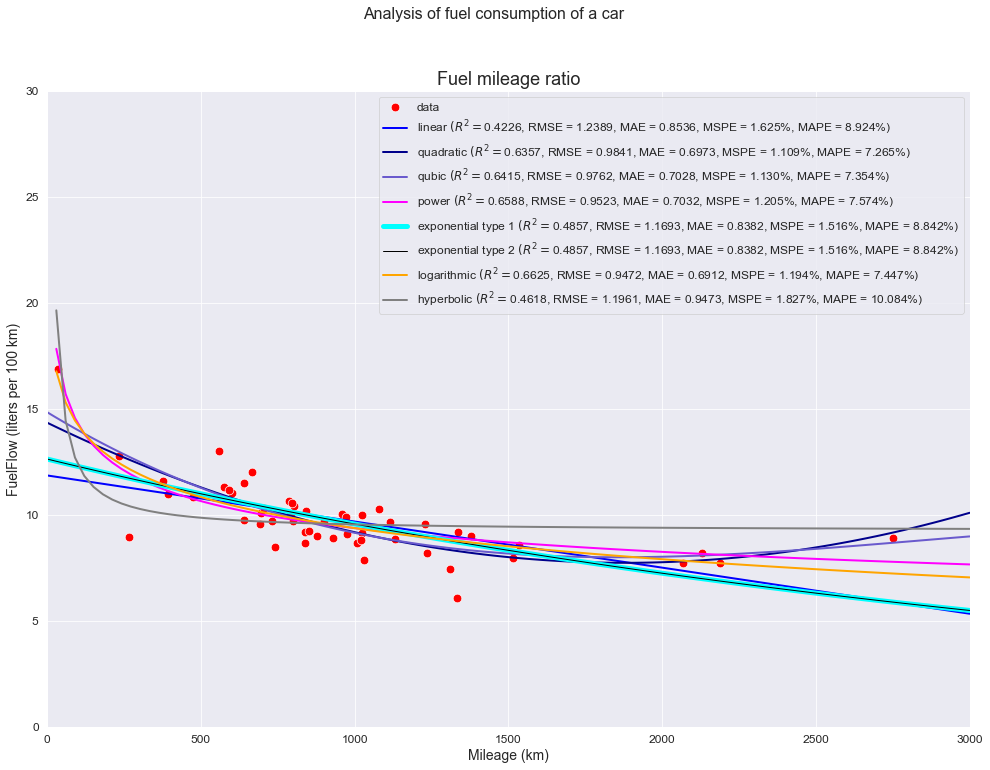

In [124]:
# setting colors for graphs
color_dict = {
        'linear':                      'blue',
        'quadratic':                   'darkblue',
        'qubic':                       'slateblue',
        'power':                       'magenta',
        'exponential type 1':          'cyan',
        'exponential type 2':          'black',
        'logarithmic':                 'orange',
        'inverse logarithmic':         'gold',
        'hyperbolic':                  'grey',
        'hyperbolic type 2':           'darkgrey',
        'hyperbolic type 3':           'lightgrey',
        'modified exponential type 1': 'darkcyan',
        'modified exponential type 2': 'black',
        'logistic type 1':             'green',
        'logistic type 2':             'darkgreen',
        'Gompertz':                    'brown'
        }

linewidth_dict = {
        'linear':                      2,
        'quadratic':                   2,
        'qubic':                       2,
        'power':                       2,
        'exponential type 1':          5,
        'exponential type 2':          1,
        'logarithmic':                 2,
        'inverse logarithmic':         2,
        'hyperbolic':                  2,
        'hyperbolic type 2':           2,
        'hyperbolic type 3':           2,
        'modified exponential type 1': 2,
        'modified exponential type 2': 2,
        'logistic type 1':             2,
        'logistic type 2':             2,
        'Gompertz':                    2
        }

# changing the Matplotlib settings
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# bounds of values of variables (when plotting)
Xmin = X1_min_graph
Xmax = X1_max_graph
Ymin = Y_min_graph
Ymax = Y_max_graph

# the value of the independent variable (when plotting)
nx = 100
hx = (Xmax - Xmin)/(nx - 1)
X_calc_graph = np.linspace(Xmin, Xmax, nx)

# plotting
fig, axes = plt.subplots(figsize=(420/INCH, 297/INCH))
title_figure = Title_String + '\n' + Task_Theme + '\n'
fig.suptitle(title_figure, fontsize = 16)
title_axes = 'Fuel mileage ratio'
axes.set_title(title_axes, fontsize = 18)

# actual data
sns.scatterplot(
    x=X_fact, y=Y_fact,
    label='data',
    s=75,
    color='red',
    ax=axes)

# models
for func_name in model_list:
    R2 = round(result_df.loc[func_name,'R2'], DecPlace)
    RMSE = round(result_df.loc[func_name,'RMSE'], DecPlace)
    MAE = round(result_df.loc[func_name,'MAE'], DecPlace)
    MSPE = "{:.3%}".format(result_df.loc[func_name,'MSPE'])
    MAPE = "{:.3%}".format(result_df.loc[func_name,'MAPE'])
    label = func_name + ' '+ r'$(R^2 = $' + f'{R2}' + ', ' + f'RMSE = {RMSE}' + ', ' + f'MAE = {MAE}' + ', ' + f'MSPE = {MSPE}' + ', ' + f'MAPE = {MAPE})'
    func = calculation_results_df.loc[func_name, 'func']
    popt = calculation_results_df.loc[func_name, 'popt']
    sns.lineplot(
        x=X_calc_graph, y=func(X_calc_graph, *popt),
        color=color_dict[func_name],
        linewidth=linewidth_dict[func_name],
        legend=True,
        label=label,
        ax=axes)

axes.set_xlim(Xmin, Xmax)
axes.set_ylim(Ymin, Ymax)
axes.set_xlabel(Variable_Name_X1, fontsize = 14)
axes.set_ylabel(Variable_Name_Y, fontsize = 14)
axes.legend(prop={'size': 12})

plt.show()

### <center> <u>***Аппроксимация с использованием scipy.optimize.least_squares***</u>

<u>Особенности использования функции:</u>

1. Реализация <u>нелинейного</u> метода наименьших квадратов, <u>с возможностью</u> введения ограничений на значения параметров.
2. Имеется возможность выбора алгоритма оптимизации:
   * **trf (Trust Region Reflective)** - установлен по умолчанию, надежный метод, особенно подходящий для больших задач с ограничениями;
   * **dogbox** - для небольших задач с ограничениями;
   * **lm (Levenberg-Marquardt algorithm)** - для небольших задач без ограничений.

Ссылка на документацию: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares

In [125]:
from scipy.optimize import least_squares

# algorithm to perform minimization
methods_dict = {
        'linear':             'lm',
        'quadratic':          'lm',
        'qubic':              'lm',
        'power':              'lm',
        'exponential type 1': 'lm',
        'exponential type 2': 'lm',
        'logarithmic':        'lm',
        'hyperbolic':         'lm'}

# actual data
X_fact = X1
Y_fact = Y

# function for calculating residuals
residual_func = lambda p, x, y: y - func(x, *p)

# return all optional outputs
full_output = True

# variables to save the calculation results
calculation_results_df = pd.DataFrame(columns=['func', 'p0', 'popt', 'jac', 'hess', 'SSE', 'MSE', 'pcov', 'perr', 'Y_calc', 'error_metrics'])
error_metrics_results_df = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE', 'R2'])

# calculations
for func_name in model_list:
    print(f'{func_name.upper()} MODEL: {formulas_dict[func_name]}')
    func = models_dict[func_name]
    calculation_results_df.loc[func_name, 'func'] = func
    p0 = p0_dict[func_name]
    print(f'p0 = {p0}')
    calculation_results_df.loc[func_name, 'p0'] = p0
    res = sci.optimize.least_squares(residual_func, p0, args=(X_fact, Y_fact), method=methods_dict[func_name])
    (popt, jac) = (res.x, res.jac)
    calculation_results_df.loc[func_name, 'popt'] = popt
    calculation_results_df.loc[func_name, 'jac'] = jac
    print(f'parameters = {popt}')
    #print(f'jac =\n {jac}')
    hess = np.linalg.inv(np.dot(jac.T, jac))
    calculation_results_df.loc[func_name, 'hess'] = hess
    print(f'hess =\n {hess}')
    SSE = (residual_func(popt, X_fact, Y_fact)**2).sum()
    calculation_results_df.loc[func_name, 'SSE'] = SSE
    print(f'SSE = {SSE}')
    MSE = SSE / (len(Y_fact)-len(p0))
    calculation_results_df.loc[func_name, 'MSE'] = MSE
    print(f'MSE = {MSE}')
    pcov = hess * MSE
    calculation_results_df.loc[func_name, 'pcov'] = pcov
    print(f'pcov =\n {pcov}')
    perr = np.sqrt(np.diag(pcov))
    calculation_results_df.loc[func_name, 'perr'] = perr
    print(f'perr = {perr}\n')
    Y_calc = func(X_fact, *popt)
    calculation_results_df.loc[func_name, 'Y_calc'] = Y_calc
    (error_metrics_dict, error_metrics_df) = regression_error_metrics(Yfact=Y_fact, Ycalc=Y_calc, model_name=func_name)
    calculation_results_df.loc[func_name, 'error_metrics'] = error_metrics_dict.values()
    error_metrics_results_df = pd.concat([error_metrics_results_df, error_metrics_df])    

LINEAR MODEL: y = b0 + b1*x
p0 = [0, 0]
parameters = [ 1.1850e+01 -2.1760e-03]
hess =
 [[ 8.7797e-02 -7.3041e-05]
 [-7.3041e-05  7.6636e-08]]
SSE = 84.42039151684142
MSE = 1.5928375757894608
pcov =
 [[ 1.3985e-01 -1.1634e-04]
 [-1.1634e-04  1.2207e-07]]
perr = [3.7396e-01 3.4938e-04]

QUADRATIC MODEL: y = b0 + b1*x + b2*x^2
p0 = [0, 0, 0]
parameters = [ 1.4343e+01 -7.0471e-03  1.8760e-06]
hess =
 [[ 2.8731e-01 -4.6282e-04  1.5012e-07]
 [-4.6282e-04  8.3812e-07 -2.9328e-10]
 [ 1.5012e-07 -2.9328e-10  1.1295e-13]]
SSE = 53.26102533463595
MSE = 1.0242504872045375
pcov =
 [[ 2.9428e-01 -4.7404e-04  1.5376e-07]
 [-4.7404e-04  8.5844e-07 -3.0039e-10]
 [ 1.5376e-07 -3.0039e-10  1.1569e-13]]
perr = [5.4247e-01 9.2652e-04 3.4013e-07]

QUBIC MODEL: y = b0 + b1*x + b2*x^2 + b3*x^3
p0 = [0, 0, 0, 0]
parameters = [ 1.4838e+01 -8.8040e-03  3.5207e-06 -4.1264e-10]
hess =
 [[ 5.7657e-01 -1.4894e-03  1.1111e-06 -2.4112e-10]
 [-1.4894e-03  4.4815e-06 -3.7039e-09  8.5573e-13]
 [ 1.1111e-06 -3.7039e-09  3

По аналогии с предыдущим примером, сформируем отдельный DataFrame, в котором соберем все результаты аппроксимации, и сравним с результатами из предыдущего примера:

In [126]:
result_df = pd.DataFrame(
                list(calculation_results_df.loc[:,'p0'].values),
                columns=['p0', 'p1', 'p2', 'p3'],
                index=model_list)

result_df = result_df.join(pd.DataFrame(
                                list(calculation_results_df.loc[:,'popt'].values),
                                columns=['b0', 'b1', 'b2', 'b3'],
                                index=model_list))

result_df = result_df.join(pd.DataFrame(
                                list(calculation_results_df.loc[:,'perr'].values),
                                columns=['std(b0)', 'std(b1)', 'std(b2)', 'std(b3)'],
                                index=model_list))

result_df = result_df.join(pd.DataFrame(
                                list(calculation_results_df.loc[:,'error_metrics'].values),
                                columns=['MSE', 'RMSE',	'MAE', 'MSPE', 'MAPE', 'RMSLE', 'R2'],
                                index=model_list))

#display(result_df)

# settings for displaying the DataFrame: result_df
result_df_least_squares = result_df.copy()
'''for elem in ['MSPE', 'MAPE']:
    result_df_leastsq[elem] = result_df_leastsq[elem].apply(lambda s: float(s[:-1]))'''
print('scipy.optimize.least_squares:'.upper())
display(result_df_least_squares
        .style
            .format(
                precision=DecPlace, na_rep='-',
                formatter={
                    'b1': '{:.' + str(DecPlace + 3) + 'f}',
                    'b2': '{:.' + str(DecPlace) + 'e}',
                    'b3': '{:.' + str(DecPlace) + 'e}',
                    'std(b1)': '{:.' + str(DecPlace + 3) + 'f}',
                    'std(b2)': '{:.' + str(DecPlace) + 'e}',
                    'std(b3)': '{:.' + str(DecPlace) + 'e}'})
            .highlight_min(color='green', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE'])
            .highlight_max(color='red', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE'])
            .highlight_max(color='green', subset='R2')
            .highlight_min(color='red', subset='R2')
            .applymap(lambda x: 'color: orange;' if abs(x) <= 10**(-(DecPlace-1)) else None, subset=['b0', 'b1', 'b2', 'b3', 'std(b0)', 'std(b1)', 'std(b2)', 'std(b3)']))    

print('scipy.optimize.leastsq:'.upper())
display(result_df_leastsq
        .style
            .format(
                precision=DecPlace, na_rep='-',
                formatter={
                    'b1': '{:.' + str(DecPlace + 3) + 'f}',
                    'b2': '{:.' + str(DecPlace) + 'e}',
                    'b3': '{:.' + str(DecPlace) + 'e}',
                    'std(b1)': '{:.' + str(DecPlace + 3) + 'f}',
                    'std(b2)': '{:.' + str(DecPlace) + 'e}',
                    'std(b3)': '{:.' + str(DecPlace) + 'e}'})
            .highlight_min(color='green', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE'])
            .highlight_max(color='red', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE'])
            .highlight_max(color='green', subset='R2')
            .highlight_min(color='red', subset='R2')
            .applymap(lambda x: 'color: orange;' if abs(x) <= 10**(-(DecPlace-1)) else None, subset=['b0', 'b1', 'b2', 'b3', 'std(b0)', 'std(b1)', 'std(b2)', 'std(b3)']))    

SCIPY.OPTIMIZE.LEAST_SQUARES:


,p0,p1,p2,p3,b0,b1,b2,b3,std(b0),std(b1),std(b2),std(b3),MSE,RMSE,MAE,MSPE,MAPE,RMSLE,R2
linear,0,0,-,-,11.8501,-0.0021760,-,-,0.3740,0.0003494,-,-,1.5349,1.2389,0.8536,0.0163,0.0892,0.1140,0.4226
quadratic,0,0,0.0000,-,14.3435,-0.0070471,1.8760e-06,-,0.5425,0.0009265,3.4013e-07,-,0.9684,0.9841,0.6973,0.0111,0.0726,0.0888,0.6357
qubic,0,0,0.0000,0.0000,14.8385,-0.0088040,3.5207e-06,-4.1264e-10,0.7698,0.0021461,1.8432e-06,4.5449e-10,0.9530,0.9762,0.7028,0.0113,0.0735,0.0888,0.6415
power,0,0,-,-,33.4033,-0.1840983,-,-,3.4528,0.0157280,-,-,0.9069,0.9523,0.7032,0.0121,0.0757,0.0915,0.6588
exponential type 1,0,0,-,-,12.6242,-0.0002783,-,-,0.4699,0.0000397,-,-,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
exponential type 2,1,1,-,-,12.6242,0.9997217,-,-,0.4699,0.0000397,-,-,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
logarithmic,0,0,-,-,23.9866,-2.1169836,-,-,1.3992,0.2075430,-,-,0.8971,0.9472,0.6912,0.0119,0.0745,0.0913,0.6625
hyperbolic,0,0,-,-,9.2219,315.7335833,-,-,0.1837,46.8207151,-,-,1.4307,1.1961,0.9473,0.0183,0.1008,0.1142,0.4618


SCIPY.OPTIMIZE.LEASTSQ:


,p0,p1,p2,p3,b0,b1,b2,b3,std(b0),std(b1),std(b2),std(b3),MSE,RMSE,MAE,MSPE,MAPE,RMSLE,R2
linear,0,0,-,-,11.8501,-0.0021760,-,-,0.3740,0.0003494,-,-,1.5349,1.2389,0.8536,0.0163,0.0892,0.1140,0.4226
quadratic,0,0,0.0000,-,14.3435,-0.0070471,1.8760e-06,-,0.5425,0.0009265,3.4013e-07,-,0.9684,0.9841,0.6973,0.0111,0.0726,0.0888,0.6357
qubic,0,0,0.0000,0.0000,14.8385,-0.0088040,3.5207e-06,-4.1264e-10,0.7698,0.0021461,1.8432e-06,4.5449e-10,0.9530,0.9762,0.7028,0.0113,0.0735,0.0888,0.6415
power,0,0,-,-,33.4033,-0.1840981,-,-,3.4528,0.0157280,-,-,0.9069,0.9523,0.7032,0.0121,0.0757,0.0915,0.6588
exponential type 1,0,0,-,-,12.6242,-0.0002783,-,-,0.4699,0.0000397,-,-,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
exponential type 2,1,1,-,-,12.6242,0.9997217,-,-,0.4699,0.0000397,-,-,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
logarithmic,0,0,-,-,23.9866,-2.1169836,-,-,1.3992,0.2075430,-,-,0.8971,0.9472,0.6912,0.0119,0.0745,0.0913,0.6625
hyperbolic,0,0,-,-,9.2219,315.7335848,-,-,0.1837,46.8207151,-,-,1.4307,1.1961,0.9473,0.0183,0.1008,0.1142,0.4618


Сформируем DataFrame, содержащий ошибки и доверительные интервалы параметров моделей аппроксимации, и сравним с результатами из предыдущего примера:

In [127]:
result_df_with_perr = pd.DataFrame()

parameter_name_list = ['b0', 'b1', 'b2', 'b3']
result_df_with_perr[parameter_name_list] = result_df[parameter_name_list]

parameter_format_dict = {
    'b0': '{:.' + str(DecPlace) + 'f}',
    'b1': '{:.' + str(DecPlace + 3) + 'f}',
    'b2': '{:.' + str(DecPlace) + 'e}',
    'b3': '{:.' + str(DecPlace) + 'e}',
    'std(b1)': '{:.' + str(DecPlace + 3) + 'f}',
    'std(b2)': '{:.' + str(DecPlace) + 'e}',
    'std(b3)': '{:.' + str(DecPlace) + 'e}'}

for parameter in parameter_name_list:
    for model in result_df.index:
        if not result_df.isna().loc[model, parameter]:
            result_df_with_perr.loc[model, parameter] = \
                str(parameter_format_dict[parameter].format(result_df.loc[model, parameter])) + \
                    ' ' + u"\u00B1" + ' ' + \
                    str(parameter_format_dict[parameter].format(result_df.loc[model, 'std('+parameter+')']))
            relative_errors = abs(result_df.loc[model, 'std('+parameter+')'] / result_df.loc[model, parameter])
            result_df_with_perr.loc[model, 'error('+parameter+')'] = '{:.3%}'.format(relative_errors)

result_df_with_perr_least_squares = result_df_with_perr.copy()
print('scipy.optimize.least_squares:'.upper())
display(result_df_with_perr_least_squares)

print('scipy.optimize.leastsq:'.upper())
display(result_df_with_perr_leastsq)

SCIPY.OPTIMIZE.LEAST_SQUARES:


,b0,b1,b2,b3,error(b0),error(b1),error(b2),error(b3)
linear,11.8501 ± 0.3740,-0.0021760 ± 0.0003494,NaN,NaN,3.156%,16.056%,NaN,NaN
quadratic,14.3435 ± 0.5425,-0.0070471 ± 0.0009265,1.8760e-06 ± 3.4013e-07,NaN,3.782%,13.148%,18.130%,NaN
qubic,14.8385 ± 0.7698,-0.0088040 ± 0.0021461,3.5207e-06 ± 1.8432e-06,-4.1264e-10 ± 4.5449e-10,5.188%,24.376%,52.353%,110.140%
power,33.4033 ± 3.4528,-0.1840983 ± 0.0157280,NaN,NaN,10.337%,8.543%,NaN,NaN
exponential type 1,12.6242 ± 0.4699,-0.0002783 ± 0.0000397,NaN,NaN,3.723%,14.275%,NaN,NaN
exponential type 2,12.6242 ± 0.4699,0.9997217 ± 0.0000397,NaN,NaN,3.723%,0.004%,NaN,NaN
logarithmic,23.9866 ± 1.3992,-2.1169836 ± 0.2075430,NaN,NaN,5.833%,9.804%,NaN,NaN
hyperbolic,9.2219 ± 0.1837,315.7335833 ± 46.8207151,NaN,NaN,1.992%,14.829%,NaN,NaN


SCIPY.OPTIMIZE.LEASTSQ:


,b0,b1,b2,b3,error(b0),error(b1),error(b2),error(b3)
linear,11.8501 ± 0.3740,-0.0021760 ± 0.0003494,NaN,NaN,3.156%,16.056%,NaN,NaN
quadratic,14.3435 ± 0.5425,-0.0070471 ± 0.0009265,1.8760e-06 ± 3.4013e-07,NaN,3.782%,13.148%,18.130%,NaN
qubic,14.8385 ± 0.7698,-0.0088040 ± 0.0021461,3.5207e-06 ± 1.8432e-06,-4.1264e-10 ± 4.5449e-10,5.188%,24.376%,52.353%,110.140%
power,33.4033 ± 3.4528,-0.1840981 ± 0.0157280,NaN,NaN,10.337%,8.543%,NaN,NaN
exponential type 1,12.6242 ± 0.4699,-0.0002783 ± 0.0000397,NaN,NaN,3.723%,14.275%,NaN,NaN
exponential type 2,12.6242 ± 0.4699,0.9997217 ± 0.0000397,NaN,NaN,3.723%,0.004%,NaN,NaN
logarithmic,23.9866 ± 1.3992,-2.1169836 ± 0.2075430,NaN,NaN,5.833%,9.804%,NaN,NaN
hyperbolic,9.2219 ± 0.1837,315.7335848 ± 46.8207151,NaN,NaN,1.992%,14.829%,NaN,NaN


### <center> <u>***Аппроксимация с использованием scipy.optimize.curve_fit***</u>

<u>Особенности использования функции:</u>

1. Реализация <u>нелинейного</u> метода наименьших квадратов, <u>с возможностью</u> введения ограничений на значения параметров.
2. Имеется возможность выбора алгоритма оптимизации (**trf**, **dogbox**, **lm**), по аналогии с **scipy.optimize.least_squares**).


Ссылка на документацию: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

In [128]:
from scipy.optimize import curve_fit

# algorithm to perform minimization
methods_dict = {
        'linear':             'lm',
        'quadratic':          'lm',
        'qubic':              'lm',
        'power':              'lm',
        'exponential type 1': 'lm',
        'exponential type 2': 'lm',
        'logarithmic':        'lm',
        'hyperbolic':         'lm'}

# actual data
X_fact = X1
Y_fact = Y

# return all optional outputs
full_output = True

# variables to save the calculation results
calculation_results_df = pd.DataFrame(columns=['func', 'p0', 'popt', 'pcov', 'perr', 'Y_calc', 'error_metrics'])
error_metrics_results_df = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE', 'R2'])

# calculations
for func_name in model_list:
    print(f'{func_name.upper()} MODEL: {formulas_dict[func_name]}')
    func = models_dict[func_name]
    calculation_results_df.loc[func_name, 'func'] = func
    p0 = p0_dict[func_name]
    print(f'p0 = {p0}')
    calculation_results_df.loc[func_name, 'p0'] = p0
    if full_output:
        (popt, pcov, infodict, mesg, ier) = curve_fit(func, X_fact, Y_fact, p0=p0, method=methods_dict[func_name], full_output=full_output)
        integer_flag = f'ier = {ier}, the solution was found' if ier<=4 else f'ier = {ier}, the solution was not found'
        print(integer_flag, '\n', mesg)
        calculation_results_df.loc[func_name, 'popt'] = popt
        print(f'parameters = {popt}')
        calculation_results_df.loc[func_name, 'pcov'] = pcov
        print(f'pcov =\n {pcov}')
        perr = np.sqrt(np.diag(pcov))
        calculation_results_df.loc[func_name, 'perr'] = perr
        print(f'perr = {perr}\n') 
    else:
        (popt, pcov) = curve_fit(func, X_fact, Y_fact, p0=p0, method=methods_dict[func_name], full_output=full_output)
        calculation_results_df.loc[func_name, 'popt'] = popt
        print(f'parameters = {popt}')
        calculation_results_df.loc[func_name, 'pcov'] = pcov
        print(f'pcov =\n {pcov}')
        perr = np.sqrt(np.diag(pcov))
        calculation_results_df.loc[func_name, 'perr'] = perr
        print(f'perr = {perr}\n') 
    Y_calc = func(X_fact, *popt)
    calculation_results_df.loc[func_name, 'Y_calc'] = Y_calc
    (error_metrics_dict, error_metrics_df) = regression_error_metrics(Yfact=Y_fact, Ycalc=Y_calc, model_name=func_name)
    calculation_results_df.loc[func_name, 'error_metrics'] = error_metrics_dict.values()
    error_metrics_results_df = pd.concat([error_metrics_results_df, error_metrics_df])        

LINEAR MODEL: y = b0 + b1*x
p0 = [0, 0]
ier = 3, the solution was found 
 Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000 and the relative error between two consecutive iterates is at 
  most 0.000000
parameters = [ 1.1850e+01 -2.1760e-03]
pcov =
 [[ 1.3985e-01 -1.1634e-04]
 [-1.1634e-04  1.2207e-07]]
perr = [3.7396e-01 3.4938e-04]

QUADRATIC MODEL: y = b0 + b1*x + b2*x^2
p0 = [0, 0, 0]
ier = 1, the solution was found 
 Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
parameters = [ 1.4343e+01 -7.0471e-03  1.8760e-06]
pcov =
 [[ 2.9428e-01 -4.7404e-04  1.5376e-07]
 [-4.7404e-04  8.5844e-07 -3.0039e-10]
 [ 1.5376e-07 -3.0039e-10  1.1569e-13]]
perr = [5.4247e-01 9.2652e-04 3.4013e-07]

QUBIC MODEL: y = b0 + b1*x + b2*x^2 + b3*x^3
p0 = [0, 0, 0, 0]
ier = 1, the solution was found 
 Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000
parameters = [ 1.4838e+01 -8.8040e

По аналогии с предыдущим примером, сформируем отдельный DataFrame, в котором соберем все результаты аппроксимации, и сравним с результатами из предыдущих примеров:

In [129]:
result_df = pd.DataFrame(
                list(calculation_results_df.loc[:,'p0'].values),
                columns=['p0', 'p1', 'p2', 'p3'],
                index=model_list)

result_df = result_df.join(pd.DataFrame(
                                list(calculation_results_df.loc[:,'popt'].values),
                                columns=['b0', 'b1', 'b2', 'b3'],
                                index=model_list))

result_df = result_df.join(pd.DataFrame(
                                list(calculation_results_df.loc[:,'perr'].values),
                                columns=['std(b0)', 'std(b1)', 'std(b2)', 'std(b3)'],
                                index=model_list))

result_df = result_df.join(pd.DataFrame(
                                list(calculation_results_df.loc[:,'error_metrics'].values),
                                columns=['MSE', 'RMSE',	'MAE', 'MSPE', 'MAPE', 'RMSLE', 'R2'],
                                index=model_list))

#display(result_df)

# settings for displaying the DataFrame: result_df
result_df_curve_fit = result_df.copy()
'''for elem in ['MSPE', 'MAPE']:
    result_df_leastsq[elem] = result_df_leastsq[elem].apply(lambda s: float(s[:-1]))'''
print('scipy.optimize.curve_fit:'.upper())
display(result_df_curve_fit
        .style
            .format(
                precision=DecPlace, na_rep='-',
                formatter={
                    'b1': '{:.' + str(DecPlace + 3) + 'f}',
                    'b2': '{:.' + str(DecPlace) + 'e}',
                    'b3': '{:.' + str(DecPlace) + 'e}',
                    'std(b1)': '{:.' + str(DecPlace + 3) + 'f}',
                    'std(b2)': '{:.' + str(DecPlace) + 'e}',
                    'std(b3)': '{:.' + str(DecPlace) + 'e}'})
            .highlight_min(color='green', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE'])
            .highlight_max(color='red', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE'])
            .highlight_max(color='green', subset='R2')
            .highlight_min(color='red', subset='R2')
            .applymap(lambda x: 'color: orange;' if abs(x) <= 10**(-(DecPlace-1)) else None, subset=['b0', 'b1', 'b2', 'b3', 'std(b0)', 'std(b1)', 'std(b2)', 'std(b3)']))    

print('scipy.optimize.least_squares:'.upper())
display(result_df_least_squares
        .style
            .format(
                precision=DecPlace, na_rep='-',
                formatter={
                    'b1': '{:.' + str(DecPlace + 3) + 'f}',
                    'b2': '{:.' + str(DecPlace) + 'e}',
                    'b3': '{:.' + str(DecPlace) + 'e}',
                    'std(b1)': '{:.' + str(DecPlace + 3) + 'f}',
                    'std(b2)': '{:.' + str(DecPlace) + 'e}',
                    'std(b3)': '{:.' + str(DecPlace) + 'e}'})
            .highlight_min(color='green', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE'])
            .highlight_max(color='red', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE'])
            .highlight_max(color='green', subset='R2')
            .highlight_min(color='red', subset='R2')
            .applymap(lambda x: 'color: orange;' if abs(x) <= 10**(-(DecPlace-1)) else None, subset=['b0', 'b1', 'b2', 'b3', 'std(b0)', 'std(b1)', 'std(b2)', 'std(b3)']))    

print('scipy.optimize.least_squares:'.upper())
display(result_df_leastsq
        .style
            .format(
                precision=DecPlace, na_rep='-',
                formatter={
                    'b1': '{:.' + str(DecPlace + 3) + 'f}',
                    'b2': '{:.' + str(DecPlace) + 'e}',
                    'b3': '{:.' + str(DecPlace) + 'e}',
                    'std(b1)': '{:.' + str(DecPlace + 3) + 'f}',
                    'std(b2)': '{:.' + str(DecPlace) + 'e}',
                    'std(b3)': '{:.' + str(DecPlace) + 'e}'})
            .highlight_min(color='green', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE'])
            .highlight_max(color='red', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE'])
            .highlight_max(color='green', subset='R2')
            .highlight_min(color='red', subset='R2')
            .applymap(lambda x: 'color: orange;' if abs(x) <= 10**(-(DecPlace-1)) else None, subset=['b0', 'b1', 'b2', 'b3', 'std(b0)', 'std(b1)', 'std(b2)', 'std(b3)']))    

SCIPY.OPTIMIZE.CURVE_FIT:


,p0,p1,p2,p3,b0,b1,b2,b3,std(b0),std(b1),std(b2),std(b3),MSE,RMSE,MAE,MSPE,MAPE,RMSLE,R2
linear,0,0,-,-,11.8501,-0.0021760,-,-,0.3740,0.0003494,-,-,1.5349,1.2389,0.8536,0.0163,0.0892,0.1140,0.4226
quadratic,0,0,0.0000,-,14.3435,-0.0070471,1.8760e-06,-,0.5425,0.0009265,3.4013e-07,-,0.9684,0.9841,0.6973,0.0111,0.0726,0.0888,0.6357
qubic,0,0,0.0000,0.0000,14.8385,-0.0088040,3.5207e-06,-4.1264e-10,0.7698,0.0021461,1.8432e-06,4.5449e-10,0.9530,0.9762,0.7028,0.0113,0.0735,0.0888,0.6415
power,0,0,-,-,33.4033,-0.1840981,-,-,3.4528,0.0157280,-,-,0.9069,0.9523,0.7032,0.0121,0.0757,0.0915,0.6588
exponential type 1,0,0,-,-,12.6242,-0.0002783,-,-,0.4699,0.0000397,-,-,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
exponential type 2,1,1,-,-,12.6242,0.9997217,-,-,0.4699,0.0000397,-,-,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
logarithmic,0,0,-,-,23.9866,-2.1169836,-,-,1.3992,0.2075430,-,-,0.8971,0.9472,0.6912,0.0119,0.0745,0.0913,0.6625
hyperbolic,0,0,-,-,9.2219,315.7335848,-,-,0.1837,46.8207151,-,-,1.4307,1.1961,0.9473,0.0183,0.1008,0.1142,0.4618


SCIPY.OPTIMIZE.LEAST_SQUARES:


,p0,p1,p2,p3,b0,b1,b2,b3,std(b0),std(b1),std(b2),std(b3),MSE,RMSE,MAE,MSPE,MAPE,RMSLE,R2
linear,0,0,-,-,11.8501,-0.0021760,-,-,0.3740,0.0003494,-,-,1.5349,1.2389,0.8536,0.0163,0.0892,0.1140,0.4226
quadratic,0,0,0.0000,-,14.3435,-0.0070471,1.8760e-06,-,0.5425,0.0009265,3.4013e-07,-,0.9684,0.9841,0.6973,0.0111,0.0726,0.0888,0.6357
qubic,0,0,0.0000,0.0000,14.8385,-0.0088040,3.5207e-06,-4.1264e-10,0.7698,0.0021461,1.8432e-06,4.5449e-10,0.9530,0.9762,0.7028,0.0113,0.0735,0.0888,0.6415
power,0,0,-,-,33.4033,-0.1840983,-,-,3.4528,0.0157280,-,-,0.9069,0.9523,0.7032,0.0121,0.0757,0.0915,0.6588
exponential type 1,0,0,-,-,12.6242,-0.0002783,-,-,0.4699,0.0000397,-,-,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
exponential type 2,1,1,-,-,12.6242,0.9997217,-,-,0.4699,0.0000397,-,-,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
logarithmic,0,0,-,-,23.9866,-2.1169836,-,-,1.3992,0.2075430,-,-,0.8971,0.9472,0.6912,0.0119,0.0745,0.0913,0.6625
hyperbolic,0,0,-,-,9.2219,315.7335833,-,-,0.1837,46.8207151,-,-,1.4307,1.1961,0.9473,0.0183,0.1008,0.1142,0.4618


SCIPY.OPTIMIZE.LEAST_SQUARES:


,p0,p1,p2,p3,b0,b1,b2,b3,std(b0),std(b1),std(b2),std(b3),MSE,RMSE,MAE,MSPE,MAPE,RMSLE,R2
linear,0,0,-,-,11.8501,-0.0021760,-,-,0.3740,0.0003494,-,-,1.5349,1.2389,0.8536,0.0163,0.0892,0.1140,0.4226
quadratic,0,0,0.0000,-,14.3435,-0.0070471,1.8760e-06,-,0.5425,0.0009265,3.4013e-07,-,0.9684,0.9841,0.6973,0.0111,0.0726,0.0888,0.6357
qubic,0,0,0.0000,0.0000,14.8385,-0.0088040,3.5207e-06,-4.1264e-10,0.7698,0.0021461,1.8432e-06,4.5449e-10,0.9530,0.9762,0.7028,0.0113,0.0735,0.0888,0.6415
power,0,0,-,-,33.4033,-0.1840981,-,-,3.4528,0.0157280,-,-,0.9069,0.9523,0.7032,0.0121,0.0757,0.0915,0.6588
exponential type 1,0,0,-,-,12.6242,-0.0002783,-,-,0.4699,0.0000397,-,-,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
exponential type 2,1,1,-,-,12.6242,0.9997217,-,-,0.4699,0.0000397,-,-,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
logarithmic,0,0,-,-,23.9866,-2.1169836,-,-,1.3992,0.2075430,-,-,0.8971,0.9472,0.6912,0.0119,0.0745,0.0913,0.6625
hyperbolic,0,0,-,-,9.2219,315.7335848,-,-,0.1837,46.8207151,-,-,1.4307,1.1961,0.9473,0.0183,0.1008,0.1142,0.4618


По аналогии с предыдущим примером, сформируем отдельный DataFrame, содержащий ошибки и доверительные интервалы параметров моделей аппроксимации, и сравним с результатами из предыдущих примеров:

In [130]:
result_df_with_perr = pd.DataFrame()

parameter_name_list = ['b0', 'b1', 'b2', 'b3']
result_df_with_perr[parameter_name_list] = result_df[parameter_name_list]

parameter_format_dict = {
    'b0': '{:.' + str(DecPlace) + 'f}',
    'b1': '{:.' + str(DecPlace + 3) + 'f}',
    'b2': '{:.' + str(DecPlace) + 'e}',
    'b3': '{:.' + str(DecPlace) + 'e}',
    'std(b1)': '{:.' + str(DecPlace + 3) + 'f}',
    'std(b2)': '{:.' + str(DecPlace) + 'e}',
    'std(b3)': '{:.' + str(DecPlace) + 'e}'}

for parameter in parameter_name_list:
    for model in result_df.index:
        if not result_df.isna().loc[model, parameter]:
            result_df_with_perr.loc[model, parameter] = \
                str(parameter_format_dict[parameter].format(result_df.loc[model, parameter])) + \
                    ' ' + u"\u00B1" + ' ' + \
                    str(parameter_format_dict[parameter].format(result_df.loc[model, 'std('+parameter+')']))
            relative_errors = abs(result_df.loc[model, 'std('+parameter+')'] / result_df.loc[model, parameter])
            result_df_with_perr.loc[model, 'error('+parameter+')'] = '{:.3%}'.format(relative_errors)

result_df_with_perr_curve_fit = result_df_with_perr.copy()
print('scipy.optimize.curve_fit:'.upper())
display(result_df_with_perr_curve_fit)

print('scipy.optimize.least_squares:'.upper())
display(result_df_with_perr_least_squares)

print('scipy.optimize.leastsq:'.upper())
display(result_df_with_perr_leastsq)

SCIPY.OPTIMIZE.CURVE_FIT:


,b0,b1,b2,b3,error(b0),error(b1),error(b2),error(b3)
linear,11.8501 ± 0.3740,-0.0021760 ± 0.0003494,NaN,NaN,3.156%,16.056%,NaN,NaN
quadratic,14.3435 ± 0.5425,-0.0070471 ± 0.0009265,1.8760e-06 ± 3.4013e-07,NaN,3.782%,13.148%,18.130%,NaN
qubic,14.8385 ± 0.7698,-0.0088040 ± 0.0021461,3.5207e-06 ± 1.8432e-06,-4.1264e-10 ± 4.5449e-10,5.188%,24.376%,52.353%,110.140%
power,33.4033 ± 3.4528,-0.1840981 ± 0.0157280,NaN,NaN,10.337%,8.543%,NaN,NaN
exponential type 1,12.6242 ± 0.4699,-0.0002783 ± 0.0000397,NaN,NaN,3.723%,14.275%,NaN,NaN
exponential type 2,12.6242 ± 0.4699,0.9997217 ± 0.0000397,NaN,NaN,3.723%,0.004%,NaN,NaN
logarithmic,23.9866 ± 1.3992,-2.1169836 ± 0.2075430,NaN,NaN,5.833%,9.804%,NaN,NaN
hyperbolic,9.2219 ± 0.1837,315.7335848 ± 46.8207151,NaN,NaN,1.992%,14.829%,NaN,NaN


SCIPY.OPTIMIZE.LEAST_SQUARES:


,b0,b1,b2,b3,error(b0),error(b1),error(b2),error(b3)
linear,11.8501 ± 0.3740,-0.0021760 ± 0.0003494,NaN,NaN,3.156%,16.056%,NaN,NaN
quadratic,14.3435 ± 0.5425,-0.0070471 ± 0.0009265,1.8760e-06 ± 3.4013e-07,NaN,3.782%,13.148%,18.130%,NaN
qubic,14.8385 ± 0.7698,-0.0088040 ± 0.0021461,3.5207e-06 ± 1.8432e-06,-4.1264e-10 ± 4.5449e-10,5.188%,24.376%,52.353%,110.140%
power,33.4033 ± 3.4528,-0.1840983 ± 0.0157280,NaN,NaN,10.337%,8.543%,NaN,NaN
exponential type 1,12.6242 ± 0.4699,-0.0002783 ± 0.0000397,NaN,NaN,3.723%,14.275%,NaN,NaN
exponential type 2,12.6242 ± 0.4699,0.9997217 ± 0.0000397,NaN,NaN,3.723%,0.004%,NaN,NaN
logarithmic,23.9866 ± 1.3992,-2.1169836 ± 0.2075430,NaN,NaN,5.833%,9.804%,NaN,NaN
hyperbolic,9.2219 ± 0.1837,315.7335833 ± 46.8207151,NaN,NaN,1.992%,14.829%,NaN,NaN


SCIPY.OPTIMIZE.LEASTSQ:


,b0,b1,b2,b3,error(b0),error(b1),error(b2),error(b3)
linear,11.8501 ± 0.3740,-0.0021760 ± 0.0003494,NaN,NaN,3.156%,16.056%,NaN,NaN
quadratic,14.3435 ± 0.5425,-0.0070471 ± 0.0009265,1.8760e-06 ± 3.4013e-07,NaN,3.782%,13.148%,18.130%,NaN
qubic,14.8385 ± 0.7698,-0.0088040 ± 0.0021461,3.5207e-06 ± 1.8432e-06,-4.1264e-10 ± 4.5449e-10,5.188%,24.376%,52.353%,110.140%
power,33.4033 ± 3.4528,-0.1840981 ± 0.0157280,NaN,NaN,10.337%,8.543%,NaN,NaN
exponential type 1,12.6242 ± 0.4699,-0.0002783 ± 0.0000397,NaN,NaN,3.723%,14.275%,NaN,NaN
exponential type 2,12.6242 ± 0.4699,0.9997217 ± 0.0000397,NaN,NaN,3.723%,0.004%,NaN,NaN
logarithmic,23.9866 ± 1.3992,-2.1169836 ± 0.2075430,NaN,NaN,5.833%,9.804%,NaN,NaN
hyperbolic,9.2219 ± 0.1837,315.7335848 ± 46.8207151,NaN,NaN,1.992%,14.829%,NaN,NaN


### <center> <u>***Аппроксимация с использованием scipy.optimize.minimize***</u>

<u>Особенности использования функции:</u>

1. Минимизация значений скалярной функции одной или нескольких переменных; при использовании в качестве функции суммы квадратов получаем реализацию <u>нелинейного</u> метода наименьших квадратов.
2. Имеется возможность выбора широкого набора алгоритмов оптимизации (**Nelder-Mead**, **Powell**, **CG**, **BFGS**, **Newton-CG**, **L-BFGS-B**, **TNC**, **COBYLA**, **SLSQP**, **trust-constr**, **dogleg**, **trust-ncg**, **trust-exact**, **trust-krylov**, custom), получить информацию можно с помощью функции **scipy.optimize.show_options** (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.show_options.html#scipy.optimize.show_options), а также есть возможность добавить пользовательский алгоритм оптимизации.

Ссылка на документацию: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize

In [131]:
from scipy import optimize

# algorithm to perform minimization
methods_dict = {
        'linear':             'BFGS',
        'quadratic':          'BFGS',
        'qubic':              'BFGS',
        'power':              'BFGS',
        'exponential type 1': 'BFGS',
        'exponential type 2': 'BFGS',
        'logarithmic':        'BFGS',
        'hyperbolic':         'BFGS'}

# initial values for exponential type 2
n = len(Y_fact)
(x1, x2, y1, y2) = (X_fact[0], X_fact[n-1], Y_fact[0], Y_fact[n-1])
p0_b0 = y2 * np.exp(np.log(y2/y1) * x2/(x1-x2))
p0_b1 = np.exp(-np.log(y2/y1) / (x1-x2))
#p0 = [p0_b0, p0_b1]

# initial values
p0_dict = {
        'linear':             [0, 0],
        'quadratic':          [0, 0, 0],
        'qubic':              [0, 0, 0, 0],
        'power':              [0, 0],
        'exponential type 1': [0, 0],
        'exponential type 2': [1, 1],
        'logarithmic':        [0, 0],
        'hyperbolic':         [0, 0]}


# actual data
X_fact = X1
Y_fact = Y

# variables to save the calculation results
calculation_results_df = pd.DataFrame(columns=['func', 'p0', 'popt', 'hess_inv', 'cov_x', 'SSE', 'MSE', 'pcov', 'perr', 'Y_calc', 'error_metrics'])
error_metrics_results_df = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE', 'R2'])

# calculations
for func_name in model_list:
    print(f'{func_name.upper()} MODEL: {formulas_dict[func_name]}')
    func = models_dict[func_name]
    SSE_func = lambda p, x, y: np.sum((y - func(x, *p))**2)
    calculation_results_df.loc[func_name, 'func'] = func
    p0 = p0_dict[func_name]
    print(f'p0 = {p0}')
    calculation_results_df.loc[func_name, 'p0'] = p0
    res = sci.optimize.minimize(SSE_func, p0, args=(X_fact, Y_fact), method=methods_dict[func_name])
    (popt, hess_inv) = (res.x, res.hess_inv)
    calculation_results_df.loc[func_name, 'popt'] = popt
    calculation_results_df.loc[func_name, 'hess_inv'] = hess_inv
    print(f'parameters = {popt}')
    print(f'hess_inv =\n {hess_inv}')
    cov_x = 2*hess_inv
    calculation_results_df.loc[func_name, 'cov_x'] = cov_x
    print(f'cov_x =\n {cov_x}')
    SSE = (residual_func(popt, X_fact, Y_fact)**2).sum()
    calculation_results_df.loc[func_name, 'SSE'] = SSE
    print(f'SSE = {SSE}')
    MSE = SSE / (len(Y_fact)-len(p0))
    calculation_results_df.loc[func_name, 'MSE'] = MSE
    print(f'MSE = {MSE}')
    pcov = cov_x * MSE
    calculation_results_df.loc[func_name, 'pcov'] = pcov
    print(f'pcov =\n {pcov}')
    perr = np.sqrt(np.diag(pcov))
    calculation_results_df.loc[func_name, 'perr'] = perr
    print(f'perr = {perr}\n')
    Y_calc = func(X_fact, *popt)
    calculation_results_df.loc[func_name, 'Y_calc'] = Y_calc
    (error_metrics_dict, error_metrics_df) = regression_error_metrics(Yfact=Y_fact, Ycalc=Y_calc, model_name=func_name)
    calculation_results_df.loc[func_name, 'error_metrics'] = error_metrics_dict.values()
    error_metrics_results_df = pd.concat([error_metrics_results_df, error_metrics_df])

LINEAR MODEL: y = b0 + b1*x
p0 = [0, 0]
parameters = [ 1.1850e+01 -2.1760e-03]
hess_inv =
 [[ 4.4277e-02 -3.6836e-05]
 [-3.6836e-05  3.8580e-08]]
cov_x =
 [[ 8.8554e-02 -7.3672e-05]
 [-7.3672e-05  7.7161e-08]]
SSE = 84.42039152034965
MSE = 1.5928375758556539
pcov =
 [[ 1.4105e-01 -1.1735e-04]
 [-1.1735e-04  1.2290e-07]]
perr = [3.7557e-01 3.5058e-04]

QUADRATIC MODEL: y = b0 + b1*x + b2*x^2
p0 = [0, 0, 0]
parameters = [ 1.4155e+01 -6.6782e-03  1.7339e-06]
hess_inv =
 [[ 1.4366e-01 -2.3141e-04  7.5060e-08]
 [-2.3141e-04  4.1907e-07 -1.4664e-10]
 [ 7.5060e-08 -1.4664e-10  5.6477e-14]]
cov_x =
 [[ 2.8732e-01 -4.6283e-04  1.5012e-07]
 [-4.6283e-04  8.3813e-07 -2.9328e-10]
 [ 1.5012e-07 -2.9328e-10  1.1295e-13]]
SSE = 53.43977726407014
MSE = 1.0276880243090412
pcov =
 [[ 2.9527e-01 -4.7564e-04  1.5428e-07]
 [-4.7564e-04  8.6134e-07 -3.0140e-10]
 [ 1.5428e-07 -3.0140e-10  1.1608e-13]]
perr = [5.4339e-01 9.2808e-04 3.4071e-07]

QUBIC MODEL: y = b0 + b1*x + b2*x^2 + b3*x^3
p0 = [0, 0, 0, 0]
pa

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_13116\3953735195.py:7: RuntimeWarning: overflow encountered in power
  exponential_type_2_func = lambda x, b0, b1: b0*np.power(b1, x)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_13116\1549583686.py:45: RuntimeWarning: overflow encountered in square
  SSE_func = lambda p, x, y: np.sum((y - func(x, *p))**2)
C:\Users\Пользователь\AppData\Roaming\Python\Python310\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_13116\3953735195.py:7: RuntimeWarning: overflow encountered in power
  exponential_type_2_func = lambda x, b0, b1: b0*np.power(b1, x)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_13116\1549583686.py:45: RuntimeWarning: overflow encountered in square
  SSE_func = lambda p, x, y: np.sum((y - func(x, *p))**2)


In [132]:
result_df = pd.DataFrame(
                list(calculation_results_df.loc[:,'p0'].values),
                columns=['p0', 'p1', 'p2', 'p3'],
                index=model_list)

result_df = result_df.join(pd.DataFrame(
                                list(calculation_results_df.loc[:,'popt'].values),
                                columns=['b0', 'b1', 'b2', 'b3'],
                                index=model_list))

result_df = result_df.join(pd.DataFrame(
                                list(calculation_results_df.loc[:,'perr'].values),
                                columns=['std(b0)', 'std(b1)', 'std(b2)', 'std(b3)'],
                                index=model_list))

result_df = result_df.join(pd.DataFrame(
                                list(calculation_results_df.loc[:,'error_metrics'].values),
                                columns=['MSE', 'RMSE',	'MAE', 'MSPE', 'MAPE', 'RMSLE', 'R2'],
                                index=model_list))

#display(result_df)

# settings for displaying the DataFrame: result_df
result_df_optimize_minimize = result_df.copy()
'''for elem in ['MSPE', 'MAPE']:
    result_df_leastsq[elem] = result_df_leastsq[elem].apply(lambda s: float(s[:-1]))'''
print('scipy.optimize.minimize:'.upper())
display(result_df_optimize_minimize
        .style
            .format(
                precision=DecPlace, na_rep='-',
                formatter={
                    'b1': '{:.' + str(DecPlace + 3) + 'f}',
                    'b2': '{:.' + str(DecPlace) + 'e}',
                    'b3': '{:.' + str(DecPlace) + 'e}',
                    'std(b1)': '{:.' + str(DecPlace + 3) + 'f}',
                    'std(b2)': '{:.' + str(DecPlace) + 'e}',
                    'std(b3)': '{:.' + str(DecPlace) + 'e}'})
            .highlight_min(color='green', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE'])
            .highlight_max(color='red', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE'])
            .highlight_max(color='green', subset='R2')
            .highlight_min(color='red', subset='R2')
            .applymap(lambda x: 'color: orange;' if abs(x) <= 10**(-(DecPlace-1)) else None, subset=['b0', 'b1', 'b2', 'b3', 'std(b0)', 'std(b1)', 'std(b2)', 'std(b3)']))    

print('scipy.optimize.curve_fit:'.upper())
display(result_df_curve_fit
        .style
            .format(
                precision=DecPlace, na_rep='-',
                formatter={
                    'b1': '{:.' + str(DecPlace + 3) + 'f}',
                    'b2': '{:.' + str(DecPlace) + 'e}',
                    'b3': '{:.' + str(DecPlace) + 'e}',
                    'std(b1)': '{:.' + str(DecPlace + 3) + 'f}',
                    'std(b2)': '{:.' + str(DecPlace) + 'e}',
                    'std(b3)': '{:.' + str(DecPlace) + 'e}'})
            .highlight_min(color='green', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE'])
            .highlight_max(color='red', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE'])
            .highlight_max(color='green', subset='R2')
            .highlight_min(color='red', subset='R2')
            .applymap(lambda x: 'color: orange;' if abs(x) <= 10**(-(DecPlace-1)) else None, subset=['b0', 'b1', 'b2', 'b3', 'std(b0)', 'std(b1)', 'std(b2)', 'std(b3)']))    

print('scipy.optimize.least_squares:'.upper())
display(result_df_least_squares
        .style
            .format(
                precision=DecPlace, na_rep='-',
                formatter={
                    'b1': '{:.' + str(DecPlace + 3) + 'f}',
                    'b2': '{:.' + str(DecPlace) + 'e}',
                    'b3': '{:.' + str(DecPlace) + 'e}',
                    'std(b1)': '{:.' + str(DecPlace + 3) + 'f}',
                    'std(b2)': '{:.' + str(DecPlace) + 'e}',
                    'std(b3)': '{:.' + str(DecPlace) + 'e}'})
            .highlight_min(color='green', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE'])
            .highlight_max(color='red', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE'])
            .highlight_max(color='green', subset='R2')
            .highlight_min(color='red', subset='R2')
            .applymap(lambda x: 'color: orange;' if abs(x) <= 10**(-(DecPlace-1)) else None, subset=['b0', 'b1', 'b2', 'b3', 'std(b0)', 'std(b1)', 'std(b2)', 'std(b3)']))    

print('scipy.optimize.leastsq:'.upper())
display(result_df_leastsq
        .style
            .format(
                precision=DecPlace, na_rep='-',
                formatter={
                    'b1': '{:.' + str(DecPlace + 3) + 'f}',
                    'b2': '{:.' + str(DecPlace) + 'e}',
                    'b3': '{:.' + str(DecPlace) + 'e}',
                    'std(b1)': '{:.' + str(DecPlace + 3) + 'f}',
                    'std(b2)': '{:.' + str(DecPlace) + 'e}',
                    'std(b3)': '{:.' + str(DecPlace) + 'e}'})
            .highlight_min(color='green', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE'])
            .highlight_max(color='red', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE'])
            .highlight_max(color='green', subset='R2')
            .highlight_min(color='red', subset='R2')
            .applymap(lambda x: 'color: orange;' if abs(x) <= 10**(-(DecPlace-1)) else None, subset=['b0', 'b1', 'b2', 'b3', 'std(b0)', 'std(b1)', 'std(b2)', 'std(b3)']))    


SCIPY.OPTIMIZE.MINIMIZE:


,p0,p1,p2,p3,b0,b1,b2,b3,std(b0),std(b1),std(b2),std(b3),MSE,RMSE,MAE,MSPE,MAPE,RMSLE,R2
linear,0,0,-,-,11.8501,-0.0021760,-,-,0.3756,0.0003506,-,-,1.5349,1.2389,0.8536,0.0163,0.0892,0.1140,0.4226
quadratic,0,0,0.0000,-,14.1546,-0.0066782,1.7339e-06,-,0.5434,0.0009281,3.4071e-07,-,0.9716,0.9857,0.6919,0.0111,0.0720,0.0887,0.6345
qubic,0,0,0.0000,0.0000,0.0000,0.0000000,0.0000e+00,0.0000e+00,14.5559,14.5558590,1.4556e+01,1.4556e+01,98.2320,9.9112,9.7762,1.0000,1.0000,2.3711,-35.9528
power,0,0,-,-,33.4034,-0.1840985,-,-,3.3581,1.1193780,-,-,0.9069,0.9523,0.7032,0.0121,0.0757,0.0915,0.6588
exponential type 1,0,0,-,-,12.6247,-0.0002784,-,-,0.4948,0.0000421,-,-,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
exponential type 2,1,1,-,-,1.0000,1.0000000,-,-,12.8597,12.8597402,-,-,79.6797,8.9263,8.7762,0.8015,0.8951,1.6798,-28.9738
logarithmic,0,0,-,-,23.9866,-2.1169844,-,-,1.3965,0.2071741,-,-,0.8971,0.9472,0.6912,0.0119,0.0745,0.0913,0.6625
hyperbolic,0,0,-,-,9.2219,315.7341832,-,-,0.1697,0.0946063,-,-,1.4307,1.1961,0.9473,0.0183,0.1008,0.1142,0.4618


SCIPY.OPTIMIZE.CURVE_FIT:


,p0,p1,p2,p3,b0,b1,b2,b3,std(b0),std(b1),std(b2),std(b3),MSE,RMSE,MAE,MSPE,MAPE,RMSLE,R2
linear,0,0,-,-,11.8501,-0.0021760,-,-,0.3740,0.0003494,-,-,1.5349,1.2389,0.8536,0.0163,0.0892,0.1140,0.4226
quadratic,0,0,0.0000,-,14.3435,-0.0070471,1.8760e-06,-,0.5425,0.0009265,3.4013e-07,-,0.9684,0.9841,0.6973,0.0111,0.0726,0.0888,0.6357
qubic,0,0,0.0000,0.0000,14.8385,-0.0088040,3.5207e-06,-4.1264e-10,0.7698,0.0021461,1.8432e-06,4.5449e-10,0.9530,0.9762,0.7028,0.0113,0.0735,0.0888,0.6415
power,0,0,-,-,33.4033,-0.1840981,-,-,3.4528,0.0157280,-,-,0.9069,0.9523,0.7032,0.0121,0.0757,0.0915,0.6588
exponential type 1,0,0,-,-,12.6242,-0.0002783,-,-,0.4699,0.0000397,-,-,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
exponential type 2,1,1,-,-,12.6242,0.9997217,-,-,0.4699,0.0000397,-,-,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
logarithmic,0,0,-,-,23.9866,-2.1169836,-,-,1.3992,0.2075430,-,-,0.8971,0.9472,0.6912,0.0119,0.0745,0.0913,0.6625
hyperbolic,0,0,-,-,9.2219,315.7335848,-,-,0.1837,46.8207151,-,-,1.4307,1.1961,0.9473,0.0183,0.1008,0.1142,0.4618


SCIPY.OPTIMIZE.LEAST_SQUARES:


,p0,p1,p2,p3,b0,b1,b2,b3,std(b0),std(b1),std(b2),std(b3),MSE,RMSE,MAE,MSPE,MAPE,RMSLE,R2
linear,0,0,-,-,11.8501,-0.0021760,-,-,0.3740,0.0003494,-,-,1.5349,1.2389,0.8536,0.0163,0.0892,0.1140,0.4226
quadratic,0,0,0.0000,-,14.3435,-0.0070471,1.8760e-06,-,0.5425,0.0009265,3.4013e-07,-,0.9684,0.9841,0.6973,0.0111,0.0726,0.0888,0.6357
qubic,0,0,0.0000,0.0000,14.8385,-0.0088040,3.5207e-06,-4.1264e-10,0.7698,0.0021461,1.8432e-06,4.5449e-10,0.9530,0.9762,0.7028,0.0113,0.0735,0.0888,0.6415
power,0,0,-,-,33.4033,-0.1840983,-,-,3.4528,0.0157280,-,-,0.9069,0.9523,0.7032,0.0121,0.0757,0.0915,0.6588
exponential type 1,0,0,-,-,12.6242,-0.0002783,-,-,0.4699,0.0000397,-,-,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
exponential type 2,1,1,-,-,12.6242,0.9997217,-,-,0.4699,0.0000397,-,-,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
logarithmic,0,0,-,-,23.9866,-2.1169836,-,-,1.3992,0.2075430,-,-,0.8971,0.9472,0.6912,0.0119,0.0745,0.0913,0.6625
hyperbolic,0,0,-,-,9.2219,315.7335833,-,-,0.1837,46.8207151,-,-,1.4307,1.1961,0.9473,0.0183,0.1008,0.1142,0.4618


SCIPY.OPTIMIZE.LEASTSQ:


,p0,p1,p2,p3,b0,b1,b2,b3,std(b0),std(b1),std(b2),std(b3),MSE,RMSE,MAE,MSPE,MAPE,RMSLE,R2
linear,0,0,-,-,11.8501,-0.0021760,-,-,0.3740,0.0003494,-,-,1.5349,1.2389,0.8536,0.0163,0.0892,0.1140,0.4226
quadratic,0,0,0.0000,-,14.3435,-0.0070471,1.8760e-06,-,0.5425,0.0009265,3.4013e-07,-,0.9684,0.9841,0.6973,0.0111,0.0726,0.0888,0.6357
qubic,0,0,0.0000,0.0000,14.8385,-0.0088040,3.5207e-06,-4.1264e-10,0.7698,0.0021461,1.8432e-06,4.5449e-10,0.9530,0.9762,0.7028,0.0113,0.0735,0.0888,0.6415
power,0,0,-,-,33.4033,-0.1840981,-,-,3.4528,0.0157280,-,-,0.9069,0.9523,0.7032,0.0121,0.0757,0.0915,0.6588
exponential type 1,0,0,-,-,12.6242,-0.0002783,-,-,0.4699,0.0000397,-,-,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
exponential type 2,1,1,-,-,12.6242,0.9997217,-,-,0.4699,0.0000397,-,-,1.3672,1.1693,0.8382,0.0152,0.0884,0.1097,0.4857
logarithmic,0,0,-,-,23.9866,-2.1169836,-,-,1.3992,0.2075430,-,-,0.8971,0.9472,0.6912,0.0119,0.0745,0.0913,0.6625
hyperbolic,0,0,-,-,9.2219,315.7335848,-,-,0.1837,46.8207151,-,-,1.4307,1.1961,0.9473,0.0183,0.1008,0.1142,0.4618


### <center> <u>***Аппроксимация с ограничениеми на значения параметров***</u>

Видим, что в предыдущем примере функция **scipy.optimize.minimize** не смогла адекватно оценить параметры двух моделей - **qubic** и **exponential type 2**. Рассмотрим способ аппроксимации с наложением ограничений на значения параметров. При этом для достижения приемлемого результата будем варьировать следующие опции функции **scipy.optimize.minimize**:
* ограничения на значения параметров в виде интервалов допустимых значений - с помощью опции **bounds**;
* начальные значения - **p0**;
* алгоритм оптимизации - **method**.

In [133]:
func_name = 'qubic'
print(f'{func_name.upper()} MODEL: {formulas_dict[func_name]}')
func = models_dict[func_name]
SSE_func = lambda p, x, y: np.sum((y - func(x, *p))**2)
p0=[0, -1e-3, 1e-6, -1e-10]
bounds=(
    (0, 100),
    (-1e-2, -1e-4),
    (1e-7, 1e-5),
    (-1e-9, -1e-11))
method='Powell'
res = sci.optimize.minimize(
    SSE_func,
    x0=p0,
    args=(X_fact, Y_fact),
    method=method,
    bounds=bounds,
    options={'disp': True})
print(f'p0 = {p0}')
popt = res.x
print(f'parameters = {popt}')
SSE = (residual_func(popt, X_fact, Y_fact)**2).sum()
print(f'SSE = {SSE}')
MSE = SSE / (len(Y_fact)-len(p0))
print(f'MSE = {MSE}')

QUBIC MODEL: y = b0 + b1*x + b2*x^2 + b3*x^3
Optimization terminated successfully.
         Current function value: 54.613100
         Iterations: 4
         Function evaluations: 66
p0 = [0, -0.001, 1e-06, -1e-10]
parameters = [ 1.4461e+01 -8.4664e-03  3.8815e-06 -6.2185e-10]
SSE = 54.613099776657606
MSE = 1.070845093659953


In [134]:
func_name = 'exponential type 2'
print(f'{func_name.upper()} MODEL: {formulas_dict[func_name]}')
func = models_dict[func_name]
SSE_func = lambda p, x, y: np.sum((y - func(x, *p))**2)
p0=[10, 1]
bounds=(
    (10, None),
    (0, 1))
method='SLSQP'
res = sci.optimize.minimize(
    SSE_func,
    x0=p0,
    args=(X_fact, Y_fact),
    method=method,
    bounds=bounds,
    options={'disp': True})
print(f'p0 = {p0}')
popt = res.x
print(f'parameters = {popt}')
jac = res.jac
print(f'jac =\n {jac}')
SSE = (residual_func(popt, X_fact, Y_fact)**2).sum()
print(f'SSE = {SSE}')
MSE = SSE / (len(Y_fact)-len(p0))
print(f'MSE = {MSE}')

EXPONENTIAL TYPE 2 MODEL: y = b0*b1^x
Optimization terminated successfully    (Exit mode 0)
            Current function value: 75.19491300834333
            Iterations: 8
            Function evaluations: 35
            Gradient evaluations: 8
p0 = [10, 1]
parameters = [12.6247  0.9997]
jac =
 [-3.1443e-03 -4.1376e+01]
SSE = 75.19491300834333
MSE = 1.4187719435536479


Видим, что нам удалось улучшить результаты аппроксимации, хотя для модели **qubic** так и не удалось достичь результатов, которые обеспечивают **scipy.optimize.leastsq**, **scipy.optimize.least_squares** и **scipy.optimize.curve_fit**.

В целом, нелинейная оптимизация с ограничениями - это весьма обширная область, и проиллюстрировав возможности функции **scipy.optimize.minimize**, подробно останавливаться на этом мы не будем. 

Подробнее про нелинейную оптимизацию - см. https://temofeev.ru/info/articles/scipy-optimizatsiya-s-usloviyami/.

### <center> <u>***Аппроксимация с использованием библиотеки lmfit***</u>

Библиотека **lmfit** - это универсальный инструмент для решения задач нелинейной оптимизации, в том числе и для аппроксимации зависимостей, представляет собой дальнейшее развитие **scipy.optimize**.

<u>Особенности использования библиотеки **lmfit** для аппроксимации:</u>

1. В качестве переменных вместо обычных чисел типа  **float** используются объекты класса **Parameter**, которые обладают гораздо более обширным функционалом (https://lmfit.github.io/lmfit-py/parameters.html#lmfit.parameter.Parameter):
   * для них возможно задавать границы допустимых значений и ограничения в виде алгебраических выражений;
   * возможно фиксировать значения в процессе подгонки;
   * после подгонки возможно получить такие атрибуты, как стандартная ошибка и коэффициенты корреляции с другими параметрами модели;
   * возможно указывать размер шага для точек сетки в методе полного перебора и т.д.
2. Имеется возможность выбора широкого набора алгоритмов оптимизации (**leastsq** - default, **least_squares**, **differential_evolution**, **brute**, **basinhopping**, **ampgo**, **nelder**, **lbfgsb**, **powell**, **cg**, **newton**, **cobyla**, **bfgs**, **tnc**, **trust-ncg**, **trust-exact**, **trust-krylov**, **trust-constr**, **dogleg**, **slsqp**, **emcee**, **shgo**, **dual_annealing**) (https://lmfit.github.io/lmfit-py/fitting.html#choosing-different-fitting-methods).
3. Имеется возможность выбора различных целевых функций минимизации: по умолчанию - **сумма квадратов остатков** $\sum{{r_i}^2}$, но в случае, например, наличия выбросов может применяться **negentropy** -  отрицательная энтропия, использующая нормальное распределение $\rho \cdot ln(\rho)$ (где $\rho = exp(\frac{-\frac{{r_i}^2}{2}}{\sqrt{2\pi}})$), **neglogcauchy** - отрицательная логарифмическая вероятность,использующая распределения Коши $-\sum{ln(\frac{1+{r_i}^2}{\pi})}$, либо **callable** - функция, определенная пользователем; подробнее см. https://lmfit.github.io/lmfit-py/fitting.html#using-the-minimizer-class.
4. Улучшена оценка доверительных интервалов. Хотя **scipy.optimize.leastsq** автоматически вычисляет неопределенности и корреляции из ковариационной матрицы, точность этих оценок иногда вызывает сомнения. Чтобы помочь решить эту проблему, lmfit имеет функции явного исследования пространства параметров и определения уровней доверительной вероятности даже в самых сложных случаях.
5. Возможность работы с классом **Model** (https://lmfit.github.io/lmfit-py/model.html#lmfit.model.Model).
6. Имеется набор встроенных моделей (https://lmfit.github.io/lmfit-py/builtin_models.html#builtin-models-chapter).
7. Для полного контроля над процессом оптимизации имеется возможность работы с объектом класса **Minimizer** (https://lmfit.github.io/lmfit-py/fitting.html#using-the-minimizer-class).
8. Имеются встроенные инструменты вывода отчетов и построения графиков.
   
Ссылка на документацию к библиотеке: https://lmfit.github.io/lmfit-py/

В документации к библиотеке **lmfit** приведено большое количество примеров, приведем здесь их описание с целью облегчения поиска полезной информации:
1. Fit with Data in a pandas DataFrame - аппроксимация по данным содержащимся в pandas DataFrame (https://lmfit.github.io/lmfit-py/examples/example_use_pandas.html#sphx-glr-examples-example-use-pandas-py).
2. Using an ExpressionModel - использование модуля **ExpressionModel** для построение моделей с выражениями, определенными пользователем (https://lmfit.github.io/lmfit-py/examples/example_expression_model.html#sphx-glr-examples-example-expression-model-py).
3. Fit Using Inequality Constraint - использование ограничений типа неравенств (https://lmfit.github.io/lmfit-py/examples/example_fit_with_inequality.html#sphx-glr-examples-example-fit-with-inequality-py).
4. Fit Using differential_evolution Algorithm - пример использования алгоритма **Differential_evolution** (https://lmfit.github.io/lmfit-py/examples/example_diffev.html#sphx-glr-examples-example-diffev-py).
5. Fit Using Bounds - аппроксимация с использованием ограничений параметров (https://lmfit.github.io/lmfit-py/examples/example_fit_with_bounds.html#sphx-glr-examples-example-fit-with-bounds-py).
6. Fit Specifying Different Reduce Function - использование различных целевых функций минимизации (https://lmfit.github.io/lmfit-py/examples/example_reduce_fcn.html#sphx-glr-examples-example-reduce-fcn-py).
7. Building a lmfit model with SymPy - построение модели с использованием библиотеки символьных вычислений **SymPy** (https://lmfit.github.io/lmfit-py/examples/example_sympy.html#sphx-glr-examples-example-sympy-py).
8. Fit with Algebraic Constraint - аппроксимация с использованием алгебраических ограничений (https://lmfit.github.io/lmfit-py/examples/example_fit_with_algebraic_constraint.html#sphx-glr-examples-example-fit-with-algebraic-constraint-py).
9. Fit Multiple Data Sets - одновременная подгонка нескольких наборов данных (https://lmfit.github.io/lmfit-py/examples/example_fit_multi_datasets.html#sphx-glr-examples-example-fit-multi-datasets-py).
10. Fit using the Model interface - использование класса **Model** (https://lmfit.github.io/lmfit-py/examples/example_Model_interface.html#sphx-glr-examples-example-model-interface-py).
11. Fit Specifying a Function to Compute the Jacobian - аппроксимация с указанием аналитической функции для вычисления якобиана (для ускорения вычислений) (https://lmfit.github.io/lmfit-py/examples/example_fit_with_derivfunc.html#sphx-glr-examples-example-fit-with-derivfunc-py).
12. Outlier detection via leave-one-out - обнаружение выбросов методом исключения одного наблюдения (https://lmfit.github.io/lmfit-py/examples/example_detect_outliers.html#sphx-glr-examples-example-detect-outliers-py).
13. Emcee and the Model Interface - использование алгоритма **emcee** (https://lmfit.github.io/lmfit-py/examples/example_emcee_Model_interface.html#sphx-glr-examples-example-emcee-model-interface-py). Алгоритм **emcee** может быть использован для получения апостериорного распределения вероятностей параметров, заданного набором экспериментальных данных, он исследует пространство параметров, чтобы определить распределение вероятностей для параметров, но без явной цели попытаться уточнить решение. Его не следует использовать для аппроксимации, но это полезный метод для более тщательного изучения пространства параметров вокруг решения, он позволяет получить лучшее понимание распределения вероятности для параметров; см. также https://emcee.readthedocs.io/en/stable/.
14. Complex Resonator Model - в примере показано, как показано, как подобрать параметры сложной модели (резонатора) с помощью **lmfit.Model** и определения пользовательского класса **Model** (https://lmfit.github.io/lmfit-py/examples/example_complex_resonator_model.html#sphx-glr-examples-example-complex-resonator-model-py).
15. Model Selection using lmfit and emcee - в примере показано, как можно использовать алгоритм **emcee** для выбора байесовской модели (https://lmfit.github.io/lmfit-py/examples/lmfit_emcee_model_selection.html#sphx-glr-examples-lmfit-emcee-model-selection-py).
16. Calculate Confidence Intervals - расчет доверительных интервалов (https://lmfit.github.io/lmfit-py/examples/example_confidence_interval.html#sphx-glr-examples-example-confidence-interval-py).
17. Fit Two Dimensional Peaks - в примере показано, как обрабатывать двумерные данные с двухмерными распределениями вероятностей (https://lmfit.github.io/lmfit-py/examples/example_two_dimensional_peak.html#sphx-glr-examples-example-two-dimensional-peak-py).
18. Global minimization using the brute method (a.k.a. grid search) - глобальная минимизация методом **brute** (он же поиск по сетке) (https://lmfit.github.io/lmfit-py/examples/example_brute.html#sphx-glr-examples-example-brute-py).

Примеры из документации (Examples from the documentation):
1. Cоздание и сохранение модели в файл *.sav:
   * **doc_model_savemodel.py** (https://lmfit.github.io/lmfit-py/examples/documentation/model_savemodel.html#sphx-glr-examples-documentation-model-savemodel-py)
   * **doc_model_savemodelresult.py** (https://lmfit.github.io/lmfit-py/examples/documentation/model_savemodelresult.html#sphx-glr-examples-documentation-model-savemodelresult-py)
   * **doc_model_savemodelresult2.py** (https://lmfit.github.io/lmfit-py/examples/documentation/model_savemodelresult2.html#sphx-glr-examples-documentation-model-savemodelresult2-py)
2. Загрузка модели из файла *.sav:
   * **doc_model_loadmodelresult.py** (https://lmfit.github.io/lmfit-py/examples/documentation/model_loadmodelresult.html#sphx-glr-examples-documentation-model-loadmodelresult-py)
   * **doc_model_loadmodelresult2.py** (https://lmfit.github.io/lmfit-py/examples/documentation/model_loadmodelresult2.html#sphx-glr-examples-documentation-model-loadmodelresult2-py)
   * **doc_model_loadmodel.py** (https://lmfit.github.io/lmfit-py/examples/documentation/model_loadmodel.html#sphx-glr-examples-documentation-model-loadmodel-py)
3. Создание отчетов:
   * **doc_fitting_withreport.py** (https://lmfit.github.io/lmfit-py/examples/documentation/fitting_withreport.html#sphx-glr-examples-documentation-fitting-withreport-py)
4. Работа с доверительными интервалами:
   * **doc_confidence_basic.py** (https://lmfit.github.io/lmfit-py/examples/documentation/confidence_basic.html#sphx-glr-examples-documentation-confidence-basic-py)
   * построение доверительного интервала для кривой Гаусса **doc_model_uncertainty.py** (https://lmfit.github.io/lmfit-py/examples/documentation/model_uncertainty.html#sphx-glr-examples-documentation-model-uncertainty-py)
   * doc_confidence_advanced.py (https://lmfit.github.io/lmfit-py/examples/documentation/confidence_advanced.html#sphx-glr-examples-documentation-confidence-advanced-py)
5. Аппроксимация вероятностных распределений:
   * распределение Гаусса - **doc_model_gaussian.py** (https://lmfit.github.io/lmfit-py/examples/documentation/model_gaussian.html#sphx-glr-examples-documentation-model-gaussian-py)
   * смесь распределения Гаусса и линейной зависимости - **doc_model_two_components.py** (https://lmfit.github.io/lmfit-py/examples/documentation/model_two_components.html#sphx-glr-examples-documentation-model-two-components-py)
6. Различные опции **lmfit**:
   * **doc_model_with_nan_policy.py** (https://lmfit.github.io/lmfit-py/examples/documentation/model_with_nan_policy.html#sphx-glr-examples-documentation-model-with-nan-policy-py)
   * **doc_model_with_iter_callback.py** (https://lmfit.github.io/lmfit-py/examples/documentation/model_with_iter_callback.html#sphx-glr-examples-documentation-model-with-iter-callback-py)
   * **doc_parameters_basic.py** (https://lmfit.github.io/lmfit-py/examples/documentation/parameters_basic.html#sphx-glr-examples-documentation-parameters-basic-py)
   * **doc_parameters_valuesdict.py** (https://lmfit.github.io/lmfit-py/examples/documentation/parameters_valuesdict.html#sphx-glr-examples-documentation-parameters-valuesdict-py)
7. Использование различных встроенных моделей:
   * ступенчатая аппроксимация **doc_builtinmodels_stepmodel.py** (https://lmfit.github.io/lmfit-py/examples/documentation/builtinmodels_stepmodel.html#sphx-glr-examples-documentation-builtinmodels-stepmodel-py), **doc_model_composite.py** (https://lmfit.github.io/lmfit-py/examples/documentation/model_composite.html#sphx-glr-examples-documentation-model-composite-py)
   * смесь двух гауссовых и экспоненциального распределения: **doc_builtinmodels_nistgauss.py** (https://lmfit.github.io/lmfit-py/examples/documentation/builtinmodels_nistgauss.html#sphx-glr-examples-documentation-builtinmodels-nistgauss-py), **doc_builtinmodels_nistgauss2.py** (https://lmfit.github.io/lmfit-py/examples/documentation/builtinmodels_nistgauss2.html#sphx-glr-examples-documentation-builtinmodels-nistgauss2-py)
   * модели с пиками (распределения Гаусса и Коши-Лоренца ) **doc_builtinmodels_peakmodels.py** (https://lmfit.github.io/lmfit-py/examples/documentation/builtinmodels_peakmodels.html#sphx-glr-examples-documentation-builtinmodels-peakmodels-py)
   * сплайны **doc_builtinmodels_splinemodel.py** (doc_builtinmodels_splinemodel.py)
   * обзор различных возможностей (смесь распределений, дверительные интервалы, графики и т.д.) **doc_model_uncertainty2.py** (https://lmfit.github.io/lmfit-py/examples/documentation/model_uncertainty2.html#sphx-glr-examples-documentation-model-uncertainty2-py)
   * алгортим **emcee** **doc_fitting_emcee.py** (https://lmfit.github.io/lmfit-py/examples/documentation/fitting_emcee.html#sphx-glr-examples-documentation-fitting-emcee-py)

Возможности библиотеки **lmfit** очень велики, поэтому в рамках данного обзора будут кратко проиллюстрированы несколько примеров решения задач аппроксимации, возрастающих по сложности.

Вначале рассмотрим различные приемы аппроксимации в **lmfit**:
* пример 1 - аппроксимация с использованием интерфейса **Model** (самый простой случай);
* пример 2 - аппроксимация с использованием интерфейса **Model** и объекта класса **Parameter**, расчетом доверительных интервалов;
* пример 3 - аппроксимация с использованием функции **minimize**;
* пример 4 - аппроксимация c использованием объекта класса **Minimazer**.
  
Затем рассмотрим различные частные случаи аппроксимации в **lmfit**:
* пример 5 - аппроксимация с заданием начальных значений (initial values) (на примере экспоненциальной зависимости I типа);
* пример 6 - аппроксимация c использованием встроенных моделей библиотеки **lmfit**;
* пример 7 - аппроксимация c использованием методов глобального поиска;
* пример 8 - обнаружение выбросов (outlier detection) при аппроксимации

#### <u>***Пример 1 - аппроксимация с использованием интерфейса Model (самый простой случай)***</u>

Для начала рассмотрим самую обычную аппроксимацию на примере линейной зависимости, для подгонки параметров модели используем метод **fit** класса **Model**.

Пояснения к расчету:
1. Вначале исходные данные - двумерную таблицу (**X1**, **Y**) - приводим к виду, отсортированному по возрастанию переменной **X1**, для того, чтобы встроенные графические возможности библиотеки **lmfit** корректно отображали информацию.
2. С помощью **lmfit.Model** создаем модель.
3. С помощью **model.fit** выполняем аппроксимацию (нахождение параметров). По умолчанию используется алгоритм Левенберга-Марквардта (Levenberg–Marquardt algorithm, https://en.wikipedia.org/wiki/Levenberg%E2%80%93Marquardt_algorithm) (**leastsq**, **least_squares**).
4. С помощью **result.fit_report** выводим отчет с результатами, который содержит:
    * метрики качества аппроксимации: **chi-square**  - в данном случае сумма квадратов остатков $\chi^2 = \sum{{e_i}^2}$ (т.е. по сути **SSE**), **reduced chi-square** ${\chi}_y^2 = \frac{\chi^2}{N-N_{varys}}$ и $R^2$;
    * информационные критерии Акаике и Байеса;
    * параметры модели $b_0$ и $b_1$ с их стандратными ошибками, относительными ошибками в % и начальными условиями (**init**);
    * коэффициенты корреляции между параметрами **C(b0, b1**).
5. Выводим различные виды графиков:
    * **result.plot_fit()** - обычный точечный график;
    * **result.plot_residuals()** - график остатков;
    * **result.plot()** - точечный график, совмещенный с графиком остатков.

Текущая версия модуля lmfit:       1.1.0 

LINEAR MODEL: y = b0 + b1*x
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 55
    # variables        = 2
    chi-square         = 84.4203915
    reduced chi-square = 1.59283758
    Akaike info crit   = 27.5661686
    Bayesian info crit = 31.5808350
    R-squared          = 0.42259718
[[Variables]]
    b0:  11.8501350 +/- 0.37396000 (3.16%) (init = 0)
    b1: -0.00217603 +/- 3.4938e-04 (16.06%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(b0, b1) = -0.890


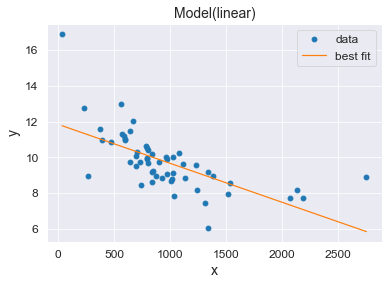

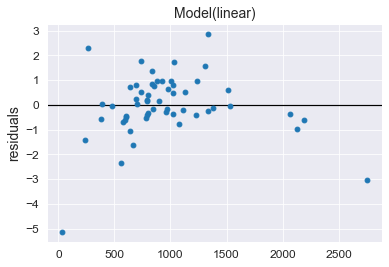

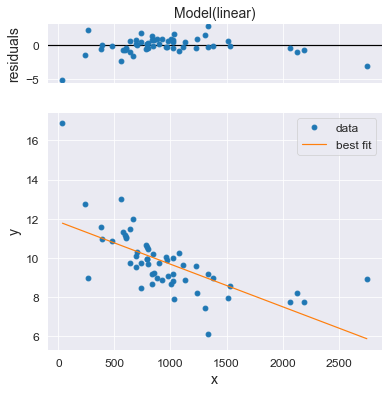

In [135]:
import lmfit
print('{:<35}{:^0}'.format("Текущая версия модуля lmfit: ", lmfit.__version__), '\n')

# Preparation of input data
dataset_sort_df = dataset_df.loc[:, ['X1', 'Y']].sort_values(by=['X1'])
#display(dataset_sort_df)
Y_sort = np.array(dataset_sort_df['Y'])
#print(Y_sort, type(Y_sort), len(Y_sort))
X_sort = np.array(dataset_sort_df['X1'])
#print(X_sort, type(X_sort), len(X_sort))

# LINEAR MODEL
func_name = 'linear'
print(f'{func_name.upper()} MODEL: {formulas_dict[func_name]}')
func = models_dict[func_name]
p0 = p0_dict[func_name]
model = lmfit.Model(func, independent_vars=['x'], name=func_name)
result = model.fit(Y_sort, x=X_sort, b0=p0[0], b1=p0[1])
print(result.fit_report())
result.plot_fit()
plt.show()
result.plot_residuals()
plt.show()
result.plot()
plt.show()


#### <u>***Пример 2 - аппроксимация с использованием интерфейса Model и объекта класса Parameter, расчетом доверительных интервалов***</u>

Рассмотрим аппроксимацию с более широким использованием возможностей библиотеки **lmfit** на примере степенной зависимости:
* используем объект класса **Parameter** для задания свойств параметров модели;
* выведем дополнительные отчеты;
* выполним расчет доверительного интервала (подробнее см. https://lmfit.github.io/lmfit-py/confidence.html#lmfit.conf_interval, https://lmfit.github.io/lmfit-py/examples/example_confidence_interval.html#sphx-glr-examples-example-confidence-interval-py, https://lmfit.github.io/lmfit-py/examples/documentation/confidence_advanced.html#sphx-glr-examples-documentation-confidence-advanced-py)).

Пояснения к расчету:
1. Исходные данные также должны быть отсортированы по возрастанию переменной **X1**.
2. Также с помощью **lmfit.Model** создаем модель.
3. С помощью **model.make_params** задаем свойства параметров модели (в этом примере мы просто задаем начальные значения параметров, не затрагивая прочие атрибуты - минимальные и максимальные значения, алгебраические ограничения и т.д.).
4. Также с помощью **model.fit** выполняем аппроксимацию (нахождение параметров), при этом расширим набор используемых настроек - добавим **method** и **nan_policy** (правда, значения установим по умолчанию **leastsq** и **raise**).
5. Также с помощью **result.fit_report** выводим отчет с результатами, при этом установим ограничение на коэффициент корреляции между параметрами (**min_correl=0.2**).
6. С помощью **result.params.pretty_print()** выведем отчет о параметрах модели.
7. С помощью **result.ci_report()** выведем отчет о границах доверительных интервалов для параметров модели.
8. С помощью **result.eval_components** и **result.eval** выведем расчетные значения модели: в первом случае - в виде словаря (dict), во-втором случае - в виде массива (numpy.ndarray).
9. С помощью **result.eval_uncertainty** выведем ширину доверительного интервала для расчетных значений.
10. По аналогии с предыдущим примером выведем графики **result.plot_fit()** и **result.plot_residuals()** с настройкой их атрибутов (размер окна, подписи осей и пр.).
11. Дополнительно выведем графики двух видов:
    * на первом графике будут отображаться фактические данные (**data**), расчетные данные по модели аппроксимации (**best fit**) и также доверительный интервал шириной $3\sigma$;
    * на втором графике будет отображаться остатки (**residuals**).

<u>Замечание касательно расчета доверительных интервалов</u>: для отдельных моделей **lmfit** может выдавать ошибку **Cannot determine Confidence Intervals without sensible uncertainty estimates**, в этом случае необходимо установить пакет **numdifftools** (https://pypi.org/project/numdifftools/).
   

   

POWER MODEL: y = b0*x^b1
result.fit_report:
[[Model]]
    Model(power)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 55
    # variables        = 2
    chi-square         = 49.8796865
    reduced chi-square = 0.94112616
    Akaike info crit   = -1.37456420
    Bayesian info crit = 2.64010217
    R-squared          = 0.65884224
[[Variables]]
    b0:  33.4032965 +/- 3.45275807 (10.34%) (init = 0)
    b1: -0.18409814 +/- 0.01572801 (8.54%) (init = 0)
[[Correlations]] (unreported correlations are < 0.200)
    C(b0, b1) = -0.992

result.params.pretty_print():
Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
b0      33.4     -inf      inf    3.453     True     None     None
b1   -0.1841     -inf      inf  0.01573     True     None     None


result.ci_report:
       99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 b0:  -9.61176  -6.50967  -3.33032  33.40330  +3.57568  +7.51972 +11.99711
 b1:  -

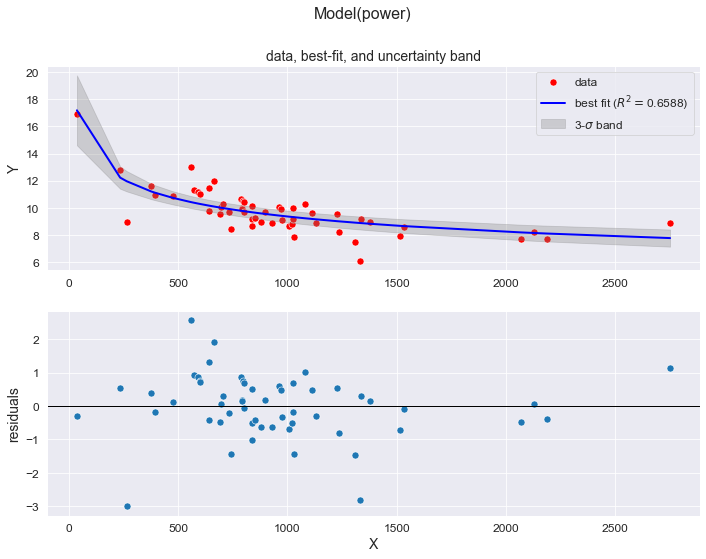

In [136]:
# POWER MODEL
func_name = 'power'
print(f'{func_name.upper()} MODEL: {formulas_dict[func_name]}')

# define objective function
func = models_dict[func_name]

# initial values
p0 = p0_dict[func_name]

# create a Model
model = lmfit.Model(func,   
                    independent_vars=['x'],
                    name=func_name)

# create a set of Parameters
params = model.make_params(b0=p0[0],
                           b1=p0[1])

# calculations
result = model.fit(Y_sort, params, x=X_sort,
                   method='leastsq',
                   nan_policy='raise')

# report of the fitting results (https://lmfit.github.io/lmfit-py/model.html#lmfit.model.ModelResult.fit_report)
print(f'result.fit_report:\n{result.fit_report(min_correl=0.2)}\n')

# report of parameters data (https://lmfit.github.io/lmfit-py/parameters.html#lmfit.parameter.Parameters.pretty_print)
print('result.params.pretty_print():')
result.params.pretty_print()
print('\n')

# report of the confidence intervals (https://lmfit.github.io/lmfit-py/confidence.html#lmfit.ci_report)
print(f'result.ci_report:\n{result.ci_report()}\n')

# evaluate each component of a composite model function (https://lmfit.github.io/lmfit-py/model.html#lmfit.model.ModelResult.eval_components)
comps = result.eval_components(x=X_sort)
print(f'result.eval_components = \n{comps}\n')

# evaluate the uncertainty of the model function (https://lmfit.github.io/lmfit-py/model.html#lmfit.model.ModelResult.eval_uncertainty)
dely = result.eval_uncertainty(sigma=3)
print(f'result.eval_uncertainty(sigma=3) = \n{dely}\n')

# graphic (data, best-fit, uncertainty band and residuals)
fig, axes = plt.subplots(2, 1, figsize=(297/INCH, 210/INCH))
fig.suptitle(f'Model({func_name})', fontsize=16)

#label = func_name + ' '+ r'$(R^2 = $' + f'{R2}' + ', ' + f'RMSE = {RMSE}' + ', ' + f'MAE = {MAE}' + ', ' + f'MSPE = {MSPE}' + ', ' + f'MAPE = {MAPE})'
axes[0].set_title('data, best-fit, and uncertainty band')
sns.scatterplot(x=X_sort, y=Y_sort, label='data', s=50, color='red', ax=axes[0])
R2 = round(result.rsquared, DecPlace)
sns.lineplot(x=X_sort, y=result.best_fit, color='blue', linewidth=2, legend=True, label='best fit (' + r'$R^2 = $' + f'{R2})', ax=axes[0])
axes[0].fill_between(X_sort, result.best_fit-dely, result.best_fit+dely, color="grey", alpha=0.3, label=r'3-$\sigma$ band')
axes[0].legend()
axes[0].set_ylabel('Y')
#axes[0].set_xlim(X1_min_graph, X1_max_graph)
#axes[0].set_ylim(Y_min_graph, Y_max_graph)

sns.scatterplot(x=X_sort, y=-result.residual, ax=axes[1], s=50)
axes[1].axhline(y = 0, color = 'k', linewidth = 1)
axes[1].set_xlabel('X')
axes[1].set_ylabel('residuals')
#axes[1].set_xlim(X1_min_graph, X1_max_graph)
#axes[1].set_ylim(Y_min_graph, Y_max_graph)

plt.show()

#### <u>***Пример 3 - аппроксимация c использованием функции minimize***</u>

Про функцию **minimize** подробнее см. https://lmfit.github.io/lmfit-py/fitting.html#the-minimize-function.

In [137]:
# POWER MODEL
func_name = 'power'
print(f'{func_name.upper()} MODEL: {formulas_dict[func_name]}')

# define objective function
func = models_dict[func_name]

# initial values
p0 = p0_dict[func_name]

# create a set of Parameters
params = lmfit.Parameters()
params.add('b0', value=p0[0], min=-inf, max=inf)
params.add('b1', value=p0[1], min=-inf, max=inf)

# function for calculating residuals
residual_func = lambda params, x, ydata: func(x, params['b0'].value, params['b1'].value) - ydata

# calculations
result = lmfit.minimize(residual_func, params, args=(X_sort, Y_sort))
lmfit.report_fit(result)
#print(lmfit.fit_report(result))    # other type of output
best_fit = Y_sort + result.residual

POWER MODEL: y = b0*x^b1
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 55
    # variables        = 2
    chi-square         = 49.8796865
    reduced chi-square = 0.94112616
    Akaike info crit   = -1.37456420
    Bayesian info crit = 2.64010217
[[Variables]]
    b0:  33.4032965 +/- 3.45275807 (10.34%) (init = 0)
    b1: -0.18409814 +/- 0.01572801 (8.54%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(b0, b1) = -0.992


#### <u>***Пример 4 - аппроксимация c использованием объекта класса Minimazer***</u>

Про класс **Minimazer** подробнее см. https://lmfit.github.io/lmfit-py/fitting.html#using-the-minimizer-class.

POWER MODEL: y = b0*x^b1
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 55
    # variables        = 2
    chi-square         = 49.8796865
    reduced chi-square = 0.94112616
    Akaike info crit   = -1.37456420
    Bayesian info crit = 2.64010217
[[Variables]]
    b0:  33.4032965 +/- 3.45275807 (10.34%) (init = 0)
    b1: -0.18409814 +/- 0.01572801 (8.54%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(b0, b1) = -0.992

report_ci(ci):
       99.73%    _BEST_    99.73%
 b0:  -9.61177  33.40330 +11.99711
 b1:  -0.04701  -0.18410  +0.05128


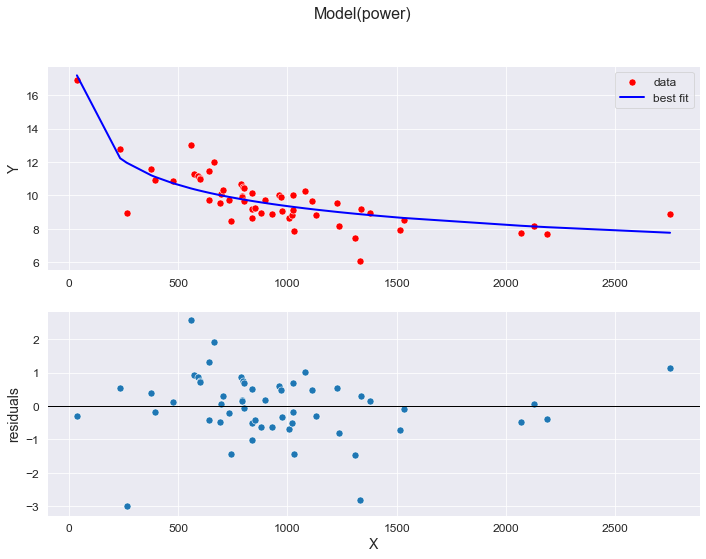

In [138]:
# POWER MODEL
func_name = 'power'
print(f'{func_name.upper()} MODEL: {formulas_dict[func_name]}')

# define objective function
func = models_dict[func_name]

# initial values
p0 = p0_dict[func_name]

# create a set of Parameters
params = lmfit.Parameters()
params.add('b0', value=p0[0], min=-inf, max=inf)
params.add('b1', value=p0[1], min=-inf, max=inf)

# function for calculating residuals
residual_func = lambda params, x, ydata: func(x, params['b0'].value, params['b1'].value) - ydata

# create Minimizer
minner = lmfit.Minimizer(residual_func, params, fcn_args=(X_sort, Y_sort), nan_policy='omit')

# calculations
result = minner.minimize()
#print(f'\nfirst solve with {method_1.upper()} algorithm:')
lmfit.report_fit(result)
#print(lmfit.fit_report(result))    # other type of output
best_fit = Y_sort + result.residual
#print(best_fit)

# calculate the confidence intervals for parameters
ci, tr = lmfit.conf_interval(minner, result, sigmas=[3], trace=True)
print('\nreport_ci(ci):')
lmfit.report_ci(ci)

# graphic (data, best-fit, and residuals)
fig, axes = plt.subplots(2, 1, figsize=(297/INCH, 210/INCH))
fig.suptitle(f'Model({func_name})', fontsize=16)

sns.scatterplot(x=X_sort, y=Y_sort, label='data', s=50, color='red', ax=axes[0])
sns.lineplot(x=X_sort, y=best_fit, color='blue', linewidth=2, legend=True, label='best fit', ax=axes[0])
axes[0].set_ylabel('Y')
#axes[0].set_xlim(X1_min_graph, X1_max_graph)
#axes[0].set_ylim(Y_min_graph, Y_max_graph)

sns.scatterplot(x=X_sort, y=-result.residual, ax=axes[1], s=50)
axes[1].axhline(y = 0, color = 'k', linewidth = 1)
axes[1].set_xlabel('X')
axes[1].set_ylabel('residuals')
#axes[1].set_xlim(X1_min_graph, X1_max_graph)
#axes[1].set_ylim(Y_min_graph, Y_max_graph)

plt.show()

#### <u>***Пример 5 - аппроксимация с заданием начальных значений (initial values)***</u>

Некоторые модели при аппроксимации требуют задания начальных значений - для успешной реализации алгоритма заданием нулей или единиц в качестве **p0** не обойтись. Рассмотрим аппроксимацию экспоненциальной модели I типа с заданием начальных условий, при этом воспользуемся возможностью библиотеки **lmfit** вывести на график зависимость с оптимальными параметрами (**best fit**) и зависимость с начальными параметрами (**init fit**) это наглядно демонстрирует, как улучшается модель в процессе поиска оптимальных параметров.

EXPONENTIAL TYPE 1 MODEL: y = b0*exp(b1^x)
p0 = [17.037879730518267, -0.00023560415890108336]
result.fit_report:
[[Model]]
    Model(exponential type 1)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data points      = 55
    # variables        = 2
    chi-square         = 75.1949111
    reduced chi-square = 1.41877191
    Akaike info crit   = 21.2012704
    Bayesian info crit = 25.2159368
    R-squared          = 0.48569589
[[Variables]]
    b0:  12.6241795 +/- 0.46994783 (3.72%) (init = 17.03788)
    b1: -2.7834e-04 +/- 3.9734e-05 (14.27%) (init = -0.0002356042)
[[Correlations]] (unreported correlations are < 0.200)
    C(b0, b1) = -0.899

result.ci_report:
       99.73%    95.45%    68.27%    _BEST_    68.27%    95.45%    99.73%
 b0:  -1.48083  -0.98324  -0.49401  12.62418  +0.51299  +1.06128  +1.66495
 b1:  -0.00014  -0.00009  -0.00004  -0.00028  +0.00004  +0.00009  +0.00013



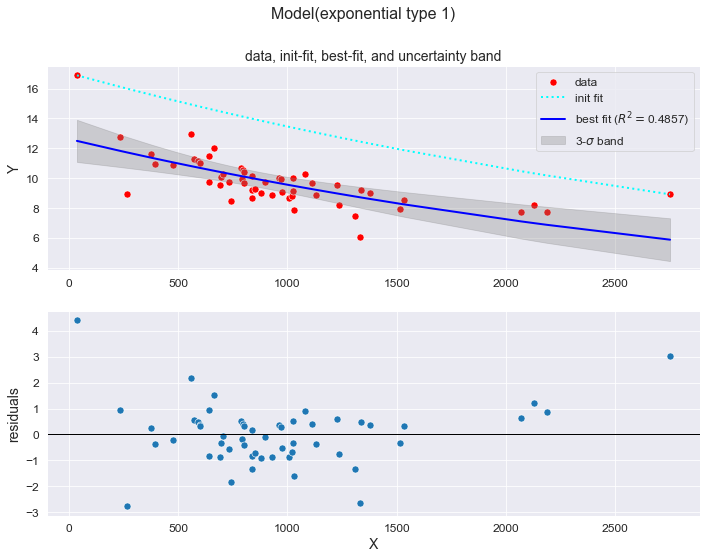

In [139]:
# EXPONENTIAL MODEL TYPE I: y = b0*exp(b1^x)
func_name = 'exponential type 1'
print(f'{func_name.upper()} MODEL: {formulas_dict[func_name]}')

# define objective function
func = models_dict[func_name]

# initial values
n = len(Y_sort)
(x1, x2, y1, y2) = (X_sort[0], X_sort[n-1], Y_sort[0], Y_sort[n-1])
p0_b0 = y2 * np.exp(np.log(y2/y1) * x2/(x1-x2))
p0_b1 = -np.log(y2/y1) / (x1-x2)
p0 = [p0_b0, p0_b1]
print(f'p0 = {p0}')

# create a Model
model = lmfit.Model(func,   
                    independent_vars=['x'],
                    name=func_name)

# create a set of Parameters
params = lmfit.Parameters()
params.add('b0', value=p0[0], min=-inf, max=inf)
params.add('b1', value=p0[1], min=-inf, max=inf)

# calculations
result = model.fit(Y_sort, params, x=X_sort,
                   method='leastsq',
                   nan_policy='raise')

# report of the fitting results (https://lmfit.github.io/lmfit-py/model.html#lmfit.model.ModelResult.fit_report)
print(f'result.fit_report:\n{result.fit_report(min_correl=0.2)}\n')

# report of the confidence intervals (https://lmfit.github.io/lmfit-py/confidence.html#lmfit.ci_report)
print(f'result.ci_report:\n{result.ci_report()}\n')

# evaluate the uncertainty of the model function (https://lmfit.github.io/lmfit-py/model.html#lmfit.model.ModelResult.eval_uncertainty)
dely = result.eval_uncertainty(sigma=3)

# graphic (data, best-fit, uncertainty band and residuals)
fig, axes = plt.subplots(2, 1, figsize=(297/INCH, 210/INCH))
fig.suptitle(f'Model({func_name})', fontsize=16)

axes[0].set_title('data, init-fit, best-fit, and uncertainty band')
sns.scatterplot(x=X_sort, y=Y_sort, label='data', s=50, color='red', ax=axes[0])
sns.lineplot(x=X_sort, y=result.init_fit, color='cyan', linewidth=2, linestyle='dotted', legend=True, label='init fit', ax=axes[0])
R2 = round(result.rsquared, DecPlace)
sns.lineplot(x=X_sort, y=result.best_fit, color='blue', linewidth=2, legend=True, label='best fit (' + r'$R^2 = $' + f'{R2})', ax=axes[0])
axes[0].fill_between(X_sort, result.best_fit-dely, result.best_fit+dely, color="grey", alpha=0.3, label=r'3-$\sigma$ band')
axes[0].legend()
axes[0].set_ylabel('Y')
#axes[0].set_xlim(X1_min_graph, X1_max_graph)
#axes[0].set_ylim(Y_min_graph, Y_max_graph)

sns.scatterplot(x=X_sort, y=-result.residual, ax=axes[1], s=50)
axes[1].axhline(y = 0, color = 'k', linewidth = 1)
axes[1].set_xlabel('X')
axes[1].set_ylabel('residuals')
#axes[1].set_xlim(X1_min_graph, X1_max_graph)
#axes[1].set_ylim(Y_min_graph, Y_max_graph)

plt.show()

#### <u>***Пример 6 - аппроксимация с использованием встроенных моделей библиотеки lmfit***</u>

Рассмотрим аппроксимацию с использованием встроенных моделей библиотеки **lmfit**. Набор этих моделей достаточно обширен (подробнее см. https://lmfit.github.io/lmfit-py/builtin_models.html, 
https://lmfit.github.io/lmfit-py/examples/documentation/model_uncertainty2.html#sphx-glr-examples-documentation-model-uncertainty2-py), при этом для представляют интерес следующие модели:
* линейная **LinearModel**;
* квадратическая **QuadraticModel**;
* полиномиальная **PolynomialModel** (мы рассмотрим случай m=3 - кубическую модель); 
* экспоненциальная **ExponentialModel**;
* степенная **PowerLawModel**.

При этом необходимо учитывать, что встроенные модели в библиотеке **lmfit** имеют свой формализованный вид и параметры, заданные в виде служебных слов, которые нужно учитывать в программном коде (так, например, параметры линейной модели имеют названия **slope** и **intercept**):

|Наименование      |Уравнение                         |Параметры и их названия в программном коде |Ссылка                                                                             |
|:----------------:|:--------------------------------:|:-----------------------------------------:|:---------------------------------------------------------------------------------:|
|LinearModel       |$f(x;m,b)=mx+b$                   |**slope** ($m$), **intercept** ($b$)       |https://lmfit.github.io/lmfit-py/builtin_models.html#lmfit.models.LinearModel      |
|QuadraticModel    |$f(x;a,b,c)=ax^2+bx+c$            |**a**, **b**, **c**                        |https://lmfit.github.io/lmfit-py/builtin_models.html#lmfit.models.QuadraticModel   |
|PolynomialModel   |$f(x;c_0,c_1...c_7)=\sum{c_ix^i}$ |**c0**...**c1**                            |https://lmfit.github.io/lmfit-py/builtin_models.html#lmfit.models.PolynomialModel  |
|ExponentialModel  |$f(x;A,\tau)=Ae^{-x/\tau}$        |**amplitude** ($A$), **decay** ($\tau$)    |https://lmfit.github.io/lmfit-py/builtin_models.html#lmfit.models.ExponentialModel |
|PowerLawModel     |$f(x;A,k)=Ax^k$                   |**amplitude** ($A$), **exponent** ($k$)    |https://lmfit.github.io/lmfit-py/builtin_models.html#lmfit.models.PowerLawModel    |

Для экспоненциальной модели **ExponentialModel** мы оценим начальные значения параметров с помощью метода **Model.guess** (https://lmfit.github.io/lmfit-py/model.html#model-class-methods).

LINEAR MODEL:
[[Model]]
    Model(linear, prefix='linear_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 55
    # variables        = 2
    chi-square         = 84.4203915
    reduced chi-square = 1.59283758
    Akaike info crit   = 27.5661686
    Bayesian info crit = 31.5808350
    R-squared          = 0.42259718
[[Variables]]
    linear_intercept:  11.8501350 +/- 0.37396000 (3.16%) (init = 0)
    linear_slope:     -0.00217603 +/- 3.4938e-04 (16.06%) (init = 0)
[[Correlations]] (unreported correlations are < 0.200)
    C(linear_intercept, linear_slope) = -0.890

QUADRATIC MODEL:
[[Model]]
    Model(parabolic, prefix='quadratic_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 55
    # variables        = 3
    chi-square         = 53.2610253
    reduced chi-square = 1.02425049
    Akaike info crit   = 4.23294056
    Bayesian info crit = 10.2549401
    R-squared          =

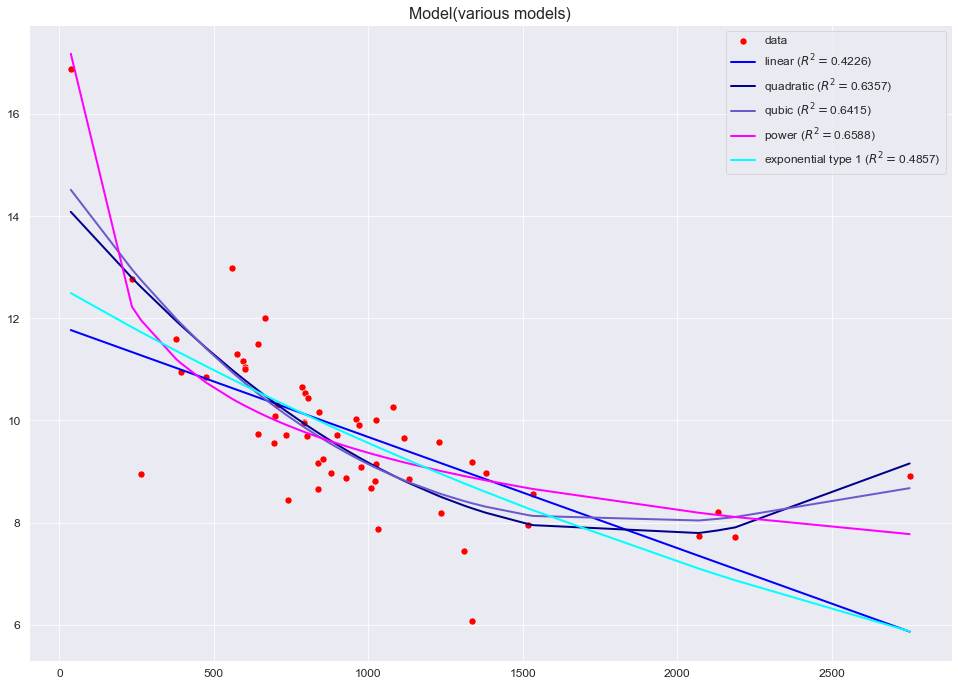

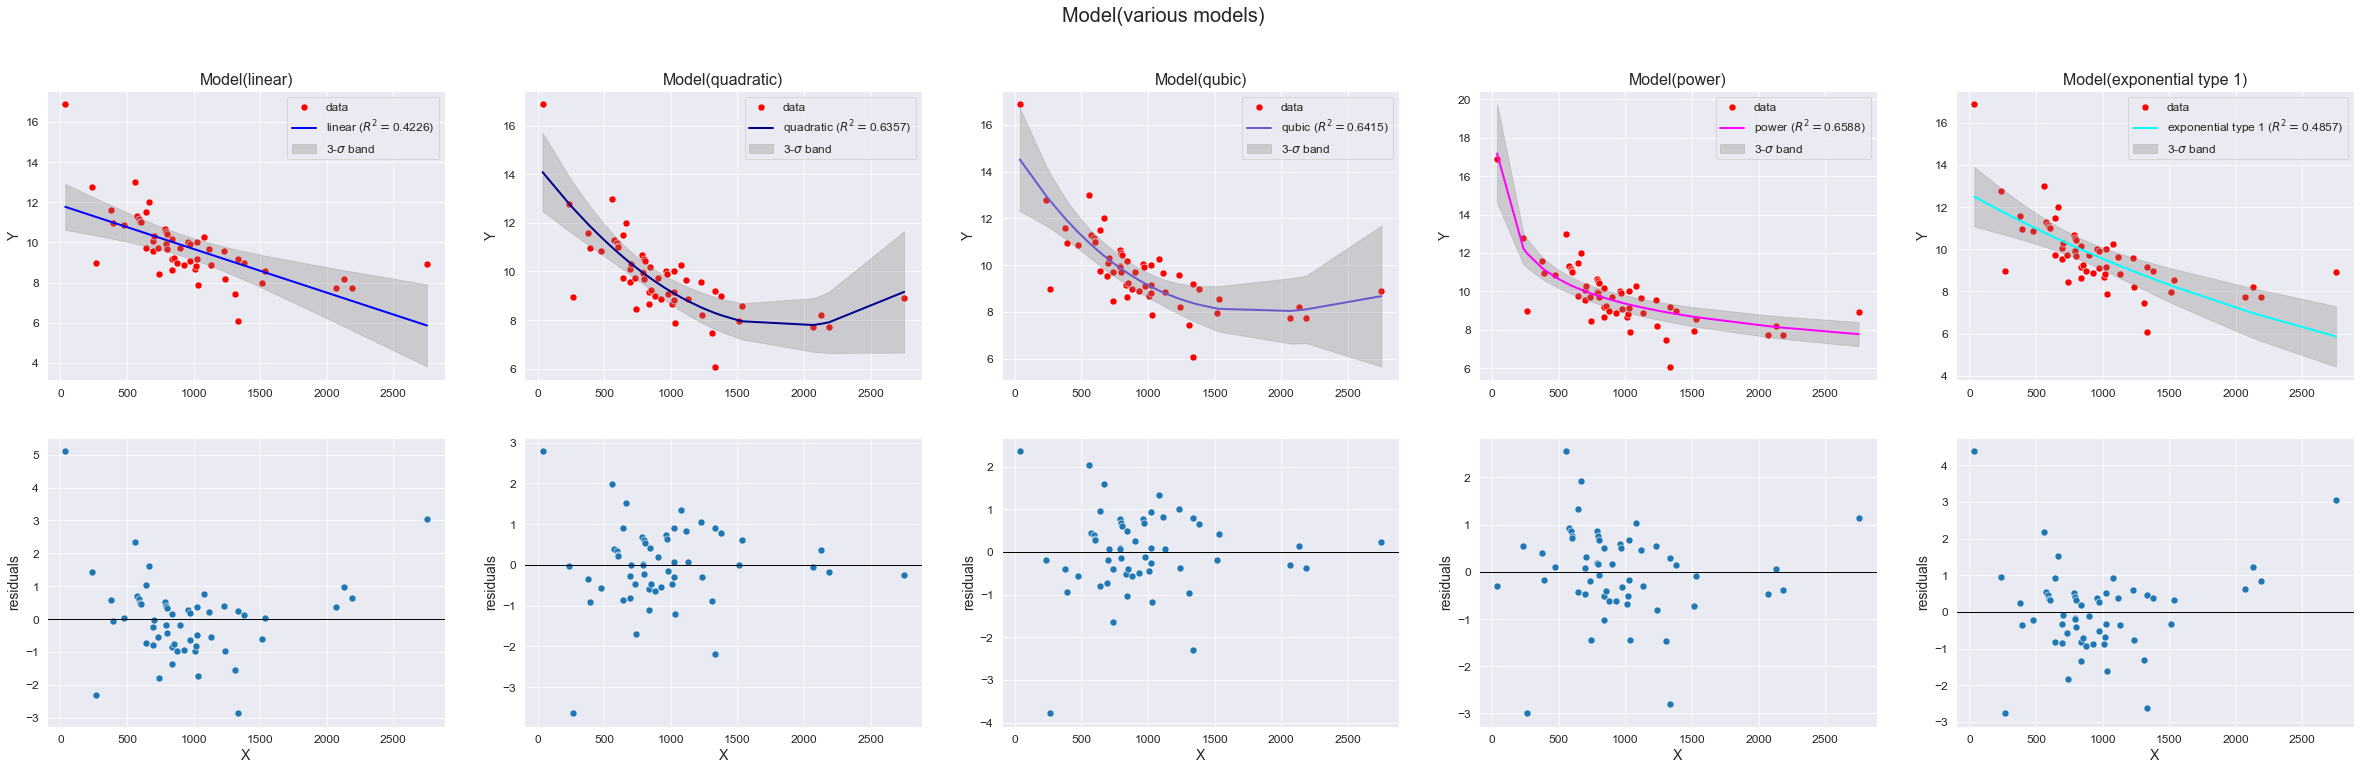

In [140]:
# list of model
model_list = ['linear', 'quadratic', 'qubic', 'power', 'exponential type 1']

# model reference
model_exponential_type_1 = lmfit.models.ExponentialModel(prefix='exponential_type_1_')
model_dict = {
        'linear':             lmfit.models.LinearModel(prefix='linear_'),
        'quadratic':          lmfit.models.QuadraticModel(prefix='quadratic_'),
        'qubic':              lmfit.models.PolynomialModel(degree=3, prefix='qubic_'),
        'power':              lmfit.models.PowerLawModel(prefix='power_'),
        'exponential type 1': model_exponential_type_1}

# create a set of Parameters
params_dict = dict()

params_linear = lmfit.Parameters()
params_linear.add('linear_intercept',    value = 0, min = -inf, max = inf)
params_linear.add('linear_slope',        value = 0, min = -inf, max = inf)
params_dict['linear'] = params_linear

params_quadratic = lmfit.Parameters()
params_quadratic.add('quadratic_a',    value = 0, min = -inf, max = inf)
params_quadratic.add('quadratic_b',    value = 0, min = -inf, max = inf)
params_quadratic.add('quadratic_c',    value = 0, min = -inf, max = inf)
params_dict['quadratic'] = params_quadratic

params_qubic = lmfit.Parameters()
params_qubic.add('qubic_c0',    value = 0, min = -inf, max = inf)
params_qubic.add('qubic_c1',    value = 0, min = -inf, max = inf)
params_qubic.add('qubic_c2',    value = 0, min = -inf, max = inf)
params_qubic.add('qubic_c3',    value = 0, min = -inf, max = inf)
params_dict['qubic'] = params_qubic

params_power = lmfit.Parameters()
params_power.add('power_amplitude',    value = 0, min = -inf, max = inf)
params_power.add('power_exponent',     value = 0, min = -inf, max = inf)
params_dict['power'] = params_power

params_exponential_type_1 = lmfit.Parameters()
#params_exponential_type_1.add('exponential_type_1_amplitude',    value = 0, min = -inf, max = inf)
#params_exponential_type_1.add('exponential_type_1_decay',        value = 0, min = -inf, max = inf)
pars_exponential_type_1 = model_exponential_type_1.guess(Y_sort, x=X_sort)
params_dict['exponential type 1'] = pars_exponential_type_1

# calculations
result_dict = dict()
for func_name in model_list:
    model = model_dict[func_name]
    result = model.fit(Y_sort, params_dict[func_name], x=X_sort)
    print(f'{func_name.upper()} MODEL:\n{result.fit_report(min_correl=0.2)}\n')
    result_dict[func_name] = result

# graphic 1 (various models)
fig, axes = plt.subplots(figsize=(420/INCH, 297/INCH))
#fig.suptitle(f'Model(various models)', fontsize=16)
axes.set_title('Model(various models)', fontsize=16)
sns.scatterplot(x=X_sort, y=Y_sort, label='data', s=50, color='red', ax=axes)
for func_name in model_list:
        result = result_dict[func_name]
        R2 = round(result.rsquared, DecPlace)
        label = func_name + ' (' + r'$R^2 = $' + f'{R2})'
        sns.lineplot(x=X_sort, y=result.best_fit, linewidth=2, color=color_dict[func_name], legend=True, label=label, ax=axes)    # the color_dict was defined earlier
plt.show()

# graphic 2 (various models)
number_models = len(model_list)
fig, axes = plt.subplots(2, number_models, figsize=(210/INCH*number_models, 297/INCH))
fig.suptitle('Model(various models)', fontsize=20)
for i, func_name in enumerate(model_list):
        ax1 = plt.subplot(2, number_models, i+1)
        ax2 = plt.subplot(2, number_models, i+1+number_models)
        ax1.set_title(f'Model({func_name})', fontsize=16)
        result = result_dict[func_name]
        dely = result.eval_uncertainty(sigma=3)
        sns.scatterplot(x=X_sort, y=Y_sort, label='data', s=50, color='red', ax=ax1)
        R2 = round(result.rsquared, DecPlace)
        label = func_name + ' (' + r'$R^2 = $' + f'{R2})'
        sns.lineplot(x=X_sort, y=result.best_fit, linewidth=2, color=color_dict[func_name], legend=True, label=label, ax=ax1)    # the color_dict was defined earlier
        ax1.fill_between(X_sort, result.best_fit-dely, result.best_fit+dely, color="grey", alpha=0.3, label=r'3-$\sigma$ band')
        ax1.legend()
        ax1.set_ylabel('Y')
        sns.scatterplot(x=X_sort, y=-result.residual, ax=ax2, s=50)
        ax2.axhline(y = 0, color = 'k', linewidth = 1)
        ax2.set_xlabel('X')
        ax2.set_ylabel('residuals')
plt.show()

#### <u>***Пример 7 - аппроксимация с использованием методов глобального поиска***</u>

Рассмотрим более сложный случай на примере **логистической зависимости I типа** $Y=\frac{b_0}{1+b_1\cdot e^{-b_2\cdot X}}$. Обычно аппроксимация подобных зависимостей требует более тщательного подхода по сравнению с разобранными ранее примерами - необходимо варьировать алгоритмы, предварительно оценивать начальные точки для приближения (методом трех точек и т.д.). В этом случае эффективными могут оказаться **методы глобального поиска**.

В рамках данного обзора у нас нет возможности сильно углубляться в данную тему, поэтому просто проиллюстрируем возможности **lmfit** - проведем аппроксимацию в два этапа:
1. Вначале оценим параметры зависимости алгоритмом **basinhopping** (см. https://en.wikipedia.org/wiki/Basin-hopping, https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.basinhopping.html, https://machinelearningmastery.com/basin-hopping-optimization-in-python/).
2. Проверим оценку параметров алгоритмом глобальной оптимизации по сетке **brute** (см. https://en.wikipedia.org/wiki/Brute-force_search, https://lmfit.github.io/lmfit-py/examples/example_brute.html).


LOGISTIC MODEL TYPE I: y = b0 / (1 + b1*np.exp(-b2*x))


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_13116\3449009825.py:1: RuntimeWarning: overflow encountered in exp
  logistic_type_1_func = lambda x, b0, b1, b2: b0 / (1 + b1*np.exp(-b2*x))
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_13116\3449009825.py:1: RuntimeWarning: overflow encountered in exp
  logistic_type_1_func = lambda x, b0, b1, b2: b0 / (1 + b1*np.exp(-b2*x))
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_13116\3449009825.py:1: RuntimeWarning: overflow encountered in exp
  logistic_type_1_func = lambda x, b0, b1, b2: b0 / (1 + b1*np.exp(-b2*x))
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_13116\3449009825.py:1: RuntimeWarning: overflow encountered in exp
  logistic_type_1_func = lambda x, b0, b1, b2: b0 / (1 + b1*np.exp(-b2*x))
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_13116\3449009825.py:1: RuntimeWarning: overflow encountered in exp
  logistic_type_1_func = lambda x, b0, b1, b2: b0 / (1 + b1*np.exp(-b2*x))
C:\Users\Пользователь\AppData\Local


first solve with BASINHOPPING algorithm:
[[Fit Statistics]]
    # fitting method   = basinhopping
    # function evals   = 17151
    # data points      = 55
    # variables        = 3
    chi-square         = 51.0205701
    reduced chi-square = 0.98116481
    Akaike info crit   = 1.86926363
    Bayesian info crit = 7.89126318
[[Variables]]
    b0:  7.71894599 +/- 0.45568750 (5.90%) (init = 0)
    b1: -0.53569219 +/- 0.03472152 (6.48%) (init = 0)
    b2:  0.00118050 +/- 2.6159e-04 (22.16%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(b0, b2) = 0.912
    C(b0, b1) = 0.550
    C(b1, b2) = 0.243

second solve with BRUTE algorithm using the BASINHOPPING solution as a starting point:
[[Fit Statistics]]
    # fitting method   = brute
    # function evals   = 28830
    # data points      = 55
    # variables        = 3
    chi-square         = 51.0205701
    reduced chi-square = 0.98116481
    Akaike info crit   = 1.86926363
    Bayesian info crit = 7.89126318
##  W

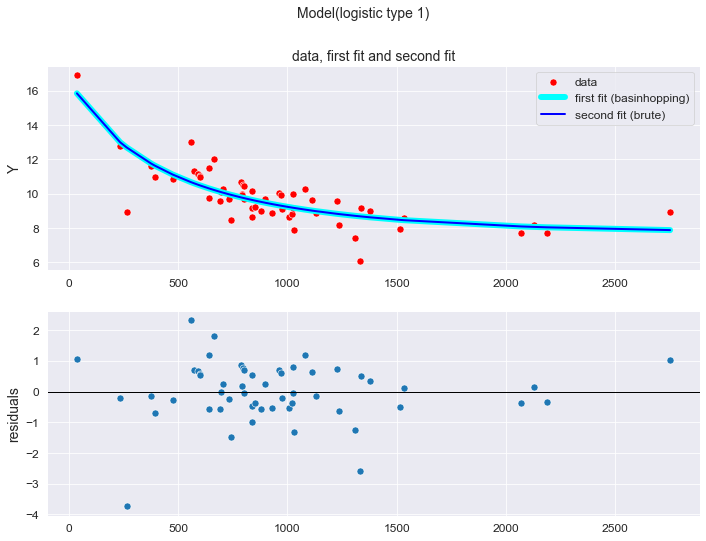

In [141]:
logistic_type_1_func = lambda x, b0, b1, b2: b0 / (1 + b1*np.exp(-b2*x))

# LOGISTIC MODEL TYPE I: y = b0 / (1 + b1*np.exp(-b2*x))
print('LOGISTIC MODEL TYPE I: y = b0 / (1 + b1*np.exp(-b2*x))')

# define objective function
func = logistic_type_1_func
func_name = 'logistic type 1'

# initial values
p0 = [0, 0, 0]

# create a set of Parameters
params = lmfit.Parameters()
params.add('b0', value=p0[0], min=-inf, max=inf, brute_step=0.01)
params.add('b1', value=p0[1], min=-inf, max=inf, brute_step=0.01)
params.add('b2', value=p0[2], min=-inf, max=inf, brute_step=0.001)

# function for calculating residuals
residual_func = lambda params, x, ydata: func(x, params['b0'].value,
                                                 params['b1'].value,
                                                 params['b2'].value
                                                 ) - ydata

# create Minimizer
minner = lmfit.Minimizer(residual_func, params, fcn_args=(X_sort, Y_sort), nan_policy='omit')

# first solve with basinhopping algorithm
method_1 = 'basinhopping'
result_1 = minner.minimize(method=method_1)
print(f'\nfirst solve with {method_1.upper()} algorithm:')
lmfit.report_fit(result_1)
#print(lmfit.fit_report(result_1))
best_fit_1 = Y_sort + result_1.residual
#print(best_fit_1)

# then solve with brute algorithm using the basinhopping solution as a starting point
method_2 = 'brute'
result_2 = minner.minimize(method=method_2,
                           params=result_1.params,
                           Ns=30,
                           keep=30)
print(f'\nsecond solve with {method_2.upper()} algorithm using the {method_1.upper()} solution as a starting point:')
#lmfit.report_fit(result_2)
print(lmfit.fit_report(result_2))
best_fit_2 = Y_sort + result_2.residual
#print(best_fit_2)

# calculate the confidence intervals for parameters
ci, tr = lmfit.conf_interval(minner, result_2, sigmas=[3], trace=True)
lmfit.report_ci(ci)
#print(tr)

# graphics
fig, axes = plt.subplots(2, 1, figsize=(297/INCH, 210/INCH))
fig.suptitle(f'Model({func_name})', fontsize=14)

axes[0].set_title('data, first fit and second fit')
sns.scatterplot(x=X_sort, y=Y_sort, label='data', s=50, color='red', ax=axes[0])
sns.lineplot(x=X_sort, y=best_fit_1, color='cyan', linewidth=6, legend=True, label=f'first fit ({method_1})', ax=axes[0])
sns.lineplot(x=X_sort, y=best_fit_2, color='blue', linewidth=2, legend=True, label=f'second fit ({method_2})', ax=axes[0])
axes[0].set_ylabel('Y')

sns.scatterplot(x=X_sort, y=-result_2.residual, ax=axes[1], s=50)
axes[1].axhline(y = 0, color = 'k', linewidth = 1)
axes[1].set_ylabel('residuals')

plt.show()

#### <u>***Пример 8 - обнаружение выбросов (outlier detection) при аппроксимации***</u>

Влияние выбросов на результаты аппроксимации может быть весьма существенным и игнорировать это влияние нельзя. Не будем сейчас сильно углубляться в этот вопрос, это предмет для отдельного рассмотрения, а просто проиллюстрируем прием выявления выбросов **методом исключения** (см. https://lmfit.github.io/lmfit-py/examples/example_detect_outliers.html#sphx-glr-examples-example-detect-outliers-py). Этот метод очень прост и заключается в следующем: будем последовательно исключать точки $(x_i, y_i)$ из набора исходных данных, строить модель и анализировать, как влияет исключение точки на результат аппроксимации.

В качестве исходных данных рассмотрим зависимость расхода топлива (FuelFlow) от среднемесячной температуры (Temperature) из нашего датасета:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


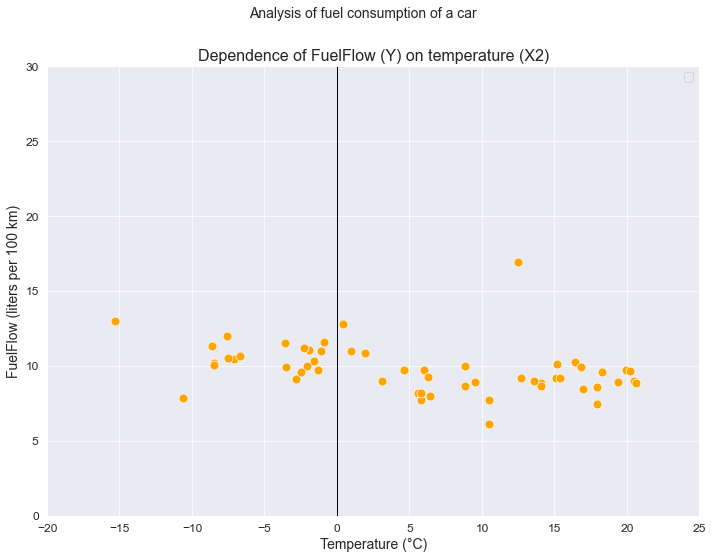

In [142]:
graph_scatterplot_sns(
    X2, Y,
    Xmin=X2_min_graph, Xmax=X2_max_graph,
    Ymin=Y_min_graph, Ymax=Y_max_graph,
    color='orange',
    title_figure=Title_String, title_figure_fontsize=14,
    title_axes='Dependence of FuelFlow (Y) on temperature (X2)', title_axes_fontsize=16,
    x_label=Variable_Name_X2,
    y_label=Variable_Name_Y,
    label_fontsize=14, tick_fontsize=12,
    label_legend='', label_legend_fontsize=12,
    s=80,
    #graph_size=(297/INCH, 210/INCH)
    )

Подготовим исходные данные:

In [143]:
# Preparation of input data
dataset_sort_df = dataset_df.loc[:, ['X2', 'Y']].sort_values(by=['X2'])
display(dataset_sort_df.describe())

Y_sort = np.array(dataset_sort_df['Y'])
X_sort = np.array(dataset_sort_df['X2'])

,X2,Y
count,55.0000,55.0000
mean,5.6109,9.7762
std,9.8651,1.6455
min,-15.3000,6.0800
25%,-2.2000,8.8650
50%,5.8000,9.6900
75%,14.6000,10.4800
max,20.6000,16.8900


Построим линейную модель:

LINEAR MODEL: y = b0 + b1*x
result.fit_report:
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 55
    # variables        = 2
    chi-square         = 126.256130
    reduced chi-square = 2.38219113
    Akaike info crit   = 49.7038688
    Bayesian info crit = 53.7185352
    R-squared          = 0.13645691
[[Variables]]
    b0:  10.1218956 +/- 0.23996519 (2.37%) (init = 0)
    b1: -0.06161458 +/- 0.02129069 (34.55%) (init = 0)
[[Correlations]] (unreported correlations are < 0.200)
    C(b0, b1) = -0.498



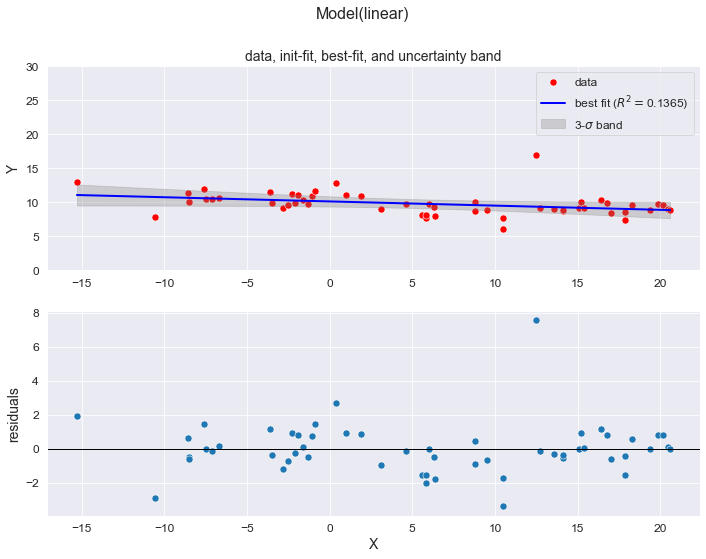

In [144]:
# LINEAR MODEL
func_name = 'linear'
print(f'{func_name.upper()} MODEL: {formulas_dict[func_name]}')

func = models_dict[func_name]
p0 = p0_dict[func_name]

model = lmfit.Model(func,   
                    independent_vars=['x'],
                    name=func_name)

params = lmfit.Parameters()
params.add('b0', value=p0[0], min=-inf, max=inf)
params.add('b1', value=p0[1], min=-inf, max=inf)

result = model.fit(Y_sort, params, x=X_sort,
                   method='leastsq',
                   nan_policy='raise')

print(f'result.fit_report:\n{result.fit_report(min_correl=0.2)}\n')
dely = result.eval_uncertainty(sigma=3)

# graphic (data, best-fit, uncertainty band and residuals)
fig, axes = plt.subplots(2, 1, figsize=(297/INCH, 210/INCH))
fig.suptitle(f'Model({func_name})', fontsize=16)

axes[0].set_title('data, init-fit, best-fit, and uncertainty band')
sns.scatterplot(x=X_sort, y=Y_sort, label='data', s=50, color='red', ax=axes[0])
R2 = round(result.rsquared, DecPlace)
sns.lineplot(x=X_sort, y=result.best_fit, color='blue', linewidth=2, legend=True, label='best fit (' + r'$R^2 = $' + f'{R2})', ax=axes[0])
axes[0].fill_between(X_sort, result.best_fit-dely, result.best_fit+dely, color="grey", alpha=0.3, label=r'3-$\sigma$ band')
axes[0].legend()
axes[0].set_ylabel('Y')
#axes[0].set_xlim(X1_min_graph, X1_max_graph)
axes[0].set_ylim(Y_min_graph, Y_max_graph)

sns.scatterplot(x=X_sort, y=-result.residual, ax=axes[1], s=50)
axes[1].axhline(y = 0, color = 'k', linewidth = 1)
axes[1].set_xlabel('X')
axes[1].set_ylabel('residuals')
#axes[1].set_xlim(X1_min_graph, X1_max_graph)
#axes[1].set_ylim(Y_min_graph, Y_max_graph)

plt.show()

График влияния на метрику качества аппроксимации - **reduced chi-square** ${\chi}_y^2 = \frac{\chi^2}{N-N_{varys}}$:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


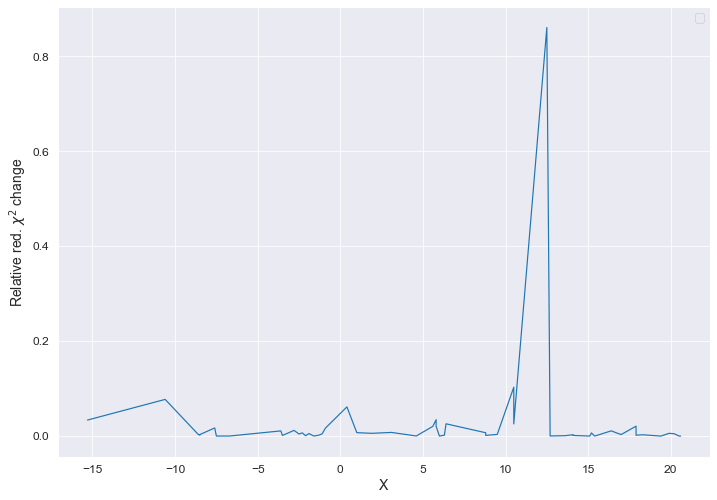

In [145]:
from collections import defaultdict

best_vals = defaultdict(lambda: np.zeros(X_sort.size))
stderrs = defaultdict(lambda: np.zeros(X_sort.size))
chi_sq = np.zeros_like(X_sort)

for i in range(X_sort.size):
    idx2 = np.arange(0, X_sort.size)
    idx2 = np.delete(idx2, i)
    tmp_x = X_sort[idx2]
    tmp = model.fit(Y_sort[idx2], x=tmp_x, b0=result.params['b0'], b1=result.params['b1'])
    
    chi_sq[i] = tmp.chisqr
    for p in tmp.params:
        tpar = tmp.params[p]
        best_vals[p][i] = tpar.value
        stderrs[p][i] = (tpar.stderr / result.params[p].stderr)

fig, ax = plt.subplots(figsize=(297/INCH, 210/INCH))
ax.plot(X_sort, (result.chisqr - chi_sq) / chi_sq)
ax.set_ylabel(r'Relative red. $\chi^2$ change')
ax.set_xlabel('X')
ax.legend()
plt.show()


График влияния на значения параметров $b_0$, $b_1$ и их ошибки:

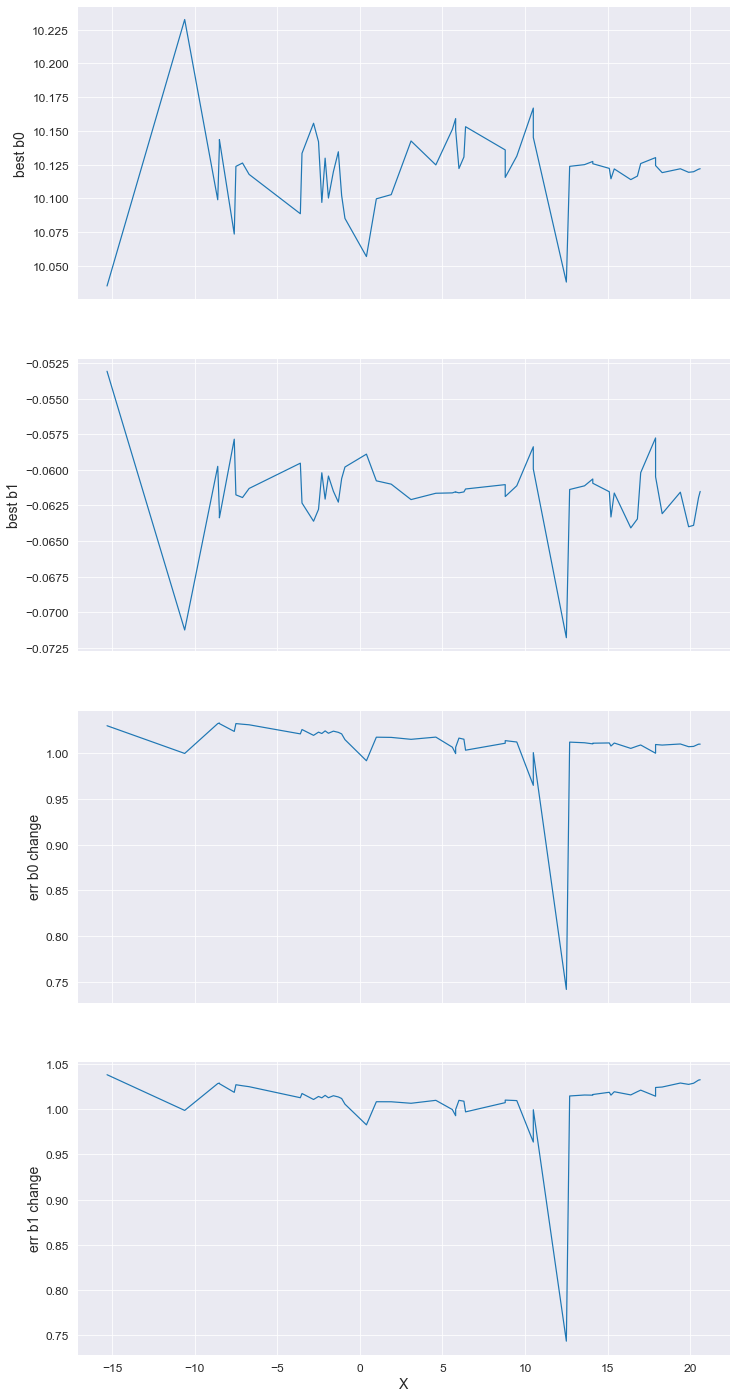

In [146]:
fig, axs = plt.subplots(4, figsize=(297/INCH, 210/INCH*3), sharex='col')
axs[0].plot(X_sort, best_vals['b0'])
axs[0].set_ylabel('best b0')

axs[1].plot(X_sort, best_vals['b1'])
axs[1].set_ylabel('best b1')

axs[2].plot(X_sort, stderrs['b0'])
axs[2].set_ylabel('err b0 change')

axs[3].plot(X_sort, stderrs['b1'])
axs[3].set_ylabel('err b1 change')

axs[3].set_xlabel('X')
plt.show()

Видим, что выброс $y$ в интервале $x\in(10; 15)$ очень хорошо заметен на всех графиках.

Наконец, исключим выброс и построим линейную модель по очищенным данным:

In [147]:
mask = dataset_sort_df['Y'] < 15
dataset_sort_df_clear = dataset_sort_df[mask]
display(dataset_sort_df_clear.describe())

X_sort_clear = np.array(dataset_sort_df_clear['X2'])
Y_sort_clear = np.array(dataset_sort_df_clear['Y'])

,X2,Y
count,54.0000,54.0000
mean,5.4833,9.6444
std,9.9118,1.3365
min,-15.3000,6.0800
25%,-2.2500,8.8575
50%,5.8000,9.6700
75%,14.8500,10.3975
max,20.6000,12.9900


LINEAR MODEL: y = b0 + b1*x
result.fit_report:
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 54
    # variables        = 2
    chi-square         = 67.8407274
    reduced chi-square = 1.30462937
    Akaike info crit   = 16.3216480
    Bayesian info crit = 20.2996161
    R-squared          = 0.28334888
[[Variables]]
    b0:  10.0379989 +/- 0.17802593 (1.77%) (init = 0)
    b1: -0.07177285 +/- 0.01582893 (22.05%) (init = 0)
[[Correlations]] (unreported correlations are < 0.200)
    C(b0, b1) = -0.488



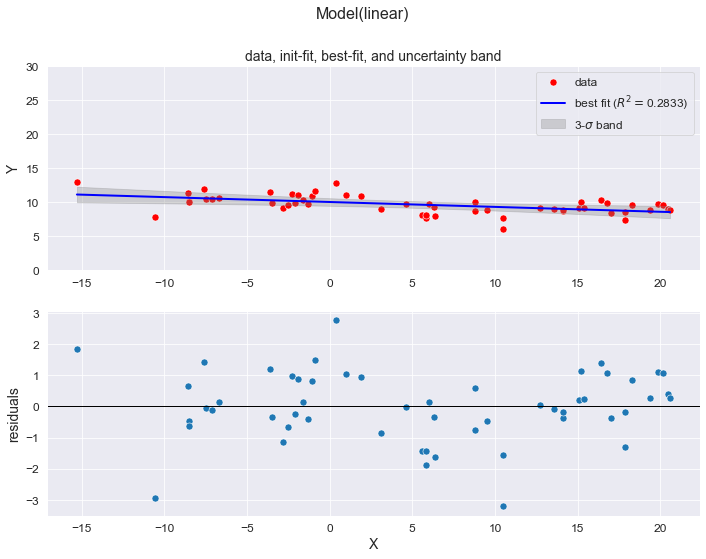

In [148]:
# LINEAR MODEL
func_name = 'linear'
print(f'{func_name.upper()} MODEL: {formulas_dict[func_name]}')

func = models_dict[func_name]
p0 = p0_dict[func_name]

model = lmfit.Model(func,   
                    independent_vars=['x'],
                    name=func_name)

params = lmfit.Parameters()
params.add('b0', value=p0[0], min=-inf, max=inf)
params.add('b1', value=p0[1], min=-inf, max=inf)

result = model.fit(Y_sort_clear, params, x=X_sort_clear,
                   method='leastsq',
                   nan_policy='raise')

print(f'result.fit_report:\n{result.fit_report(min_correl=0.2)}\n')
dely = result.eval_uncertainty(sigma=3)

# graphic (data, best-fit, uncertainty band and residuals)
fig, axes = plt.subplots(2, 1, figsize=(297/INCH, 210/INCH))
fig.suptitle(f'Model({func_name})', fontsize=16)

axes[0].set_title('data, init-fit, best-fit, and uncertainty band')
sns.scatterplot(x=X_sort_clear, y=Y_sort_clear, label='data', s=50, color='red', ax=axes[0])
R2 = round(result.rsquared, DecPlace)
sns.lineplot(x=X_sort_clear, y=result.best_fit, color='blue', linewidth=2, legend=True, label='best fit (' + r'$R^2 = $' + f'{R2})', ax=axes[0])
axes[0].fill_between(X_sort_clear, result.best_fit-dely, result.best_fit+dely, color="grey", alpha=0.3, label=r'3-$\sigma$ band')
axes[0].legend()
axes[0].set_ylabel('Y')
#axes[0].set_xlim(X1_min_graph, X1_max_graph)
axes[0].set_ylim(Y_min_graph, Y_max_graph)

sns.scatterplot(x=X_sort_clear, y=-result.residual, ax=axes[1], s=50)
axes[1].axhline(y = 0, color = 'k', linewidth = 1)
axes[1].set_xlabel('X')
axes[1].set_ylabel('residuals')
#axes[1].set_xlim(X1_min_graph, X1_max_graph)
#axes[1].set_ylim(Y_min_graph, Y_max_graph)

plt.show()

Видим, что исключение выброса позволило улучшить качество аппроксимации с $R^2 = 0.1365$ до $R^2 = 0.2833$.

### <center> <u>***Сравнительный анализ инструментов аппроксимации***</u>

Очевидно, что библиотека **lmfit** является наиболее совершенным инструментом аппроксимации в **python**, но и в то же время - наиболее сложным в освоении. Для более простых задач вполне может использоваться **scipy.optimize.curve_fit**.

Про быстродействие различных инструментов аппроксимации - см., например, https://mmas.github.io/least-squares-fitting-numpy-scipy.

В общем, каждый исследователь вправе сам выбирать инструменты для решения своих задач.

### <center> <font size="6"> <u>***СОЗДАНИЕ ПОЛЬЗОВАТЕЛЬСКОЙ ФУНКЦИИ ДЛЯ АППРОКСИМАЦИИ ЗАВИСИМОСТЕЙ***</u>

Создадим пользовательскую функцию **simple_approximation**, которая позволит выполнять простую аппроксимацию зависимостей (по аналогии с тем, как это реализовано в MS Excel), а именно:
* работать с наиболее распространенными моделями аппроксимации (линейной, квадратической, кубической, степенной, экспоненциальной, логарифмической, гиперболической);
* выполнять визуализацию, в том числе нескольких моделей на одном графике;
* выводить на графике уравнение моделей;
* выводить на графике основные метрики качества моделей ($R^2$, $MSPE$, $MAPE$);
* выводить числовые значения параметров моделей и метрик качества в виде DataFrame;
* выводить значения $Y$, рассчитанные по моделям, в виде DataFrame.

Разумеется, данная функция не претендует на абсолютную полноту, она предназначена только лишь для облегчения предварительных исследований. В случае необходимости расширить набор моделей и/или выводимых данных, любой исследователь сможет получить необходимый результат по аналогии с тем, как это было продемонстрировано в примерах расчетов выше.

Функция **simple_approximation** имеет следующие параметры:
* **X_in**, **Y_in** - исходные значения переменных $X$ и $Y$;
* **models_list_in** - список моделей для аппроксимации (например, полный перечень **models_list = ['linear', 'quadratic', 'qubic', 'power', 'exponential', 'logarithmic', 'hyperbolic']**);
* **p0_dict_in=None** - словарь (dict) с начальными значениями параметров (по умолчанию равны 1);
* **Xmin**, **Xmax**, **Ymin**, **Ymax** - границы значений для построения графиков;
* **nx_in=100** - число точек, на которое разбивается область значений переменной $X$ для построения графиков;
* **DecPlace=4** - точность (число знаков после запятой) выводимых значений параметров и метрик качества моделей;
* **result_table=False**, **value_table_calc=False**, **value_table_graph=False** - выводить или нет (True/False) DataFrame с параметрами моделей и метриками качества, с расчетными значениями переменной $Y$, с расчетными значениями переменной $Y$ для графиков;
* **title_figure=None**, **title_figure_fontsize=16**, **title_axes=None**, **title_axes_fontsize=18** - заголовки и шрифт заголовков графиков;
* **x_label=None**, **y_label=None** - наименования осей графиков;
* **linewidth=2** - толщина линий графиков;
* **label_fontsize=14**, **tick_fontsize=12**, **label_legend_fontsize=12** - заголовки и шрифт легенды;
* **color_list_in=None** - словарь (dict), задающий цвета для графиков различных моделей (по умолчанию используется заданный в функции);
* **b0_formatter=None**, **b1_formatter=None**, **b2_formatter=None**, **b3_formatter=None** - числовой формат для отображения параметров моделей (по умолчанию используется заданный в функции);
* **graph_size=(420/INCH, 297/INCH)** - размер окна графиков;
* **file_name=None** - имя файла для сохранения графика на диске.

Функция **simple_approximation** возвращает:
* **result_df** - DataFrame с параметрами моделей и метриками качества;
* **value_table_calc** и **value_table_graph** - DataFrame с расчетными значениями переменной $Y$, с расчетными значениями переменной $Y$ для графиков;
* выводит график аппроксимации.

In [149]:
def simple_approximation(
    X_in, Y_in,
    models_list_in,
    p0_dict_in=None,
    Xmin=None, Xmax=None,
    Ymin=None, Ymax=None,
    nx_in=100,
    DecPlace=4,
    result_table=False, value_table_calc=False, value_table_graph=False,
    title_figure=None, title_figure_fontsize=16,
    title_axes=None, title_axes_fontsize=18,
    x_label=None, y_label=None,
    linewidth=2,
    label_fontsize=14, tick_fontsize=12, label_legend_fontsize=12,
    color_list_in=None,
    b0_formatter=None, b1_formatter=None, b2_formatter=None, b3_formatter=None,
    graph_size=(420/INCH, 297/INCH),
    file_name=None):
    
    # Equations
    linear_func = lambda x, b0, b1: b0 + b1*x
    quadratic_func = lambda x, b0, b1, b2: b0 + b1*x + b2*x**2
    qubic_func = lambda x, b0, b1, b2, b3: b0 + b1*x + b2*x**2 + b3*x**3
    power_func = lambda x, b0, b1: b0 * x**b1
    exponential_func = lambda x, b0, b1: b0 * np.exp(b1*x)
    logarithmic_func = lambda x, b0, b1: b0 + b1*np.log(x)
    hyperbolic_func = lambda x, b0, b1: b0 + b1/x
    
    # Model reference
    p0_dict = {
        'linear':      [1, 1],
        'quadratic':   [1, 1, 1],
        'qubic':       [1, 1, 1, 1],
        'power':       [1, 1],
        'exponential': [1, 1],
        'logarithmic': [1, 1],
        'hyperbolic':  [1, 1]}
    
    models_dict = {
        'linear':      [linear_func,      p0_dict['linear']],
        'quadratic':   [quadratic_func,   p0_dict['quadratic']],
        'qubic':       [qubic_func,       p0_dict['qubic']],
        'power':       [power_func,       p0_dict['power']],
        'exponential': [exponential_func, p0_dict['exponential']],
        'logarithmic': [logarithmic_func, p0_dict['logarithmic']],
        'hyperbolic':  [hyperbolic_func,  p0_dict['hyperbolic']]}
    
    models_df = pd.DataFrame({
        'func': (
            linear_func,
            quadratic_func,
            qubic_func,
            power_func,
            exponential_func,
            logarithmic_func,
            hyperbolic_func),
        'p0': (
            p0_dict['linear'],
            p0_dict['quadratic'],
            p0_dict['qubic'],
            p0_dict['power'],
            p0_dict['exponential'],
            p0_dict['logarithmic'],
            p0_dict['hyperbolic'])},
        index=['linear', 'quadratic', 'qubic', 'power', 'exponential', 'logarithmic', 'hyperbolic'])
        
    models_dict_keys_list = list(models_dict.keys())
    models_dict_values_list = list(models_dict.values())
        
    # Initial guess for the parameters
    if p0_dict_in:
        p0_dict_in_keys_list = list(p0_dict_in.keys())
        for elem in models_dict_keys_list:
            if elem in p0_dict_in_keys_list:
                models_dict[elem][1] = p0_dict_in[elem]
            
    # Calculations
    X_fact = np.array(X_in)
    Y_fact = np.array(Y_in)
    
    nx = 100 if not(nx_in) else nx_in
    hx = (Xmax - Xmin)/(nx - 1)
    X_calc_graph = np.linspace(Xmin, Xmax, nx)
    
    parameters_list = list()
    models_list = list()
    
    error_metrics_df = pd.DataFrame(columns=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE', 'RMSLE', 'R2'])
    Y_calc_graph_df = pd.DataFrame({'X': X_calc_graph})
    Y_calc_df = pd.DataFrame({
        'X_fact': X_fact,
        'Y_fact': Y_fact})
    
    for elem in models_list_in:
        if elem in models_dict_keys_list:
            func = models_dict[elem][0]
            p0 = models_dict[elem][1]
            popt_, _ = curve_fit(func, X_fact, Y_fact, p0=p0)
            models_dict[elem].append(popt_)
            Y_calc_graph = func(X_calc_graph, *popt_)
            Y_calc = func(X_fact, *popt_)
            Y_calc_graph_df[elem] = Y_calc_graph
            Y_calc_df[elem] = Y_calc
            parameters_list.append(popt_)
            models_list.append(elem)
            (model_error_metrics, result_error_metrics) = regression_error_metrics(Yfact=Y_fact, Ycalc=Y_calc_df[elem], model_name=elem)
            error_metrics_df = pd.concat([error_metrics_df, result_error_metrics])
                
    parameters_df = pd.DataFrame(parameters_list,
                                 index=models_list)
    parameters_df = parameters_df.add_prefix('b')
    result_df = parameters_df.join(error_metrics_df)
                        
    # Legend for a linear model
    if "linear" in models_list_in:
        b0_linear = round(result_df.loc["linear", "b0"], DecPlace)
        b0_linear_str = str(b0_linear)
        b1_linear = round(result_df.loc["linear", "b1"], DecPlace)
        b1_linear_str = f' + {b1_linear}' if b1_linear > 0 else f' - {abs(b1_linear)}'
        R2_linear = round(result_df.loc["linear", "R2"], DecPlace)
        MSPE_linear = result_df.loc["linear", "MSPE"]
        MAPE_linear = result_df.loc["linear", "MAPE"]
        label_linear = 'linear: ' + r'$Y_{calc} = $' + b0_linear_str + b1_linear_str + f'{chr(183)}X' + ' ' + \
            r'$(R^2 = $' + f'{R2_linear}' + ', ' + f'MSPE = {MSPE_linear}' + ', ' + f'MAPE = {MAPE_linear})'
    
    # Legend for a quadratic model
    if "quadratic" in models_list_in:
        b0_quadratic = round(result_df.loc["quadratic", "b0"], DecPlace)
        b0_quadratic_str = str(b0_quadratic)
        b1_quadratic = result_df.loc["quadratic", "b1"]
        b1_quadratic_str = f' + {b1_quadratic:.{DecPlace}e}' if b1_quadratic > 0 else f' - {abs(b1_quadratic):.{DecPlace}e}'
        b2_quadratic = result_df.loc["quadratic", "b2"]
        b2_quadratic_str = f' + {b2_quadratic:.{DecPlace}e}' if b2_quadratic > 0 else f' - {abs(b2_quadratic):.{DecPlace}e}'
        R2_quadratic = round(result_df.loc["quadratic", "R2"], DecPlace)
        MSPE_quadratic = result_df.loc["quadratic", "MSPE"]
        MAPE_quadratic = result_df.loc["quadratic", "MAPE"]
        label_quadratic = 'quadratic: ' + r'$Y_{calc} = $' + b0_quadratic_str + b1_quadratic_str + f'{chr(183)}X' + b2_quadratic_str + f'{chr(183)}' + r'$X^2$' + ' ' + \
            r'$(R^2 = $' + f'{R2_quadratic}' + ', ' + f'MSPE = {MSPE_quadratic}' + ', ' + f'MAPE = {MAPE_quadratic})'
    
    # Legend for a qubic model
    if "qubic" in models_list_in:
        b0_qubic = round(result_df.loc["qubic", "b0"], DecPlace)
        b0_qubic_str = str(b0_qubic)
        b1_qubic = result_df.loc["qubic", "b1"]
        b1_qubic_str = f' + {b1_qubic:.{DecPlace}e}' if b1_qubic > 0 else f' - {abs(b1_qubic):.{DecPlace}e}'
        b2_qubic = result_df.loc["qubic", "b2"]
        b2_qubic_str = f' + {b2_qubic:.{DecPlace}e}' if b2_qubic > 0 else f' - {abs(b2_qubic):.{DecPlace}e}'
        b3_qubic = result_df.loc["qubic", "b3"]
        b3_qubic_str = f' + {b3_qubic:.{DecPlace}e}' if b3_qubic > 0 else f' - {abs(b3_qubic):.{DecPlace}e}'
        R2_qubic = round(result_df.loc["qubic", "R2"], DecPlace)
        MSPE_qubic = result_df.loc["qubic", "MSPE"]
        MAPE_qubic = result_df.loc["qubic", "MAPE"]
        label_qubic = 'qubic: ' + r'$Y_{calc} = $' + b0_qubic_str + b1_qubic_str + f'{chr(183)}X' + \
            b2_qubic_str + f'{chr(183)}' + r'$X^2$' + b3_qubic_str + f'{chr(183)}' + r'$X^3$' + ' ' + \
            r'$(R^2 = $' + f'{R2_qubic}' + ', ' + f'MSPE = {MSPE_qubic}' + ', ' + f'MAPE = {MAPE_qubic})'
    
    # Legend for a power model
    if "power" in models_list_in:
        b0_power = round(result_df.loc["power", "b0"], DecPlace)
        b0_power_str = str(b0_power)
        b1_power = round(result_df.loc["power", "b1"], DecPlace)
        b1_power_str = str(b1_power)
        R2_power = round(result_df.loc["power", "R2"], DecPlace)
        MSPE_power = result_df.loc["power", "MSPE"]
        MAPE_power = result_df.loc["power", "MAPE"]
        label_power = 'power: ' + r'$Y_{calc} = $' + b0_power_str + f'{chr(183)}' + r'$X$'
        for elem in b1_power_str:
            label_power = label_power + r'$^{}$'.format(elem)
        label_power = label_power  + ' ' + r'$(R^2 = $' + f'{R2_power}' + ', ' + f'MSPE = {MSPE_power}' + ', ' + f'MAPE = {MAPE_power})'
    
    # Legend for a exponential model
    if "exponential" in models_list_in:
        b0_exponential = round(result_df.loc["exponential", "b0"], DecPlace)
        b0_exponential_str = str(b0_exponential)
        b1_exponential = result_df.loc["exponential", "b1"]
        b1_exponential_str = f'{b1_exponential:.{DecPlace}e}'
        R2_exponential = round(result_df.loc["exponential", "R2"], DecPlace)
        MSPE_exponential = result_df.loc["exponential", "MSPE"]
        MAPE_exponential = result_df.loc["exponential", "MAPE"]
        label_exponential = 'exponential: ' + r'$Y_{calc} = $' + b0_exponential_str + f'{chr(183)}' + r'$e$'
        for elem in b1_exponential_str:
            label_exponential = label_exponential + r'$^{}$'.format(elem)
        label_exponential = label_exponential + r'$^{}$'.format(chr(183)) + r'$^X$' + ' ' + \
            r'$(R^2 = $' + f'{R2_exponential}' + ', ' + f'MSPE = {MSPE_exponential}' + ', ' + f'MAPE = {MAPE_exponential})'
    
    # Legend for a logarithmic model
    if "logarithmic" in models_list_in:
        b0_logarithmic = round(result_df.loc["logarithmic", "b0"], DecPlace)
        b0_logarithmic_str = str(b0_logarithmic)
        b1_logarithmic = round(result_df.loc["logarithmic", "b1"], DecPlace)
        b1_logarithmic_str = f' + {b1_logarithmic}' if b1_logarithmic > 0 else f' - {abs(b1_logarithmic)}'
        R2_logarithmic = round(result_df.loc["logarithmic", "R2"], DecPlace)
        MSPE_logarithmic = result_df.loc["logarithmic", "MSPE"]
        MAPE_logarithmic = result_df.loc["logarithmic", "MAPE"]
        label_logarithmic = 'logarithmic: ' + r'$Y_{calc} = $' + b0_logarithmic_str + b1_logarithmic_str + f'{chr(183)}ln(X)' + ' ' + \
            r'$(R^2 = $' + f'{R2_logarithmic}' + ', ' + f'MSPE = {MSPE_logarithmic}' + ', ' + f'MAPE = {MAPE_logarithmic})'
    
    # Legend for a hyperbolic model
    if "hyperbolic" in models_list_in:
        b0_hyperbolic = round(result_df.loc["hyperbolic", "b0"], DecPlace)
        b0_hyperbolic_str = str(b0_hyperbolic)
        b1_hyperbolic = round(result_df.loc["hyperbolic", "b1"], DecPlace)
        b1_hyperbolic_str = f' + {b1_hyperbolic}' if b1_hyperbolic > 0 else f' - {abs(b1_hyperbolic)}'
        R2_hyperbolic = round(result_df.loc["hyperbolic", "R2"], DecPlace)
        MSPE_hyperbolic = result_df.loc["hyperbolic", "MSPE"]
        MAPE_hyperbolic = result_df.loc["hyperbolic", "MAPE"]
        label_hyperbolic = 'hyperbolic: ' + r'$Y_{calc} = $' + b0_hyperbolic_str + b1_hyperbolic_str + f' / X' + ' ' + \
            r'$(R^2 = $' + f'{R2_hyperbolic}' + ', ' + f'MSPE = {MSPE_hyperbolic}' + ', ' + f'MAPE = {MAPE_hyperbolic})'
        
    # Legends
    label_legend_dict = {
        'linear':      label_linear if "linear" in models_list_in else '',
        'quadratic':   label_quadratic if "quadratic" in models_list_in else '',
        'qubic':       label_qubic if "qubic" in models_list_in else '',
        'power':       label_power if "power" in models_list_in else '',
        'exponential': label_exponential if "exponential" in models_list_in else '',
        'logarithmic': label_logarithmic if "logarithmic" in models_list_in else '',
        'hyperbolic':  label_hyperbolic if "hyperbolic" in models_list_in else ''}
    
    # Graphics
    color_dict = {
        'linear':      'blue',
        'quadratic':   'green',
        'qubic':       'brown',
        'power':       'magenta',
        'exponential': 'cyan',
        'logarithmic': 'orange',
        'hyperbolic':  'grey'}
    
    if not(Xmin) and not(Xmax):
        Xmin = min(X_fact)*0.99
        Xmax = max(X_fact)*1.01
    if not(Ymin) and not(Ymax):
        Ymin = min(Y_fact)*0.99
        Ymax = max(Y_fact)*1.01     
        
    fig, axes = plt.subplots(figsize=(graph_size))
    fig.suptitle(title_figure, fontsize = title_figure_fontsize)
    axes.set_title(title_axes, fontsize = title_axes_fontsize)
    
    sns.scatterplot(
        x=X_fact, y=Y_fact,
        label='data',
        s=50,
        color='red',
        ax=axes)
       
    for elem in models_list_in:
        if elem in models_dict_keys_list:
            sns.lineplot(
                x=X_calc_graph, y=Y_calc_graph_df[elem],
                color=color_dict[elem],
                linewidth=linewidth,
                legend=True,
                label=label_legend_dict[elem],
                ax=axes)

    axes.set_xlim(Xmin, Xmax)
    axes.set_ylim(Ymin, Ymax)
    axes.set_xlabel(x_label, fontsize = label_fontsize)
    axes.set_ylabel(y_label, fontsize = label_fontsize)
    axes.tick_params(labelsize = tick_fontsize)
    axes.legend(prop={'size': label_legend_fontsize})

    plt.show()
    
    if file_name:
        fig.savefig(file_name, orientation = "portrait", dpi = 300)
    
    # result output
    output_list = [result_df, Y_calc_df, Y_calc_graph_df]
    result_list = [result_table, value_table_calc, value_table_graph]
    result = list()
    for i, elem in enumerate(result_list):
        if elem:
            result.append(output_list[i])
    
    # result display
    for elem in ['MSPE', 'MAPE']:
        result_df[elem] = result_df[elem].apply(lambda s: float(s[:-1]))
    b_formatter = [b0_formatter, b1_formatter, b2_formatter, b3_formatter]
    if result_table:
        display(result_df
                .style
                    .format(
                        precision=DecPlace, na_rep='-',
                        formatter={
                            'b0': b0_formatter if b0_formatter else '{:.4f}',
                            'b1': b1_formatter if b1_formatter else '{:.4f}',
                            'b2': b2_formatter if b2_formatter else '{:.4e}',
                            'b3': b3_formatter if b3_formatter else '{:.4e}'})
                    .highlight_min(color='green', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE'])
                    .highlight_max(color='red', subset=['MSE', 'RMSE', 'MAE', 'MSPE', 'MAPE'])
                    .highlight_max(color='green', subset='R2')
                    .highlight_min(color='red', subset='R2')
                    .applymap(lambda x: 'color: orange;' if abs(x) <= 10**(-(DecPlace-1)) else None, subset=parameters_df.columns))
    
    if value_table_calc:
        display(Y_calc_df)
    if value_table_graph:
        display(Y_calc_graph_df)
                    
    return result

Выполним аппроксимацию зависимости **среднемесячного расхода топлива автомобиля (л/100 км) (FuelFlow)** от **среднемесячного пробега (км) (Mileage)**:

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_13116\3142806556.py:24: RuntimeWarning: divide by zero encountered in power
  power_func = lambda x, b0, b1: b0 * x**b1
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_13116\3142806556.py:25: RuntimeWarning: overflow encountered in exp
  exponential_func = lambda x, b0, b1: b0 * np.exp(b1*x)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_13116\3142806556.py:26: RuntimeWarning: divide by zero encountered in log
  logarithmic_func = lambda x, b0, b1: b0 + b1*np.log(x)
C:\Users\Пользователь\AppData\Local\Temp\ipykernel_13116\3142806556.py:27: RuntimeWarning: divide by zero encountered in true_divide
  hyperbolic_func = lambda x, b0, b1: b0 + b1/x


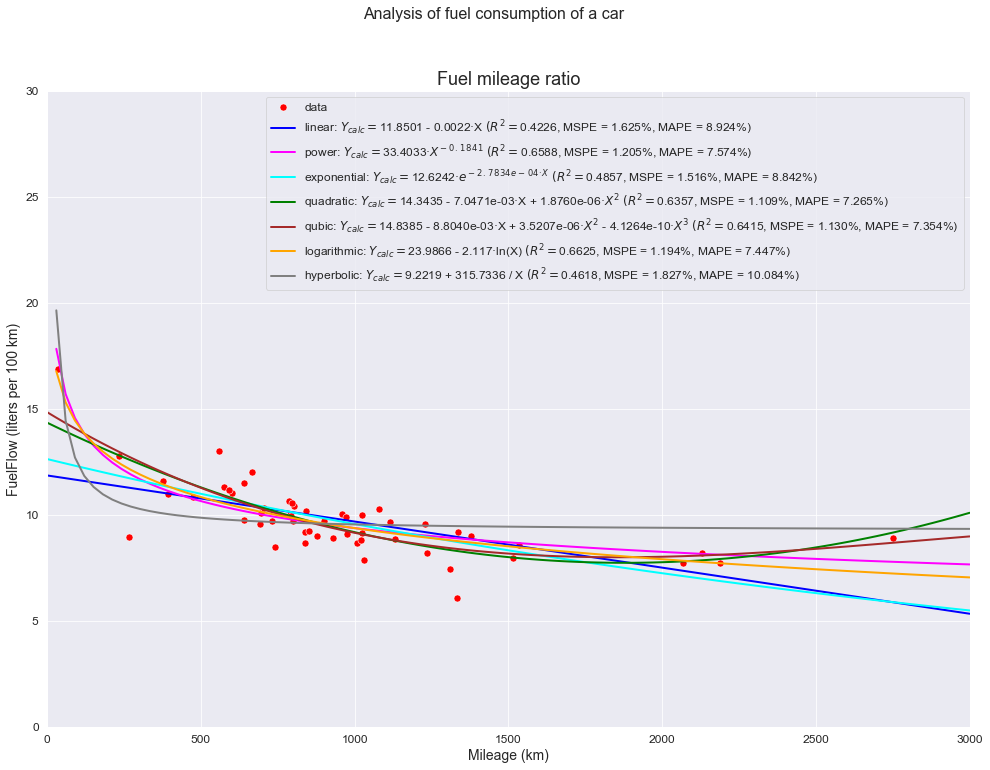

,b0,b1,b2,b3,MSE,RMSE,MAE,MSPE,MAPE,RMSLE,R2
linear,11.8501,-0.0021760,-,-,1.5349,1.2389,0.8536,1.6250,8.9240,0.1140,0.4226
power,33.4033,-0.1840982,-,-,0.9069,0.9523,0.7032,1.2050,7.5740,0.0915,0.6588
exponential,12.6242,-0.0002783,-,-,1.3672,1.1693,0.8382,1.5160,8.8420,0.1097,0.4857
quadratic,14.3435,-0.0070471,1.8760e-06,-,0.9684,0.9841,0.6973,1.1090,7.2650,0.0888,0.6357
qubic,14.8385,-0.0088040,3.5207e-06,-4.1264e-10,0.9530,0.9762,0.7028,1.1300,7.3540,0.0888,0.6415
logarithmic,23.9866,-2.1169836,-,-,0.8971,0.9472,0.6912,1.1940,7.4470,0.0913,0.6625
hyperbolic,9.2219,315.7335820,-,-,1.4307,1.1961,0.9473,1.8270,10.0840,0.1142,0.4618


,X_fact,Y_fact,linear,power,exponential,quadratic,qubic,logarithmic,hyperbolic
0,696.8000,10.0800,10.3339,10.0087,10.3985,10.3439,10.2737,10.1277,9.6750
1,2751.5000,8.9100,5.8628,7.7727,5.8694,9.1564,8.6730,7.2203,9.3366
2,1308.7000,7.4500,9.0024,8.9122,8.7701,8.3340,8.4217,8.7934,9.4632
3,837.4000,9.1700,10.0279,9.6757,9.9994,9.7578,9.6926,9.7386,9.5989
4,2130.8000,8.2000,7.2135,8.1472,6.9763,7.8453,8.0720,7.7615,9.3701
5,704.0000,10.3000,10.3182,9.9898,10.3777,10.3121,10.2414,10.1060,9.6704
6,666.3000,12.0100,10.4002,10.0915,10.4872,10.4809,10.4134,10.2225,9.6958
7,840.5000,10.1700,10.0212,9.6691,9.9908,9.7457,9.6809,9.7308,9.5975
8,642.0000,11.4900,10.4531,10.1608,10.5583,10.5925,10.5283,10.3011,9.7137
9,900.0000,9.7200,9.8917,9.5481,9.8267,9.5207,9.4659,9.5860,9.5727


,X,linear,power,exponential,quadratic,qubic,logarithmic,hyperbolic
0,0.0000,11.8501,inf,12.6242,14.3435,14.8385,inf,inf
1,30.3030,11.7842,17.8259,12.5181,14.1316,14.5749,16.7650,19.6411
2,60.6061,11.7183,15.6903,12.4130,13.9233,14.3178,15.2976,14.4315
3,90.9091,11.6523,14.5617,12.3087,13.7183,14.0669,14.4393,12.6950
4,121.2121,11.5864,13.8106,12.2054,13.5168,13.8223,13.8303,11.8267
...,...,...,...,...,...,...,...,...
95,2878.7879,5.5858,7.7082,5.6651,9.6039,8.8266,7.1245,9.3316
96,2909.0909,5.5199,7.6934,5.6175,9.7194,8.8631,7.1024,9.3304
97,2939.3939,5.4539,7.6787,5.5703,9.8383,8.8995,7.0804,9.3293
98,2969.6970,5.3880,7.6642,5.5235,9.9607,8.9357,7.0587,9.3282


In [150]:
title_figure = Title_String + '\n' + Task_Theme + '\n'
title_axes = 'Fuel mileage ratio'
    
models_list = ['linear', 'power', 'exponential', 'quadratic', 'qubic', 'logistic', 'logarithmic', 'hyperbolic']

p0_dict_in= {'exponential': [1, -0.1],
             'power': [1, -0.1]}

(result_df,
value_table_calc,
value_table_graph
) = simple_approximation(
    X1, Y,
    models_list, p0_dict_in,
    Xmin = X1_min_graph, Xmax = X1_max_graph,
    Ymin = Y_min_graph, Ymax = Y_max_graph,
    DecPlace=DecPlace,
    result_table=True, value_table_calc=True, value_table_graph=True,
    title_figure = title_figure,
    title_axes = title_axes,
    x_label=Variable_Name_X1,
    y_label=Variable_Name_Y,
    linewidth=2,
    b1_formatter='{:.' + str(DecPlace + 3) + 'f}', b2_formatter='{:.' + str(DecPlace) + 'e}', b3_formatter='{:.' + str(DecPlace) + 'e}')

Выполним аппроксимацию зависимости **среднемесячного расхода топлива автомобиля (л/100 км) (FuelFlow)** от **среднемесячной температуры (Temperature)**:

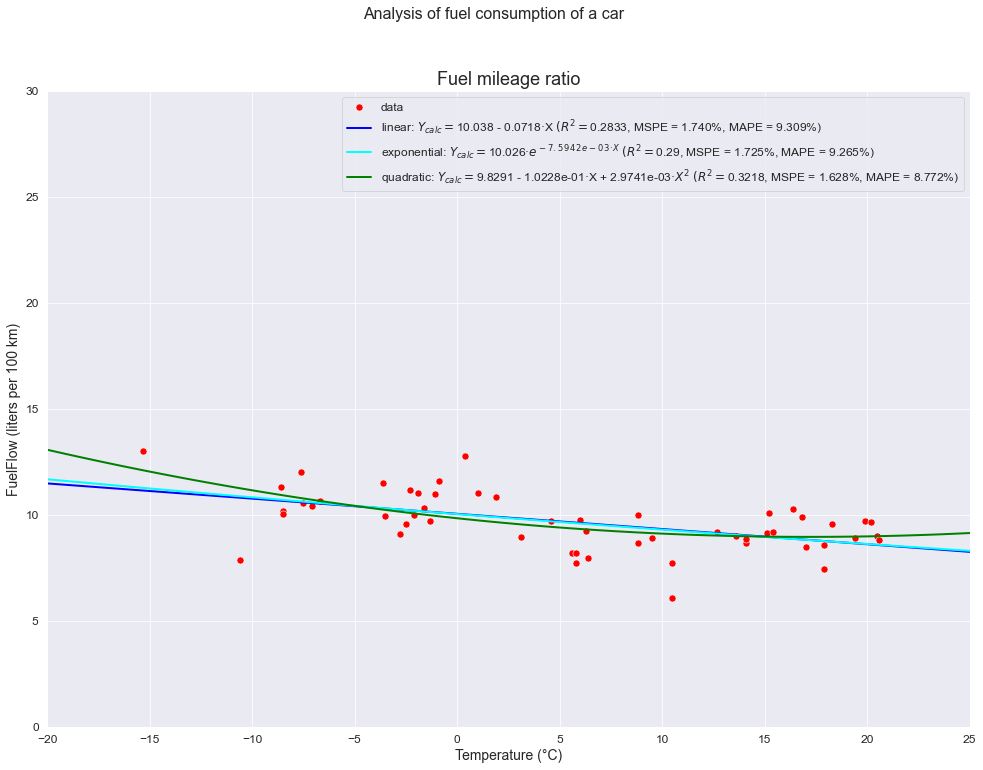

,b0,b1,b2,MSE,RMSE,MAE,MSPE,MAPE,RMSLE,R2
linear,10.0380,-0.0717728,-,1.2563,1.1209,0.8549,1.7400,9.3090,0.1091,0.2833
exponential,10.0260,-0.0075942,-,1.2447,1.1157,0.8509,1.7250,9.2650,0.1086,0.2900
quadratic,9.8291,-0.1022819,2.9741e-03,1.1889,1.0904,0.8082,1.6280,8.7720,0.1056,0.3218


,X_fact,Y_fact,linear,exponential,quadratic
0,-15.3000,12.9900,11.1361,11.2613,12.0902
1,-10.6000,7.8700,10.7988,10.8664,11.2474
2,-8.6000,11.3000,10.6552,10.7026,10.9287
3,-8.5000,10.1700,10.6481,10.6945,10.9134
4,-8.5000,10.0300,10.6481,10.6945,10.9134
5,-7.6000,12.0100,10.5835,10.6217,10.7782
6,-7.5000,10.5300,10.5763,10.6136,10.7635
7,-7.1000,10.4300,10.5476,10.5814,10.7052
8,-6.7000,10.6600,10.5189,10.5493,10.6479
9,-3.6000,11.4900,10.2964,10.3039,10.2358


,X,linear,exponential,quadratic
0,-20.0000,11.4735,11.6705,13.0644
1,-19.5455,11.4408,11.6303,12.9644
2,-19.0909,11.4082,11.5902,12.8657
3,-18.6364,11.3756,11.5503,12.7682
4,-18.1818,11.3430,11.5105,12.6719
...,...,...,...,...
95,23.1818,8.3742,8.4076,9.0563
96,23.6364,8.3415,8.3786,9.0731
97,24.0909,8.3089,8.3497,9.0911
98,24.5455,8.2763,8.3210,9.1104


In [151]:
models_list = ['linear', 'exponential', 'quadratic']

(result_df,
value_table_calc,
value_table_graph
) = simple_approximation(
    X_sort_clear, Y_sort_clear,
    models_list, p0_dict_in,
    Xmin = X2_min_graph, Xmax = X2_max_graph,
    Ymin = Y_min_graph, Ymax = Y_max_graph,
    DecPlace=DecPlace,
    result_table=True, value_table_calc=True, value_table_graph=True,
    title_figure = title_figure,
    title_axes = title_axes,
    x_label=Variable_Name_X2,
    y_label=Variable_Name_Y,
    linewidth=2,
    b1_formatter='{:.' + str(DecPlace + 3) + 'f}', b2_formatter='{:.' + str(DecPlace) + 'e}', b3_formatter='{:.' + str(DecPlace) + 'e}')

### <center> <u>***Небольшой offtop - сравнение результатов расчетов с использованием различного программного обеспечения***</u>

Напоследок хочу привести данные сравнения результатов аппроксимации с помощью различных программных средств:
* **Python**, функция **scipy.optimize.curve_fit**;
* **MS Excel**;
* система компьютерной алгебры **Maxima** (которую я настоятельно рекомендую освоить всем специалистам, выполняющим математические расчеты).

Все файлы с расчетами доступны в моем репозитории на GitHub (https://github.com/AANazarov/MyModulePython).

Итак:

**Python**, функция **scipy.optimize.curve_fit**:

|Модель                   |Уравнение                                                                                              |Коэффициент $R^2$|
|:-----------------------:|:-----------------------------------------------------------------------------------------------------:|:---------------:|
|линейная                 |$Y=11.8501-2.1760 \cdot 10^{-3} \cdot X$                                                               |0.4226           |    
|квадратическая           |$Y=14.3435-7.0471 \cdot 10^{-3} \cdot X+1.8760 \cdot 10^{-6} \cdot X^2$                                |0.6357           |
|кубическая               |$Y=14.8385-8.804 \cdot 10^{-3} \cdot X+3.5207 \cdot 10^{-6} \cdot X^2-4.1264 \cdot 10^{-10} \cdot X^3$ |0.6415           |
|степенная                |$Y=33.4033\cdot X^{-0.1841}$                                                                           |0.6588           |
|экспоненциальная I типа  |$Y=12.6242\cdot e^{2.783\cdot 10^{-4} \cdot X}$                                                        |0.4857           |
|экспоненциальная II типа |$Y=12.6242\cdot 0.9997^X$                                                                              |0.4857           |
|логарифмическая          |$Y=23.9866-2.1169\cdot ln X$                                                                           |0.6625           |
|гиперболическая          |$Y=9.2219+\frac{315.7336}{X}$                                                                          |0.4618           |

**MS Excel**:

|Модель                   |Уравнение                                                                     |Коэффициент $R^2$|
|:-----------------------:|:----------------------------------------------------------------------------:|:---------------:|
|линейная                 |$Y=11.85-0.0022 \cdot X$                                                      |0.4226           |    
|квадратическая           |$Y=14.345-0.007 \cdot X+2 \cdot 10^{-6} \cdot X^2$                            |0.6359           |
|кубическая               |$Y=14.84-0.0088 \cdot X+4 \cdot 10^{-6} \cdot X^2-4 \cdot 10^{-10} \cdot X^3$ |0.6417           |
|степенная                |$Y=35.303\cdot X^{-0.193}$                                                    |0.6582           |
|экспоненциальная I типа  |$Y=11.848\cdot e^{2\cdot 10^{-4} \cdot X}$                                    |0.4739           |
|экспоненциальная II типа |-                                                                             |-                |
|логарифмическая          |$Y=23.989-2.117\cdot ln X$                                                    |0.6627           |
|гиперболическая          |-                                                                             |-                |

**Maxima**

|Модель                   |Уравнение                                                                                             |Коэффициент $R^2$|
|:-----------------------:|:----------------------------------------------------------------------------------------------------:|:---------------:|
|линейная                 |$Y=11.85-2.1760 \cdot 10^{-3} \cdot X$                                                                |0.4226           |    
|квадратическая           |$Y=14.343-7.0471 \cdot 10^{-3} \cdot X+1.8760 \cdot 10^{-6} \cdot X^2$                                |0.6357           |
|кубическая               |$Y=14.838-8.804 \cdot 10^{-3} \cdot X+3.5207 \cdot 10^{-6} \cdot X^2-4.1264 \cdot 10^{-10} \cdot X^3$ |0.6415           |
|степенная                |$Y=33.355\cdot X^{-0.18388}$                                                                          |0.6588           |
|экспоненциальная I типа  |$Y=12.624\cdot e^{2.7835\cdot 10^{-4} \cdot X}$                                                       |0.4857           |
|экспоненциальная II типа |$Y=12.624\cdot 0.99972^X$                                                                             |0.4857           |
|логарифмическая          |$Y=23.987-2.117\cdot ln  X$                                                                           |0.6625           |
|гиперболическая          |$Y=9.2219+\frac{315.73}{X}$                                                                           |0.4618           |

Как видим, результаты имеют незначительные отличия для степенных и экспоненциальных зависимостей. Есть над чем задуматься...

### <center> <font size="6"> <u>***ИТОГИ***</u>

Итак, подведем итоги:
* мы рассмотрели основные инструменты **Python** для аппроксимации зависимостей;
* разобрали особенности определения ошибок и построения доверительных интервалов для параметров моделей аппроксимации;
* также предложен пользовательская функция для аппроксимации простых зависимостей (по аналогии с тем, как это реализовано в Excel), облегчающая работу исследователя и уменьшающая размер программного кода.

Само собой, мы рассмотрели в рамках данного обзора далеко не все вопросы, связанные с аппроксимацией; так отдельного рассмотрения, безусловно, заслуживают следующие вопросы:
* аппроксимация более сложных зависимостей (модифицированных кривых, S-образных кривых и пр.), требующих предварительной оценки начальных условий для алгоритма оптимизации;
* влияние выбора алгоритма оптимизации на результат и быстройдействие;
* аппроксимация с ограничениями в виде интервалов (**bounds**) и в виде алгебраических выражений (**constraints**);
* более глубокое рассмотрение возможностей библиотеки **lmfit** для решения задач аппроксимации,

и т.д.

В общем, есть куда двигаться дальше.

Исходный код находится в моем репозитории на GitHub (https://github.com/AANazarov/Statistical-methods).

Надеюсь, данный обзор поможет специалистам **DataScience** в работе.

### <center> <font size="6"> <u>***ЛИТЕРАТУРА***</u>

1. M. Newville, T. Stensitzki, and others. Non-Linear Least-Squares Minimization and Curve-Fitting for Python. Release 0.8.3 (https://buildmedia.readthedocs.org/media/pdf/lmfit-py/rc_090/lmfit-py.pdf).


In [152]:
print(f"Общее время выполнения расчетов: {round(time.time() - start_time_0, 3)} c")

Общее время выполнения расчетов: 24.898 c
